Ομάδα 94 - δύο ατόμων: Κριθαρούλα Αναστασία 03117073, Κριθαρούλας Διονύσης 03117875

#Νευρωικά Δίκτυα - Ροή Y - 9ο Εξάμηνο - ΣΗΜΜΥ

# Εργασία 1. Επιβλεπόμενη μάθηση:Ταξινόμηση

In [1]:
!pip install optuna
!pip install --upgrade scikit-learn 
!pip install --upgrade numpy 
!pip install --upgrade pandas 
!pip install --upgrade imbalanced-learn
!pip install --upgrade seaborn

Αρχικά, φορτώνουμε το csv αρχείο που περιέχε τα δεδομένα μας από το kaggle στο drive προκειμένου να αποκτήσουμε πρόσβαση σε αυτό. 

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import os
# Complete path to storage location of the .zip file of data
zip_path = '/gdrive/MyDrive/kaggle/csgo-round-winner-classification.zip'
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly 
!unzip -q 'csgo-round-winner-classification.zip'
# View the unzipped contents in the virtual machine
os.listdir()

['.config',
 'csgo-round-winner-classification.zip',
 'csgo_round_snapshots.csv',
 'sample_data']

## Μέρος 2. Kaggle Dataset

### Εισαγωγή και Επισκόπηση

In [ ]:
import numpy as np 
import pandas as pd

df = pd.read_csv("csgo_round_snapshots.csv")
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Στην συνέχεια της εργαστηριακής άσκησης θα εργαστούμε πάνω στο dataset "CS:GO Round Winner 
Classification" του Kaggle. To CS:GO είναι ένα ηλεκτρονικό παιχνίδι το οποίο θέτει αντιμέτωπες δύο ομάδες, τους Terrorists και τους Counter-Terrorists.
 Και στις δύο ομάδες έχει ανατεθεί να εξαλείψουν η μία την άλλη ενώ παράλληλα εκπληρώνουν 
διαφορετικούς στόχους. Έτσι το συγκεκριμένο dataset είναι ένα binary dataset που περιλαμβάνει 
122410 παραδείγματα (δείγματα) τα οποία αναφέρονται σε γύρους του παιχνιδιού στους οποίους 
κέρδισαν είτε οι Terrorists είτε οι Counter-Terrorists. Τα παραδείγματα αυτά προέκυψαν από 
στιγμυότυπα γύρων από περιπου 700 demo από τουρνουά υψηλού επιπέδου το 2019-2020 για το 
συγκεκριμένο παιχνίδι. Οι γύροι προθέρμανσης και οι επανεκκινήσεις έχουν φιλτραριστεί και για τους 
υπόλοιπους γύρους ένα στιγμιότυπο γύρου έχει καταγραφεί κάθε 20 δευτερόλεπτα μέχρι να αποφασιστεί 
ο νικητής του γύρου.

Το κάθε δείγμα αποτελείται από 96 χαρακτηριστικά , όπως για παράδειγμα το συνολικό score που 
έχει η κάθε ομάδα μέχρι στιγμής στον γύρο κ.α., τα περισσότερα από τα οποία παίρνουν συνεχείς 
τιμές (πραγματικές τιμές). Παρατηρώντας όμως το Dataset μπορούμε να δούμε ότι δύο από τα 
χαρακτηριστικά είναι κατηγορικά έχοντας την δυνατότητα να πάρουν δύο ή περισσότερες διαφορετικές τιμές string. 
Τα χαρακτηριστικά αυτά τις επικεφαλίδες "map" και  "bomb_planted" όπου φαίνονται και στην συνέχεια:

In [ ]:
df['map']

0         de_dust2
1         de_dust2
2         de_dust2
3         de_dust2
4         de_dust2
            ...   
122405    de_train
122406    de_train
122407    de_train
122408    de_train
122409    de_train
Name: map, Length: 122410, dtype: object

In [ ]:
df['bomb_planted']

0         False
1         False
2         False
3         False
4         False
          ...  
122405     True
122406    False
122407    False
122408    False
122409    False
Name: bomb_planted, Length: 122410, dtype: bool


Η 97η κολώνα του workframe αποτελείται από τα labels των δειγμάτων. Το κάθε label δείχνει 
ποια από τις δύο ομάδες (Terrorists, Counter-Terrorirst) ήταν η νικήτρια στον συγκεκριμένο 
γύρο που αντιπρωσοπεύει το αντίστοιχο δείγμα παίρνωτας είτε την τιμή T (Terrorists) είτε την 
τιμή CT (Counter-Terrorists). Και τα lables όπως παρατηρούμε έχουν τιμές string (οι τιμές είναι 
binary και γι αυτό το πρόβλημα μας είναι binary classification). Στην συνέχεια φαίνεται η κολώνα 
με τα labels η οποία αντισοιχεί στην επικεφαλίδα "round_winner":

In [ ]:
df['round_winner']

0         CT
1         CT
2         CT
3         CT
4         CT
          ..
122405     T
122406     T
122407     T
122408     T
122409     T
Name: round_winner, Length: 122410, dtype: object

Το αρχείο που περιέχει τα δεδομένα καλείται 'csgo_round_snapshots.cv' και αποτελείται 
από 122411 γραμμές. H πρώτη γραμμή περιέχει τα ονόματα των χαρακτηριστικών (επικεφαλίδες) 
τα οποία χωρίζονται με ',' ενώ οι υπόλοιπες 122410 τα δείγματα του Dataset. Καθε μία από αυτές
τις 122410 γραμμές περιέχει 97 τιμές χωρισμένενες επίσης με ','. Οι πρώτες 96 αντιστοιχούν στις 
τιμές των χαρακτηριστικών ενώ η 97$^{η}$ περιέχει την ετικέτα (label). Το αρχείο δεν περιέχει κάποια
αρίθμιση των δειγμάτων. 

Τέλος, όσον αφορά την κατανομή των δειγμάτων στις δύο κλάσεις του dataset, παρατηρούμε ότι αυτή 
είναι ισορροπημένη, με ποσοστό 51% να αντιστοιχούν σε στιγμιότυπα γύρων στους οποίους νικήτρια 
ομάδα ήταν οι Terrorists και ποσοστό 49% σε στιγμιότυπα γύρων στους οποίους νικήτρια ομάδα ήταν 
οι Counter-Terrorists.

### Προετοιμασία


Αρχικά, διαβάζουμε το αρχείο 'csgo_round_cnapshots.cv' και αποθηκεύουμε τις πρώτες 
96 κολώνες (που αντιστοιχούν στα χαρακτηριστικά εισόδου) σε ένα datarame "features_df", 
και τη 97$^{η}$ κολώνα (που αντιστοιχεί στα labels) σε ένα dataframe "labels_df". Η πρώτη γραμμή του 
αρχείου όπως αναφέραμε αντιστοιχεί στα ονόματα των χαρακτηριστικών (κολώνων) και γι αυτό τον λόγο 
αποθηκεύεται ως επικεφαλίδα σε καθένα από τα δύο dataframes (αφήνωντας την επιλογή header=default 
κατά το διάβασμα του αρχέιου).

<i><u>Σχόλιο</u>: Για το διαχωρισμό και την αποθήκευση των attributes χρησιμοποιούμε dataframes και 
όχι απευθείας numpy arrays λόγω της ποικιλομορφίας των τύπων τους.

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("csgo_round_snapshots.csv") #option header takes his default value
labels_df = df.iloc[:, [96]] 
features_df = df.iloc[:, :-1]

#### Επεξεργασία του dataframe "labels_df"

Όσον αφορά το dataframe - κολώνα με τις κλάσεις, "labels_df", θα πρέπει να μετατρέψουμε 
τα string 'T' και 'CT' σε 0 και 1 αντίστοιχα. Για το σκοπό αυτό ορίζουμε το αντίστοιχο mapping, 
το οποίο και εφαρμόζουμε στο 'labels_df' μέσω της μεθόδου replace. Στη συνέχεια, εφαρμόζουμε 
διαδοχικά τις μεθόδους "values" και flatten() στο dataframe που προέκυψε, έτσι ώστε να πάρουμε 
ένα μονοδιάστατο np array (12240,).

In [5]:
mapping = {'T': 0, 'CT': 1}
labels_df = labels_df.replace({"round_winner": mapping}) 
np_labels = labels_df.values.flatten()

In [6]:
print('Labels array dimension:', np_labels.shape)

Labels array dimension: (122410,)


#### Επεξεργασία του dataframe "features_df"

##### <u>Διαχείριση των απουσιαζουσών τιμών<u>

Παρατηρώντας το δωθεν dataset βλεπουμε ότι δεν υπάρχουν τιμές χαρακτηριστικών οι οποίες να 
απουσιάζουν. Την παρατήρηση αυτή μπορούμε να την ελεγξουμε και με την συνάρτηση notnull() 
η οποία επιστρέφει ένα bollean dataframe όπου όλες οι τιμές του dataframe που ήταν null 
έχουν αντικατασταθεί με False ενώ οι υπόλοιπες με True.

In [7]:
print('AND for all boolean values:', df.notnull().all().all())

AND for all boolean values: True


#####<u>Διαχείριση των Κατηγορικών Χαρακτηριστικών των δειγμάτων μας</u>

Αρχικά χωρίζουμε το δωθέν dataset σε train και test με ποσοστό 70% και 30% αντίστοιχα 
έτσι ώστε να εφαρμόσουμε την προεπεξεργασία των δεδομένων βασισμένοι μόνο στο train set.

In [8]:
from sklearn.model_selection import train_test_split

#split dataset to train and test set
train_features_df, test_features_df, y_train, y_test = train_test_split(features_df, np_labels, test_size = 0.3, shuffle = True)

Όπως αναφέραμε και προηγουμένως τα κατηγορικά χαρακτηριστικά του dataframe 
βρίσκονται στις κολώνες με επικεφαλίδες "map" και "bob_planted". Kαθώς τα σύνολα τιμών 
αυτών δεν είναι διατεταγμένα, επιλέγουμε να μετατρέψουμε κάθε κατηγορικό χαρτακτηριστικό 
με m τιμές σε m binary χαρακτηριστικά, από τα οποία ένα μόνο θα είναι ενεργό κάθε φορά. 
(Η διαδικασία αυτή υλοποιείται στη συνάρτηση Dummies). Σημειώνουμε, βέβαια ότι με τον τρόπο 
αυτό αυξάνουμε τη διάσταση των χαρακτηριστικών των δειγμάτων μας.

In [9]:
def Dummies(train_df, test_df, column_list = ['map', 'bomb_planted']):
    train_df = pd.get_dummies(train_df, columns = column_list) #convert nominal attribute with m values to m binary attributes - only one of them is active at a time
    test_df = pd.get_dummies(test_df, columns = column_list)
    test_df = test_df.reindex(columns = train_df.columns, fill_value = 0)
    return train_df , test_df

In [10]:
train_features_df , test_features_df = Dummies(train_features_df , test_features_df)

print('Number of attributes after Dummies:', train_features_df.shape[1])

Number of attributes after Dummies: 104


##### <u>Μετατροπή των χαρακτηριστικών σε numpy arrays</u>


Έπειτα, από την παραπάνω προεπεξεργασία, παρατηρούμε ότι κάθε δείγμα αποτελείται από 104 
χαρακτηριστικά. Μετατρέπουμε, λοιπόν, όλες τις τιμές των χαρακτηριστικών όλων των δειγμάτων 
(train και test set) σε αριθμητικές. Τέλος, μετατρέπουμε τα dataframes που αντιστοιχούν στο train 
και το test set στην τελική τους μορφή, δηλαδή σε numpy arrays, με σκοπό να μπορέσουμε στη συνέχεια 
να τα χρησιμοποιήσουμε ως εισόδους στους διάφορους ταξινομητές που θα υλοποιήσουμε.

In [11]:
X_train = train_features_df.apply(pd.to_numeric).values
X_test = test_features_df.apply(pd.to_numeric).values

### Επίδοση Out-of-the-box

Στη συνέχεια πάνω στο δοθέν dataset θα μελετήσουμε καθέναν από τους ακόλουθους ταξινομητές:
* Multi-Layer Perceptron (MLP)
* Support Vector Machines (SVM)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

mlp = MLPClassifier()
svm = SVC()

In [ ]:
classifiers_out_of_the_box = [mlp, svm]
classifiers_names = ['mlp classifier' , 'svm classifier']

cs_go_winner_cross_val_accuracy_out_of_the_box = dict()
cs_go_winner_cross_val_f1_score_out_of_the_box = dict()
cs_go_winner_accuracy_out_of_the_box = dict()
cs_go_winner_f1_score_out_of_the_box = dict()


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

for classifier, classifier_name in zip(classifiers_out_of_the_box, classifiers_names):
  cs_go_winner_cross_val_accuracy_out_of_the_box[classifier_name] = np.round(np.average(cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'accuracy')), 4)
  cs_go_winner_cross_val_f1_score_out_of_the_box[classifier_name] = np.round(np.average(cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'f1')), 4)
  model = classifier.fit(X_train, y_train)  
  cs_go_winner_accuracy_out_of_the_box[classifier_name] = np.round(model.score(X_test, y_test), 4)  
  cs_go_winner_f1_score_out_of_the_box[classifier_name] = np.round(f1_score(y_test, model.predict(X_test)), 4)

In [ ]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy = "uniform")
dc_constant_0 = DummyClassifier(strategy = "constant", constant = 0)
dc_constant_1 = DummyClassifier(strategy = "constant", constant = 1)
dc_most_frequent = DummyClassifier(strategy = "most_frequent")
dc_stratified = DummyClassifier(strategy = "stratified")

dummies_classifiers = [dc_uniform, dc_constant_0, dc_constant_1, dc_most_frequent, dc_stratified]
dummies_names = ['dummy classifier - uniform', 'dummy classifier - constant 0', 'dummy classifier - constant 1', 'dummy classifier - most frequent', 'dummy classifer - stratified',]

In [ ]:
for classifier, classifier_name in zip(dummies_classifiers, dummies_names):
  cs_go_winner_cross_val_accuracy_out_of_the_box[classifier_name] = np.round(np.average(cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'accuracy')), 4)
  cs_go_winner_cross_val_f1_score_out_of_the_box[classifier_name] = np.round(np.average(cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'f1')), 4)
  model = classifier.fit(X_train, y_train)  
  cs_go_winner_accuracy_out_of_the_box[classifier_name] = np.round(model.score(X_test, y_test), 4)  
  cs_go_winner_f1_score_out_of_the_box[classifier_name] = np.round(f1_score(y_test, model.predict(X_test)), 4)

In [ ]:
sorted_cross_val_accuracy = [(k, cs_go_winner_cross_val_accuracy_out_of_the_box[k]) for k in sorted(cs_go_winner_cross_val_accuracy_out_of_the_box, key = cs_go_winner_cross_val_accuracy_out_of_the_box.get, reverse = True)]

print("Cross Valiidation Accuracy on the CS-GO Dataset\n")
for k, v in sorted_cross_val_accuracy:
  print(k + ':', v)

sorted_cross_val_f1_score = [(k, cs_go_winner_cross_val_f1_score_out_of_the_box[k]) for k in sorted(cs_go_winner_cross_val_f1_score_out_of_the_box, key = cs_go_winner_cross_val_f1_score_out_of_the_box.get, reverse = True)]

print("\nCross Valiidation F1 score on the Japanese Credit Screening Dataset\n")
for k, v in sorted_cross_val_f1_score:
  print(k + ':', v)

Cross Valiidation Accuracy on the CS-GO Dataset

svm classifier: 0.7168
mlp classifier: 0.6876
dummy classifier - constant 0: 0.5088
dummy classifier - most frequent: 0.5088
dummy classifer - stratified: 0.5
dummy classifier - uniform: 0.4981
dummy classifier - constant 1: 0.4912

Cross Valiidation F1 score on the Japanese Credit Screening Dataset

svm classifier: 0.7104
mlp classifier: 0.7085
dummy classifier - constant 1: 0.6588
dummy classifier - uniform: 0.4922
dummy classifer - stratified: 0.4914
dummy classifier - constant 0: 0.0
dummy classifier - most frequent: 0.0


In [ ]:
sorted_accuracy = [(k, cs_go_winner_accuracy_out_of_the_box[k]) for k in sorted(cs_go_winner_accuracy_out_of_the_box, key = cs_go_winner_accuracy_out_of_the_box.get, reverse = True)]

print("\nClassification Accuracy on the CS-GO Dataset (30% test set)\n")
for k, v in sorted_accuracy:
  print(k + ':', v)

sorted_f1_score = [(k, cs_go_winner_f1_score_out_of_the_box[k]) for k in sorted(cs_go_winner_f1_score_out_of_the_box, key = cs_go_winner_f1_score_out_of_the_box.get, reverse = True)]

print("\nClassification F1 score on the CS-GO Dataset (30% test set)\n")
for k, v in sorted_f1_score:
  print(k + ':', v)


Classification Accuracy on the CS-GO Dataset (30% test set)

svm classifier: 0.7228
mlp classifier: 0.7168
dummy classifier - constant 0: 0.5121
dummy classifier - most frequent: 0.5121
dummy classifer - stratified: 0.4982
dummy classifier - uniform: 0.4958
dummy classifier - constant 1: 0.4879

Classification F1 score on the CS-GO Dataset (30% test set)

mlp classifier: 0.7404
svm classifier: 0.7165
dummy classifier - constant 1: 0.6558
dummy classifier - uniform: 0.4917
dummy classifer - stratified: 0.4869
dummy classifier - constant 0: 0.0
dummy classifier - most frequent: 0.0


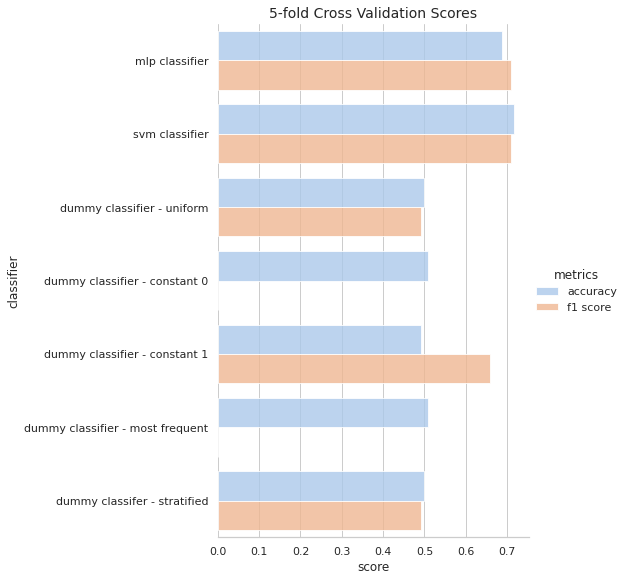

In [ ]:
cross_val_scores_df = pd.DataFrame([[x, 'accuracy', cs_go_winner_cross_val_accuracy_out_of_the_box[x]] for x in cs_go_winner_cross_val_accuracy_out_of_the_box] +
                  [[x, 'f1 score', cs_go_winner_cross_val_f1_score_out_of_the_box[x]] for x in cs_go_winner_cross_val_f1_score_out_of_the_box], 
                  columns = ['classifier', 'metric', 'score']) 

import seaborn as sns

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data = cross_val_scores_df, kind = "bar",
    x = "score", y = "classifier", hue = "metric",
    palette = "pastel", alpha = .8, height = 8
)
g.despine(left=True)
g.ax.set_title("5-fold Cross Validation Scores", fontsize = 14)
g.set_axis_labels("score", "classifier")
g.legend.set_title("metrics")

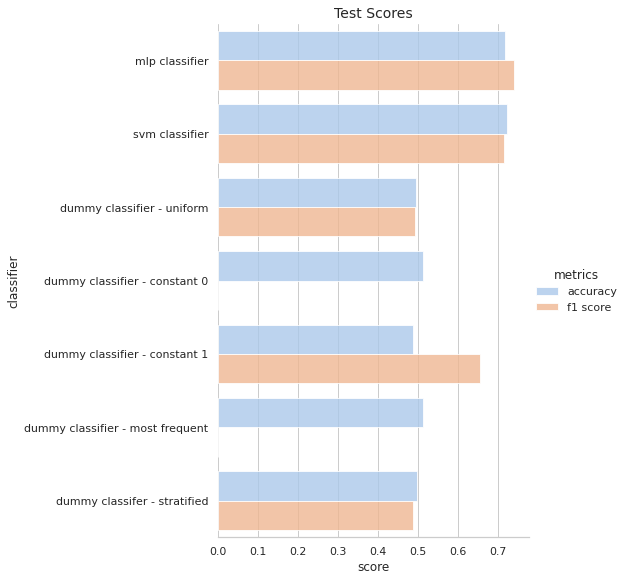

In [ ]:
test_scores_df = pd.DataFrame([[x, 'accuracy', cs_go_winner_accuracy_out_of_the_box[x]] for x in cs_go_winner_accuracy_out_of_the_box] +
                  [[x, 'f1 score', cs_go_winner_f1_score_out_of_the_box[x]] for x in cs_go_winner_f1_score_out_of_the_box], 
                  columns = ['classifier', 'metric', 'score']) 

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data = test_scores_df, kind = "bar",
    x = "score", y = "classifier", hue = "metric",
    palette = "pastel", alpha = .8, height = 8
)
g.despine(left = True)
g.ax.set_title("Test Scores", fontsize = 14)
g.set_axis_labels("score", "classifier")
g.legend.set_title("metrics")

### Βελτιστοποίηση

Αρχικά, υπολογίζουμε και απεικονίζουμε στο ακόλουθα διαγράμματα τις διακυμάνσεις (variances) των χαρακτηριστικών μας προκειμένου να κατανοήσουμε καλύτερα το dataset και να αποφασίσουμε ποιους μετασχηματιστές και με ποιές τιμές παραμέτρων θα χρησιμοποιήσουμε κατά τη βελτιστοποίηση.  

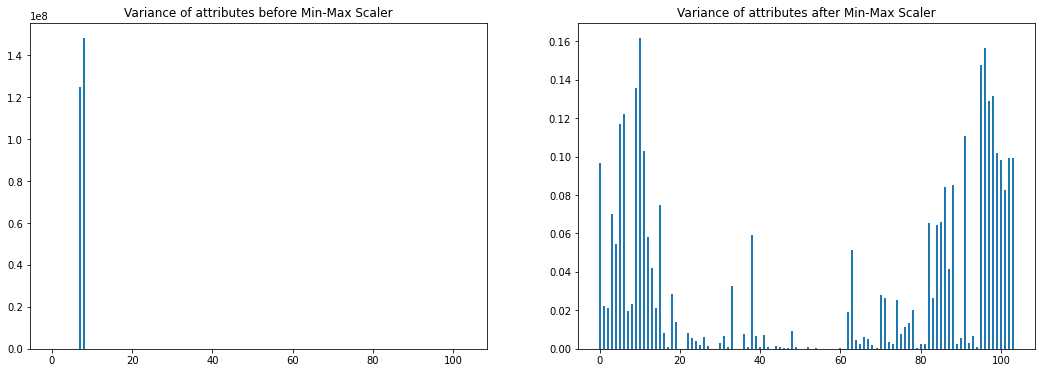

In [ ]:
from sklearn import preprocessing
from matplotlib import pyplot as plt

train_variance = preprocessing.MinMaxScaler().fit_transform(X_train).var(axis=0)

fig, axes = plt.subplots(1, 2, figsize = (18, 6))
axes[0].bar(range(0, X_train.shape[1]), X_train.var(axis = 0), width = 0.5)
axes[0].set_title("Variance of attributes before Min-Max Scaler")
axes[1].bar(range(0, train_variance.shape[0]), train_variance, width = 0.5)
axes[1].set_title("Variance of attributes after Min-Max Scaler")
plt.show()

Παρατηρούμε, λοιπόν, ότι μετά την εφαρμογή του Min-Max Scaler, ο οποίος κλιμακώνει γραμμικά τις τιμές όλων των χαρακτηριστικών στο διάστημα [0 - 1], οι διακυμάνσεις όλες των χαρακτηριστικών κυμαίνονται μεταξύ 0 και 0.16, με αρκετές από αυτές μικρότερες από 0.02, οπότε και υποψιαζόμαστε ότι ίσως κάποια από τα χαρακτηριστικά μας δεν είναι και τόσο απαραίτητα στην εκπαίδευση των μοντέλων. Για το λόγο αυτό στη συνέχεια δοκιμάζουμε να υλοποιήσουμε και αρχιτκτονικές που περιέχουν τεχνικές μείωσης της διαστατικότητας, όπως το ελάχιστο κατώφλι διακύμανσης (Variance Threshold με thresholds στο διάστημα [0- 0.15]). Οι μετασχηματιστές και ο ταξινομητής που θα χρησιμοποιούμε στην εκάστοτε περίπτωση θα ενσωματώνονται σε ένα ενιαίο pipeline. Η σειρά με την οποία θα τοποθετούνται  οι μετασχημτιστές στο pipeline θα απεικονίζει και τη σειρά με την οποία οι μετασχηματισμοί αυτοι θα εφαρμόζονται στα δεδομένα μας, και έτσι κάθε pipeline που δοκιμάζουμε θα καταλήγει σε έναν εκ των δύο ταξινομητών, MLP ή SVM. Ολόκληρο, λοιπόν, το pipeline μπορεί να αντιμετωπιστεί ως ένας ενιαίος estimator με τις μεθόδους fit και predict.

Παρακάτω για τη βελτιστοποίηση των ταξινομητών και την εκτίμηση των υπερπαραμέτρων αυτών αλλά και των μετασχηματιστών θα χρησιμοποιήσουμε τη βιβλιοθήκη optuna. Για την αξιολόγηση των μοντέλων μας θα χρησιμοποιήσουμε 5-fold cross validation, ενώ ως μετρικές θα χρησιμοποιήσουμε το 'accuracy' και το 'f1 score', δηλαδή το μέσο όρο των μετρικών 'recall' και 'precision', και αυτό γιατί το συγκεκριμένο task δεν απαιτεί κάποια ιδιαίτερη προσοχή στην ελαχιστοποίηση των false positives ή false negatives και αντίστοιχα στη μεγιστοποίηση του precision ή του recall, οπότε μπορούμε να δώσουμε ίση βαρύτητα και στις δύο αυτές μετρικές.


Παράλληλα, καθώς παρατηρούμε ότι το train dataset είναι αρκετά μεγάλο σε μέγεθος αποτελούμενο από 85687 δείγματα, επιλέγουμε να μειώσουμε τις διαστάσεις του και να εργαστούμε για τη βελτιστοποίηση των μοντέλων μας πάνω σε ένα υποσύνολο αυτού με σκοπό την εξοικονόμηση χρόνου.  

In [ ]:
X_train_small, a, y_train_small, b = train_test_split(X_train, y_train, test_size = 0.95, shuffle = True)

In [ ]:
print('Initial train-dataset shape:', X_train.shape)
print('Train-dataset shape used for hyperparameters optimization:', X_train_small.shape)

Initial train-dataset shape: (85687, 104)
Train-dataset shape used for hyperparameters optimization: (4284, 104)


#### Multi Layer Perceptrons (MLP)

In [12]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

Για καλύτερη εποπτεία κατά η διαδικασία βελτιστοποίησης θα διατηρούμε σταθερό τον εκάστοτε solver και θα βελτιστοποιήσουμε τις υπόλοιπες παραμέτρους, επαναλαμβάνοντας τη διαδικασία για καθέναν από τους solvers 'sgd', 'adam' και 'lbfgs'.

###### <u> Όσον αφορά τον 'sgd' solver</u>:

Αρχικά, θα θέσουμε τα επίπεδα (layers) του δικτύου μας μεταξύ 1 και 5 και τους νευρώνες καθενός από αυτά από 1 έως 100, ενώ θα χρησιμοποιήσουμε και την παράμετρο learning_rate του MLPClassifier(), η οποία είναι διαθέσιμη για τον solver αυτόν.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 5)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'logistic', 'tanh'])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    clf = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'sgd', learning_rate = learning_rate, batch_size = batch_size, max_iter = 10000, early_stopping = True)

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 11:38:43,824] A new study created in memory with name: no-name-ae9e6a39-fd10-4b1e-82aa-756b4f9258e3
[I 2021-12-02 11:39:01,010] Trial 0 finished with value: 0.5039689636746312 and parameters: {'n_layers': 4, 'n_units_0': 83, 'n_units_1': 55, 'n_units_2': 38, 'n_units_3': 77, 'activation': 'relu', 'learning_rate': 'adaptive', 'batch_size': 256}. Best is trial 0 with value: 0.5039689636746312.
[I 2021-12-02 11:39:03,286] Trial 1 finished with value: 0.5077042824894492 and parameters: {'n_layers': 3, 'n_units_0': 15, 'n_units_1': 13, 'n_units_2': 49, 'activation': 'logistic', 'learning_rate': 'constant', 'batch_size': 512}. Best is trial 1 with value: 0.5077042824894492.
[I 2021-12-02 11:39:19,336] Trial 2 finished with value: 0.6024825788721796 and parameters: {'n_layers': 2, 'n_units_0': 63, 'n_units_1': 38, 'activation': 'logistic', 'learning_rate': 'adaptive', 'batch_size': 512}. Best is trial 2 with value: 0.6024825788721796.
[I 2021-12-02 11:39:23,030] Trial 3 finished

Παρατηρούμε ότι τα καλύτερα ποσοστά accuracy κατά τη διαδικασία του 5-fold cross validation επιτυγχάνονται με activation function την tanh, learning_rate = 'adaptive' και batch size = 128, αριθμός βέβαια ο οποίος μπορεί να απαιτεί αύξησει εάν εκπαιδεύσουμε το μοντέλο μας σε ολόκληρο το train dataset. Ωστόσο, και με αυτές τις τιμές παραμέτρων το μοντέλο μας δεν καταφέρνει να ξεπεράσει το 0.62. Θα δοκιμάσουμε στη συνέχεια να αυξήσουμε τα επίπεδα (layers) του νευρωνικού μας, χρησιμοποιώντας και πάλι ως solver τον 'sgd' προκειμένου να δούμε πως θα ανταποκριθεί.

In [ ]:
def objective(trial):

    n_layers = trial.suggest_int('n_layers', 5, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'logistic', 'tanh'])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    clf = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'sgd', learning_rate = learning_rate, batch_size = batch_size, max_iter = 10000, early_stopping = True)

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 11:50:20,544] A new study created in memory with name: no-name-02bd1452-a50e-4123-bd0c-7610bdaca05a
[I 2021-12-02 11:50:33,461] Trial 0 finished with value: 0.6048152106347943 and parameters: {'n_layers': 8, 'n_units_0': 83, 'n_units_1': 26, 'n_units_2': 47, 'n_units_3': 68, 'n_units_4': 76, 'n_units_5': 52, 'n_units_6': 55, 'n_units_7': 78, 'activation': 'tanh', 'learning_rate': 'invscaling', 'batch_size': 128}. Best is trial 0 with value: 0.6048152106347943.
[I 2021-12-02 11:50:40,538] Trial 1 finished with value: 0.5065360581903837 and parameters: {'n_layers': 7, 'n_units_0': 9, 'n_units_1': 17, 'n_units_2': 4, 'n_units_3': 54, 'n_units_4': 46, 'n_units_5': 78, 'n_units_6': 56, 'activation': 'logistic', 'learning_rate': 'constant', 'batch_size': 128}. Best is trial 0 with value: 0.6048152106347943.
[I 2021-12-02 11:50:51,472] Trial 2 finished with value: 0.5831088670541664 and parameters: {'n_layers': 8, 'n_units_0': 55, 'n_units_1': 7, 'n_units_2': 9, 'n_units_3': 83,

Παρατηρούμε, όμως και πάλι, ότι ακόμα και στα πιο βαθιά αυτά δίκτυα τα ποσοστά δε βελτιώνονται, οπότε και στη συνέχεια θα προσπαθήσουμε να βελτιώσουμε τα scores των δικτύων με την προσθήκη κάποιων μετασχηματιστών. 

Ως μετασχηματιστές, θα χρησιμοποιήσουμε τεχνικές μείωσης της διαστατικότητας με επιλογή (Variance Threshold) ή εξαγωγή χαρακτηριστικών (PCA) καθώς και κανονικοποίηση των χαρακτηριστικών με διαίρεση με τη διαφορά μεγίστου-ελαχίστου (MinMax Scaler) ή με z-score του κάθε χαρακτηριστικού (Standard Scaler).

Θα εργαστούμε αρχικά με τα πιο απλά δίκτυα (έως 5 layers) και δοκιμάσουμε να εφαρμόσουμε στα δεδομένα μας έναν MinMax Scaler, με σκοπό να μετατοπίσει τις διακυμάνσεις των χαρακτηριστικών μας στο διάστημα [0 - 1], οπότε και στη συνέχεια θα εφαρμόσουμε Variance Threshold με thresholds στο διάστημα [0 - 0.15] και τέλος θα ακολουθήσει το νευρωνικό δίκτυο.

In [ ]:
# MinMax Scaler - Variance Threshold - MLP
# n_layers < 5

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 5)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'logistic', 'tanh'])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'sgd', learning_rate = learning_rate, batch_size = batch_size, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.15)

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 12:06:59,960] A new study created in memory with name: no-name-0d42da80-c625-44dd-a1fd-db93e6157f80
[I 2021-12-02 12:07:26,051] Trial 0 finished with value: 0.6701678862364912 and parameters: {'n_layers': 4, 'n_units_0': 56, 'n_units_1': 89, 'n_units_2': 65, 'n_units_3': 46, 'activation': 'relu', 'learning_rate': 'adaptive', 'batch_size': 256, 'threshold': 0.1299088276450516}. Best is trial 0 with value: 0.6701678862364912.
[I 2021-12-02 12:07:32,910] Trial 1 finished with value: 0.7334289359753106 and parameters: {'n_layers': 2, 'n_units_0': 99, 'n_units_1': 30, 'activation': 'tanh', 'learning_rate': 'constant', 'batch_size': 256, 'threshold': 0.01788683141228765}. Best is trial 1 with value: 0.7334289359753106.
[I 2021-12-02 12:07:51,087] Trial 2 finished with value: 0.6839526603343549 and parameters: {'n_layers': 3, 'n_units_0': 23, 'n_units_1': 33, 'n_units_2': 69, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 256, 'threshold': 0.07964346571156547}.

Παρατηρούμε ότι η αφαίρεση κάποιων χαρακτηριστικών με χαμηλή διακύμανση (κάτω από ένα κατώφλι - threshold) και η εκπαίδευση του δικτύου με τα εναπομείναντα χαρακτηριστικά βελτιώνει αρκετά το accuracy score που αυτό επιτυγχάνει. Παράλληλα, είναι εμφανές πλέον ότι για 'sgd' solver η 'logistic' activation function δεν έχει τόσο καλά αποτελέσματα, ενώ θα μπορούσαμε να πούμε ότι και η 'relu' υπερτερεί λίγο έναντι της 'tanh', και με τις δύο πάντως να επιτυγχάνουν scores αρκετά ψηλά κοντά στο 0.72. Παράλληλα, το 'adaptive' και το 'constant' learning_rate φαίνεται να επιτυγχάνουν καλύτερα scores συγκριτικά με το 'invscaling'. Τέλος, όσον αφορά την υπερπαπάμερο theshold, τα καλύτερα scores φαίνεται να αντιστοιχούν σε τιμές χαμηλότερες από 0.08.

Σε παρόμοια συμπεράσματα, οδηγούμαστε και για τα πιο βαθιά νευρωνικά δίκτυα (5 με 10 layers) όπως φαίνεται και παρακάτω. 

In [ ]:
# MinMax Scaler - Variance Threshold - MLP
# 5 < n_layers < 10

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 5, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'logistic', 'tanh'])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'sgd', learning_rate = learning_rate, batch_size = batch_size, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.15)

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 12:16:32,576] A new study created in memory with name: no-name-8a30d6a6-f92a-41bf-8281-a060210f0858
[I 2021-12-02 12:17:11,216] Trial 0 finished with value: 0.5065360581903837 and parameters: {'n_layers': 8, 'n_units_0': 47, 'n_units_1': 40, 'n_units_2': 78, 'n_units_3': 63, 'n_units_4': 49, 'n_units_5': 40, 'n_units_6': 77, 'n_units_7': 34, 'activation': 'logistic', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.09840315263012345}. Best is trial 0 with value: 0.5065360581903837.
[I 2021-12-02 12:17:21,182] Trial 1 finished with value: 0.5039689636746312 and parameters: {'n_layers': 10, 'n_units_0': 1, 'n_units_1': 22, 'n_units_2': 18, 'n_units_3': 65, 'n_units_4': 74, 'n_units_5': 62, 'n_units_6': 62, 'n_units_7': 20, 'n_units_8': 98, 'n_units_9': 27, 'activation': 'logistic', 'learning_rate': 'invscaling', 'batch_size': 128, 'threshold': 0.052222869537404855}. Best is trial 0 with value: 0.5065360581903837.
[I 2021-12-02 12:17:48,553] Trial 2 finished wi

Στη συνέχεια, περιορίζουμε τις επιλογές για τις διαθέσιμες τιμές υπερπαραμέτρων ως εξής, για την activation function 'relu' ή 'tanh', για το learning_rate 'constant' ή 'adaptive' και threshold χαμηλότερο του 0.06 και ξεκινάμε μια αναζήτηση πλέγματος για την όσο το δυνατόν καλύτερη εκτίμηση των τιμών αυτών εφαρμόζοντας 5-fold cross validation χρησιμοποιώντας ως μετρική το accuracy score ενώ αφήνουμε τη διαδικασία να εξελιχθεί αρκετά θέτοντας 100 trials, ενώ παράλληλα προσθέτουμε πριν την εφαρμογή του νευρωνικού και έναν μετασχηματιστή PCA.  

In [ ]:
# MinMax Scaler - Variance Threshold - PCA - MLP
# optimize accuracy score

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'adaptive'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'sgd', learning_rate = learning_rate, batch_size = batch_size, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.06)

    p = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector',  VarianceThreshold(threshold = threshold))])
    upper_bound = p.fit_transform(X_train_small).shape[1]
    n_components = trial.suggest_int('n_components', 1, upper_bound)

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

[I 2021-12-02 12:56:34,228] A new study created in memory with name: no-name-3d432846-d67c-466b-a700-22f6db047594
[I 2021-12-02 12:56:43,955] Trial 0 finished with value: 0.725724380854753 and parameters: {'n_layers': 2, 'n_units_0': 34, 'n_units_1': 80, 'activation': 'tanh', 'learning_rate': 'constant', 'batch_size': 128, 'threshold': 0.039226607537309076, 'n_components': 17}. Best is trial 0 with value: 0.725724380854753.
[I 2021-12-02 12:57:05,599] Trial 1 finished with value: 0.7142847795504859 and parameters: {'n_layers': 3, 'n_units_0': 67, 'n_units_1': 49, 'n_units_2': 38, 'activation': 'relu', 'learning_rate': 'adaptive', 'batch_size': 256, 'threshold': 0.04364222293706633, 'n_components': 13}. Best is trial 0 with value: 0.725724380854753.
[I 2021-12-02 12:57:23,710] Trial 2 finished with value: 0.6024776715122302 and parameters: {'n_layers': 3, 'n_units_0': 4, 'n_units_1': 85, 'n_units_2': 92, 'activation': 'relu', 'learning_rate': 'adaptive', 'batch_size': 256, 'threshold': 

Από τις παραπάνω δοκιμές παρατηρούμε ότι ο 'sgd' solver συνδυάζεται καλύτερα με την 'tanh' ως activation function επιτυγχάνοντας accuracy scores κατά τη διαδικασία του 5-fold cross validation τις περισσότερες φορές μεγαλύτερα του 0.72. Παράλληλα, τις περισσότερες φορές (με μικρές βέβαια διαφορές στα scores) λειτουργεί καλύτερα η χρήση 'adaptive' learning_rate συγκριτικά με την επιλογή 'constant'. Όσον αφορά τις κύριες συνιστώσες της PCA, τα καλύτερα αποτελέσματα αντιστοιχούν σε τιμές μεταξύ 13 και 40, ενώ το batch_size φαίνεται να μην έχει τόσο μεγάλη επίδραση, με το 128 βέβαια να υπερτερεί λίγο, γεγονός όμως το οποίο μπορεί να οφείλεται και στο μειωμένο μέγεθος του train dataset. 

Παρακάτω, εκτελούμε και πάλι την ίδια διαδικασία, μόνο που αυτή τη φορά βελτστοποιούμε το μοντέλο με σκοπό τη μεγιστοποίηση του f1 score. 

In [ ]:
# MinMax Scaler - Variance Threshold - PCA - MLP
# optimize f1 score

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'adaptive'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'sgd', learning_rate = learning_rate, batch_size = batch_size, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.06)

    p = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector',  VarianceThreshold(threshold = threshold))])
    upper_bound = p.fit_transform(X_train_small).shape[1]
    n_components = trial.suggest_int('n_components', 1, upper_bound)

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'f1'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 14:06:12,548] A new study created in memory with name: no-name-3b13475f-6044-4a4c-bce7-12763a5bfd0b
[I 2021-12-02 14:06:20,515] Trial 0 finished with value: 0.6777171861974984 and parameters: {'n_layers': 3, 'n_units_0': 19, 'n_units_1': 96, 'n_units_2': 7, 'activation': 'tanh', 'learning_rate': 'constant', 'batch_size': 256, 'threshold': 0.023121068437911115, 'n_components': 23}. Best is trial 0 with value: 0.6777171861974984.
[I 2021-12-02 14:07:27,112] Trial 1 finished with value: 0.7194309162989706 and parameters: {'n_layers': 10, 'n_units_0': 49, 'n_units_1': 17, 'n_units_2': 10, 'n_units_3': 10, 'n_units_4': 6, 'n_units_5': 35, 'n_units_6': 25, 'n_units_7': 87, 'n_units_8': 45, 'n_units_9': 50, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.014377409346766165, 'n_components': 31}. Best is trial 1 with value: 0.7194309162989706.
[I 2021-12-02 14:07:33,329] Trial 2 finished with value: 0.5903795199020438 and parameters: {'n_layers

Τα συμπεράσματα στα οποία καταλήγουμε παρατηρώντας τις δοκιμές βελτιστοποίησης του f1 score συνάδουν με τα αντίστοιχα για τη βελτιστοποίηση του accuracy score. Παρατηρούμε λοιπόν, στη συγκεκριμένη περίπτωση μάλιστα πιο έντονα, ότι  χρήση της relu ως activation function δεν επιτυγχάνει υψηλά f1 score, αδυνατώντας να ξεπεράσει το 0.7 σε ανίθεση με τη χρήση της tanh. Παράλλλα, στην πλειοψηφία των περιπτώσεων παρατηρούμε λίγο καλύτερα scores με 'adaptive' learning_rate, ενώ το batch size δεν επηρεάζει ιδιαίτερα, με το 256 να υπερτερεί αμυδρά.

Ως τελευταία προσπάθεια βελτιστοποίησης της αρχιτεκτονικής MinMax Scaler - Variance Threshold - PCA - MLP (με 'sgd' solver), επιχειρούμε να εκτιμήσουμε τις τιμές των υπερπαραμέτρων που βελτιστοποιούν παράλληλα τόσο το accuracy όσο και το f1 score κατά τη διαδικασία του 5-fold cross validation, θέτοντας ως στόχο την αναζήτησης την μεγιστοποίηση του μέσου όρου του accuracy score και του f1 score.  Παράλληλα, για πιθανές τιμές των υπερπαραμέτρων θετουμε τις καλύτερες με βάση τις παραπάνω δοκιμές, δηλαδή tanh ως activation function, 'adaptive' learning rate, pca_components μεταξύ 10 και 45, και threshold χαμηλότερο του 0.06.

In [ ]:
# MinMax Scaler - Variance Threshold - PCA - MLP
# optimize both accuracy and f1 score

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['tanh'])
    learning_rate = trial.suggest_categorical('learning_rate', ['adaptive'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'sgd', learning_rate = learning_rate, batch_size = batch_size, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.06)

    p = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector',  VarianceThreshold(threshold = threshold))])
    upper_bound = p.fit_transform(X_train_small).shape[1]
    n_components = trial.suggest_int('n_components', min(10, upper_bound), min(45, upper_bound))

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    acc = np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))
    f1 = np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'f1'))
    print('cross-val accuracy:', np.round(acc, 5))
    print('cross-val f1 score:', np.round(f1, 5))
    return (acc + f1) / 2

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 18:54:36,158] A new study created in memory with name: no-name-b5b91ce4-1194-45ff-8dac-819841ee5dbb
[I 2021-12-02 18:56:12,429] Trial 0 finished with value: 0.740242843152431 and parameters: {'n_layers': 5, 'n_units_0': 90, 'n_units_1': 85, 'n_units_2': 87, 'n_units_3': 52, 'n_units_4': 55, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.014815615271356223, 'n_components': 19}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.736
cross-val f1 score: 0.74449


[I 2021-12-02 18:56:51,201] Trial 1 finished with value: 0.7079037995924318 and parameters: {'n_layers': 3, 'n_units_0': 36, 'n_units_1': 77, 'n_units_2': 18, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.0003995036143127617, 'n_components': 11}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.71312
cross-val f1 score: 0.70269


[I 2021-12-02 18:57:22,466] Trial 2 finished with value: 0.703725885022976 and parameters: {'n_layers': 3, 'n_units_0': 10, 'n_units_1': 42, 'n_units_2': 39, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.04031271046834368, 'n_components': 18}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.69748
cross-val f1 score: 0.70998


[I 2021-12-02 18:58:04,683] Trial 3 finished with value: 0.6937577094037164 and parameters: {'n_layers': 3, 'n_units_0': 36, 'n_units_1': 17, 'n_units_2': 98, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.030650811989100985, 'n_components': 11}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.70214
cross-val f1 score: 0.68538


[I 2021-12-02 18:58:28,734] Trial 4 finished with value: 0.7188439053272418 and parameters: {'n_layers': 1, 'n_units_0': 76, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.03423574285543817, 'n_components': 33}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.71266
cross-val f1 score: 0.72503


[I 2021-12-02 18:58:57,197] Trial 5 finished with value: 0.7254363901337306 and parameters: {'n_layers': 1, 'n_units_0': 79, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.0348608785961827, 'n_components': 30}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.72876
cross-val f1 score: 0.72211


[I 2021-12-02 18:59:22,837] Trial 6 finished with value: 0.7284833858029284 and parameters: {'n_layers': 4, 'n_units_0': 38, 'n_units_1': 5, 'n_units_2': 45, 'n_units_3': 14, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.03638916257146695, 'n_components': 19}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.7325
cross-val f1 score: 0.72447


[I 2021-12-02 19:00:28,141] Trial 7 finished with value: 0.7353808936753183 and parameters: {'n_layers': 6, 'n_units_0': 86, 'n_units_1': 16, 'n_units_2': 19, 'n_units_3': 47, 'n_units_4': 62, 'n_units_5': 15, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 256, 'threshold': 0.026765912604631355, 'n_components': 30}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.72666
cross-val f1 score: 0.7441


[I 2021-12-02 19:02:11,543] Trial 8 finished with value: 0.7358748966859218 and parameters: {'n_layers': 9, 'n_units_0': 66, 'n_units_1': 51, 'n_units_2': 78, 'n_units_3': 39, 'n_units_4': 21, 'n_units_5': 58, 'n_units_6': 23, 'n_units_7': 3, 'n_units_8': 29, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 256, 'threshold': 0.039960493843976735, 'n_components': 18}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.7374
cross-val f1 score: 0.73435


[I 2021-12-02 19:03:07,763] Trial 9 finished with value: 0.7262607538182211 and parameters: {'n_layers': 4, 'n_units_0': 79, 'n_units_1': 54, 'n_units_2': 4, 'n_units_3': 58, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 256, 'threshold': 0.021474616032018355, 'n_components': 22}. Best is trial 0 with value: 0.740242843152431.


cross-val accuracy: 0.72106
cross-val f1 score: 0.73146


[I 2021-12-02 19:06:15,377] Trial 10 finished with value: 0.7472020082005342 and parameters: {'n_layers': 8, 'n_units_0': 99, 'n_units_1': 100, 'n_units_2': 75, 'n_units_3': 98, 'n_units_4': 89, 'n_units_5': 99, 'n_units_6': 99, 'n_units_7': 97, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.05778515177835766, 'n_components': 23}. Best is trial 10 with value: 0.7472020082005342.


cross-val accuracy: 0.7409
cross-val f1 score: 0.7535


[I 2021-12-02 19:09:34,908] Trial 11 finished with value: 0.745030328973062 and parameters: {'n_layers': 8, 'n_units_0': 98, 'n_units_1': 100, 'n_units_2': 76, 'n_units_3': 99, 'n_units_4': 98, 'n_units_5': 100, 'n_units_6': 100, 'n_units_7': 96, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.059204201857027364, 'n_components': 24}. Best is trial 10 with value: 0.7472020082005342.


cross-val accuracy: 0.74393
cross-val f1 score: 0.74613


[I 2021-12-02 19:13:30,978] Trial 12 finished with value: 0.7540897689169302 and parameters: {'n_layers': 9, 'n_units_0': 97, 'n_units_1': 100, 'n_units_2': 68, 'n_units_3': 96, 'n_units_4': 100, 'n_units_5': 98, 'n_units_6': 100, 'n_units_7': 100, 'n_units_8': 93, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.05982172525108023, 'n_components': 24}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.7528
cross-val f1 score: 0.75538


[I 2021-12-02 19:17:18,697] Trial 13 finished with value: 0.749728205503986 and parameters: {'n_layers': 10, 'n_units_0': 58, 'n_units_1': 89, 'n_units_2': 65, 'n_units_3': 95, 'n_units_4': 99, 'n_units_5': 100, 'n_units_6': 100, 'n_units_7': 100, 'n_units_8': 100, 'n_units_9': 20, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.05861241353202517, 'n_components': 24}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.75023
cross-val f1 score: 0.74923


[I 2021-12-02 19:20:32,332] Trial 14 finished with value: 0.7470292611041478 and parameters: {'n_layers': 10, 'n_units_0': 58, 'n_units_1': 75, 'n_units_2': 60, 'n_units_3': 76, 'n_units_4': 98, 'n_units_5': 74, 'n_units_6': 72, 'n_units_7': 100, 'n_units_8': 100, 'n_units_9': 15, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.04971476907046171, 'n_components': 27}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74603
cross-val f1 score: 0.74802


[I 2021-12-02 19:24:07,410] Trial 15 finished with value: 0.703665960791822 and parameters: {'n_layers': 10, 'n_units_0': 1, 'n_units_1': 86, 'n_units_2': 58, 'n_units_3': 80, 'n_units_4': 74, 'n_units_5': 80, 'n_units_6': 69, 'n_units_7': 61, 'n_units_8': 100, 'n_units_9': 51, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.048336408546553945, 'n_components': 26}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.65805
cross-val f1 score: 0.74928


[I 2021-12-02 19:25:57,693] Trial 16 finished with value: 0.7466442883904191 and parameters: {'n_layers': 7, 'n_units_0': 49, 'n_units_1': 66, 'n_units_2': 62, 'n_units_3': 79, 'n_units_4': 7, 'n_units_5': 29, 'n_units_6': 81, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.04998527677467139, 'n_components': 15}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74136
cross-val f1 score: 0.75192


[I 2021-12-02 19:28:29,684] Trial 17 finished with value: 0.7462483194850854 and parameters: {'n_layers': 9, 'n_units_0': 20, 'n_units_1': 90, 'n_units_2': 30, 'n_units_3': 88, 'n_units_4': 76, 'n_units_5': 80, 'n_units_6': 34, 'n_units_7': 63, 'n_units_8': 74, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.05599096614634806, 'n_components': 26}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74393
cross-val f1 score: 0.74857


[I 2021-12-02 19:30:16,088] Trial 18 finished with value: 0.7459703731518805 and parameters: {'n_layers': 7, 'n_units_0': 69, 'n_units_1': 66, 'n_units_2': 67, 'n_units_3': 67, 'n_units_4': 36, 'n_units_5': 48, 'n_units_6': 52, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.04500068327765577, 'n_components': 15}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74136
cross-val f1 score: 0.75058


[I 2021-12-02 19:32:48,765] Trial 19 finished with value: 0.7126005749287592 and parameters: {'n_layers': 10, 'n_units_0': 55, 'n_units_1': 40, 'n_units_2': 91, 'n_units_3': 32, 'n_units_4': 80, 'n_units_5': 97, 'n_units_6': 89, 'n_units_7': 78, 'n_units_8': 71, 'n_units_9': 2, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 256, 'threshold': 0.053867465760317555, 'n_components': 21}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.68745
cross-val f1 score: 0.73775


[I 2021-12-02 19:34:46,597] Trial 20 finished with value: 0.6226499410143389 and parameters: {'n_layers': 9, 'n_units_0': 22, 'n_units_1': 92, 'n_units_2': 53, 'n_units_3': 3, 'n_units_4': 44, 'n_units_5': 63, 'n_units_6': 2, 'n_units_7': 26, 'n_units_8': 75, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.007418112380132964, 'n_components': 43}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.70449
cross-val f1 score: 0.54081


[I 2021-12-02 19:37:46,599] Trial 21 finished with value: 0.7462287361227469 and parameters: {'n_layers': 8, 'n_units_0': 98, 'n_units_1': 100, 'n_units_2': 73, 'n_units_3': 99, 'n_units_4': 99, 'n_units_5': 94, 'n_units_6': 95, 'n_units_7': 87, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.05903025689942485, 'n_components': 23}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.73763
cross-val f1 score: 0.75483


[I 2021-12-02 19:41:03,863] Trial 22 finished with value: 0.747096952552007 and parameters: {'n_layers': 8, 'n_units_0': 100, 'n_units_1': 99, 'n_units_2': 83, 'n_units_3': 91, 'n_units_4': 85, 'n_units_5': 87, 'n_units_6': 100, 'n_units_7': 78, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.059892038378734705, 'n_components': 24}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.73996
cross-val f1 score: 0.75423


[I 2021-12-02 19:43:38,560] Trial 23 finished with value: 0.7446623271332851 and parameters: {'n_layers': 7, 'n_units_0': 92, 'n_units_1': 78, 'n_units_2': 69, 'n_units_3': 90, 'n_units_4': 87, 'n_units_5': 100, 'n_units_6': 81, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.05313234045251982, 'n_components': 28}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74463
cross-val f1 score: 0.74469


[I 2021-12-02 19:46:33,506] Trial 24 finished with value: 0.744098968872213 and parameters: {'n_layers': 9, 'n_units_0': 85, 'n_units_1': 91, 'n_units_2': 48, 'n_units_3': 100, 'n_units_4': 67, 'n_units_5': 70, 'n_units_6': 85, 'n_units_7': 100, 'n_units_8': 11, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.04343069107603502, 'n_components': 21}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74627
cross-val f1 score: 0.74193


[I 2021-12-02 19:50:09,956] Trial 25 finished with value: 0.7490678722691457 and parameters: {'n_layers': 10, 'n_units_0': 68, 'n_units_1': 67, 'n_units_2': 95, 'n_units_3': 69, 'n_units_4': 89, 'n_units_5': 86, 'n_units_6': 65, 'n_units_7': 83, 'n_units_8': 85, 'n_units_9': 100, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.05383767438888315, 'n_components': 25}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74627
cross-val f1 score: 0.75187


[I 2021-12-02 19:53:27,783] Trial 26 finished with value: 0.742320877477926 and parameters: {'n_layers': 10, 'n_units_0': 47, 'n_units_1': 67, 'n_units_2': 96, 'n_units_3': 68, 'n_units_4': 93, 'n_units_5': 86, 'n_units_6': 58, 'n_units_7': 80, 'n_units_8': 90, 'n_units_9': 97, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.05260890626524509, 'n_components': 25}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.743
cross-val f1 score: 0.74165


[I 2021-12-02 19:56:20,857] Trial 27 finished with value: 0.7517706949886738 and parameters: {'n_layers': 10, 'n_units_0': 64, 'n_units_1': 60, 'n_units_2': 84, 'n_units_3': 67, 'n_units_4': 88, 'n_units_5': 43, 'n_units_6': 36, 'n_units_7': 45, 'n_units_8': 84, 'n_units_9': 100, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.04512258630286361, 'n_components': 29}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.7507
cross-val f1 score: 0.75284


[I 2021-12-02 19:58:44,263] Trial 28 finished with value: 0.7403539693271077 and parameters: {'n_layers': 9, 'n_units_0': 62, 'n_units_1': 56, 'n_units_2': 82, 'n_units_3': 85, 'n_units_4': 71, 'n_units_5': 37, 'n_units_6': 36, 'n_units_7': 36, 'n_units_8': 57, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 256, 'threshold': 0.045756307093660895, 'n_components': 32}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.7381
cross-val f1 score: 0.74261


[I 2021-12-02 20:00:07,028] Trial 29 finished with value: 0.7209162985660018 and parameters: {'n_layers': 6, 'n_units_0': 45, 'n_units_1': 36, 'n_units_2': 68, 'n_units_3': 60, 'n_units_4': 83, 'n_units_5': 33, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.018079121640312043, 'n_components': 38}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.70448
cross-val f1 score: 0.73735


[I 2021-12-02 20:02:37,063] Trial 30 finished with value: 0.747468937689705 and parameters: {'n_layers': 10, 'n_units_0': 72, 'n_units_1': 82, 'n_units_2': 53, 'n_units_3': 27, 'n_units_4': 100, 'n_units_5': 48, 'n_units_6': 32, 'n_units_7': 42, 'n_units_8': 90, 'n_units_9': 44, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.04180015816901668, 'n_components': 28}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.7444
cross-val f1 score: 0.75054


[I 2021-12-02 20:05:53,649] Trial 31 finished with value: 0.7515863540697965 and parameters: {'n_layers': 10, 'n_units_0': 62, 'n_units_1': 60, 'n_units_2': 89, 'n_units_3': 72, 'n_units_4': 91, 'n_units_5': 90, 'n_units_6': 62, 'n_units_7': 62, 'n_units_8': 86, 'n_units_9': 99, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.05480434779256017, 'n_components': 25}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.7486
cross-val f1 score: 0.75457


[I 2021-12-02 20:08:46,358] Trial 32 finished with value: 0.7414997551769149 and parameters: {'n_layers': 9, 'n_units_0': 57, 'n_units_1': 57, 'n_units_2': 90, 'n_units_3': 72, 'n_units_4': 92, 'n_units_5': 90, 'n_units_6': 47, 'n_units_7': 58, 'n_units_8': 86, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.04875765117681235, 'n_components': 28}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74137
cross-val f1 score: 0.74163


[I 2021-12-02 20:11:20,406] Trial 33 finished with value: 0.7483089263027155 and parameters: {'n_layers': 10, 'n_units_0': 42, 'n_units_1': 46, 'n_units_2': 86, 'n_units_3': 84, 'n_units_4': 80, 'n_units_5': 22, 'n_units_6': 9, 'n_units_7': 45, 'n_units_8': 59, 'n_units_9': 78, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.0551905922527607, 'n_components': 23}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74626
cross-val f1 score: 0.75036


[I 2021-12-02 20:13:52,806] Trial 34 finished with value: 0.7278915606921605 and parameters: {'n_layers': 9, 'n_units_0': 29, 'n_units_1': 76, 'n_units_2': 81, 'n_units_3': 59, 'n_units_4': 94, 'n_units_5': 41, 'n_units_6': 45, 'n_units_7': 24, 'n_units_8': 100, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.05132141458436111, 'n_components': 20}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.72152
cross-val f1 score: 0.73426


[I 2021-12-02 20:15:48,875] Trial 35 finished with value: 0.7436183705926072 and parameters: {'n_layers': 8, 'n_units_0': 53, 'n_units_1': 31, 'n_units_2': 88, 'n_units_3': 49, 'n_units_4': 59, 'n_units_5': 61, 'n_units_6': 21, 'n_units_7': 67, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.056225053502736155, 'n_components': 26}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.74043
cross-val f1 score: 0.74681


[I 2021-12-02 20:19:04,585] Trial 36 finished with value: 0.7309133990752084 and parameters: {'n_layers': 10, 'n_units_0': 62, 'n_units_1': 62, 'n_units_2': 100, 'n_units_3': 93, 'n_units_4': 100, 'n_units_5': 4, 'n_units_6': 89, 'n_units_7': 52, 'n_units_8': 80, 'n_units_9': 75, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.046649964418250166, 'n_components': 30}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.72386
cross-val f1 score: 0.73797


[I 2021-12-02 20:19:49,104] Trial 37 finished with value: 0.732158602518922 and parameters: {'n_layers': 2, 'n_units_0': 76, 'n_units_1': 73, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.056180276226262746, 'n_components': 25}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.72922
cross-val f1 score: 0.73509


[I 2021-12-02 20:22:34,590] Trial 38 finished with value: 0.7430988398388749 and parameters: {'n_layers': 9, 'n_units_0': 84, 'n_units_1': 27, 'n_units_2': 64, 'n_units_3': 75, 'n_units_4': 54, 'n_units_5': 77, 'n_units_6': 62, 'n_units_7': 89, 'n_units_8': 66, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 128, 'threshold': 0.059970744940837345, 'n_components': 22}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.7479
cross-val f1 score: 0.7383


[I 2021-12-02 20:24:00,419] Trial 39 finished with value: 0.7275974729008783 and parameters: {'n_layers': 5, 'n_units_0': 63, 'n_units_1': 87, 'n_units_2': 38, 'n_units_3': 63, 'n_units_4': 82, 'activation': 'tanh', 'learning_rate': 'adaptive', 'batch_size': 512, 'threshold': 0.03828376523462583, 'n_components': 27}. Best is trial 12 with value: 0.7540897689169302.


cross-val accuracy: 0.72432
cross-val f1 score: 0.73087


Δοκιμάζουμε στη συνέχεια την ακόλουθη αρχιτεκτονική Variance Threshold (με theshold = 0) - Scaler - MLP (με 'sgd' solver), όπου ως scaler χρησιμοποιούμε είτε Standard Scaler είτε MinMax Scaler, ενώ τη Variance Threshold τη χρησιμοποιούμε απλά για να αφαιρέσουμε χαρακτηριστικά μηδενικής διακύμανσης, τα οποία προφανώς δε μπορούν να συμβάλλουν στη διαδικασία της εκπαίδευσης του δικτύου. 

In [ ]:
# Variance Threshold (threshold = 0) - MinMax Scaler/Standard Scaler - MLP 

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'adaptive'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'sgd', learning_rate = learning_rate, batch_size = batch_size, max_iter = 10000, early_stopping = True)
    
    n_components = trial.suggest_int('n_components', 15, 80)

    scaler = trial.suggest_categorical('scaler', ['minmax_scaler', 'standard_scaler'])
    if scaler == 'minmax_scaler':
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('minmax_scaler', preprocessing.MinMaxScaler()), ('mlp', mlp)])
    else:
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('minmax_scaler', preprocessing.StandardScaler()), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 20:26:31,534] A new study created in memory with name: no-name-12e0d3e5-01bb-4aa2-b304-b3048484c8ca
[I 2021-12-02 20:26:44,489] Trial 0 finished with value: 0.6076298541968834 and parameters: {'n_layers': 7, 'n_units_0': 75, 'n_units_1': 13, 'n_units_2': 35, 'n_units_3': 27, 'n_units_4': 27, 'n_units_5': 94, 'n_units_6': 70, 'activation': 'relu', 'learning_rate': 'constant', 'batch_size': 512, 'n_components': 56, 'scaler': 'standard_scaler'}. Best is trial 0 with value: 0.6076298541968834.
[I 2021-12-02 20:26:56,718] Trial 1 finished with value: 0.5648840227265292 and parameters: {'n_layers': 9, 'n_units_0': 100, 'n_units_1': 5, 'n_units_2': 1, 'n_units_3': 70, 'n_units_4': 35, 'n_units_5': 27, 'n_units_6': 10, 'n_units_7': 30, 'n_units_8': 78, 'activation': 'tanh', 'learning_rate': 'constant', 'batch_size': 512, 'n_components': 56, 'scaler': 'minmax_scaler'}. Best is trial 0 with value: 0.6076298541968834.
[I 2021-12-02 20:28:12,037] Trial 2 finished with value: 0.724558

Παρατηρούμε ότι και η αρχιτεκτονική αυτή επιτυγχάνει αρκετά υψηλά ποσοστά accuracy score, τόσο με χρήση Standard όσο και MinMax Scaler, αγγίζοντας μάλιστα το 0.74. Δεν ξεπερνά, ωστόσο το 0.752 accuracy score που πετύχαμε στις προηγούμενες δοκιμές.

Έπειτα, δοκιμάζουμε και την αρχιτεκτονική (Scaler) - PCA - MLP (με 'sgd' solver), όπου η ύπαρξη ή όχι Scaler τίθεται ως επιλογή, ενώ σε περίπτωση ύπαρξης Scaler μπορούμε να επιλέξουμε και πάλι μεταξύ MinMax και Standard.

In [ ]:
# Variance Threshold (threshold = 0) - MinMax Scaler/StandardScaler/None - PCA - MLP

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'adaptive'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'sgd', learning_rate = learning_rate, batch_size = batch_size, max_iter = 10000, early_stopping = True)
    
    n_components = trial.suggest_int('n_components', 15, 80)

    scaler = trial.suggest_categorical('scaler', ['minmax_scaler', 'standard_scaler', 'none'])
    if scaler == 'minmax_scaler':
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('minmax_scaler', preprocessing.MinMaxScaler()), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])
    elif scaler == 'standard_scaler':
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('minmax_scaler', preprocessing.StandardScaler()), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])
    else:
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 20:55:10,859] A new study created in memory with name: no-name-c433915b-cdac-4fac-a0f1-83e4dfe03def
[I 2021-12-02 20:55:17,812] Trial 0 finished with value: 0.5404189249610137 and parameters: {'n_layers': 10, 'n_units_0': 68, 'n_units_1': 8, 'n_units_2': 18, 'n_units_3': 8, 'n_units_4': 14, 'n_units_5': 47, 'n_units_6': 86, 'n_units_7': 34, 'n_units_8': 24, 'n_units_9': 25, 'activation': 'relu', 'learning_rate': 'constant', 'batch_size': 256, 'n_components': 36, 'scaler': 'minmax_scaler'}. Best is trial 0 with value: 0.5404189249610137.
[I 2021-12-02 20:55:24,457] Trial 1 finished with value: 0.5459882332413658 and parameters: {'n_layers': 7, 'n_units_0': 58, 'n_units_1': 17, 'n_units_2': 67, 'n_units_3': 65, 'n_units_4': 10, 'n_units_5': 29, 'n_units_6': 15, 'activation': 'tanh', 'learning_rate': 'constant', 'batch_size': 512, 'n_components': 16, 'scaler': 'none'}. Best is trial 1 with value: 0.5459882332413658.
[I 2021-12-02 20:55:35,517] Trial 2 finished with value: 0.

Παρατηρούμε ότι ούτε και με την αχιτεκτονική αυτή καταφέρνουμε να ξεπεράσουμε το 0.752 accuracy score που είχαμε επιτύχει σε προηγούμενες δοκιμές. Επιτύγχάνουμε βέβαια κάποια ικανοποιητικά accuracy scores, τα οποία όμως δεν ξεπερνούν το 0.74. Αξίζει μάλιστα να σημειωθεί ότι ενώ η PCA είναι μια αρκετά βοηθητική τεχνική, όπως παρατηρούμε από τις παραπάνω δοκιμές, χωρίς την προσθήκη Scaler πριν από αυτή δεν έχει τα αντίστοιχα αποτελέσματα.

<b>Συμπερασματικά, λοιπόν, τα καλύτερα accuracy και f1 score, 0.752 και 0.755 αντίστοιχα, κατά τη διαδικασία του 5-fold cross validation, αντιστοιχούν στην αρχιτεκτονική MinMax Scaler - Variance Threshold (threshold = 0.05982172525108023) - PCA (n_components = 24) - MLP (layers = [97, 100, 68, 96, 100, 98, 100, 100, 93], activation = 'tanh', learning_rate = 'adaptive', batch_size = 128).</b>

###### <u> Όσον αφορά τον 'adam' solver</u>:

Εκτελούμε αρχικά μια αναγνωριστική αναζήτηση χρησιμοποιώντας μόνο το νευρωνικό δίκτυο, το οποίο μπορεί να αποτελέιται από 1 έως 10 επίπεδα (layers), με κάθε επίπεδο να αποτελείται από 1 έως 100 νευρώνες. Ως πιθανές activation functions χρησιμοποιούμε τις 'relu', 'logistic' και 'tanh', ενώ ως πιθανά batch size 128, 256 και 512.

In [ ]:
def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'logistic', 'tanh'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    clf = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'adam', batch_size = batch_size, max_iter = 10000, early_stopping = True)

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 17:54:15,739] A new study created in memory with name: no-name-2b312cf6-5d53-42e3-95bf-0026521ff47a
[I 2021-12-02 17:54:25,787] Trial 0 finished with value: 0.590801699037067 and parameters: {'n_layers': 6, 'n_units_0': 19, 'n_units_1': 70, 'n_units_2': 82, 'n_units_3': 4, 'n_units_4': 76, 'n_units_5': 24, 'activation': 'tanh', 'batch_size': 128}. Best is trial 0 with value: 0.590801699037067.
[I 2021-12-02 17:54:32,256] Trial 1 finished with value: 0.6232153567650683 and parameters: {'n_layers': 4, 'n_units_0': 99, 'n_units_1': 28, 'n_units_2': 79, 'n_units_3': 13, 'activation': 'relu', 'batch_size': 512}. Best is trial 1 with value: 0.6232153567650683.
[I 2021-12-02 17:54:41,578] Trial 2 finished with value: 0.6246485785014014 and parameters: {'n_layers': 2, 'n_units_0': 96, 'n_units_1': 100, 'activation': 'tanh', 'batch_size': 512}. Best is trial 2 with value: 0.6246485785014014.
[I 2021-12-02 17:54:46,689] Trial 3 finished with value: 0.6069218312086282 and parameters

Από τις παραπάνω δοκιμές παρατηρούμε ότι ο 'adam' solver επιτυγχάνει τα καλύτερα accuracy scores κατά τη διαδικασία του 5-fold cross validation συνδυαζόμενος με τη 'relu' ως activation function αγγίζοντας ακόμα και το 0.7, ενώ με χρήση κάποιων εκ των άλλων δύο, 'tanh' ή 'logisitic', περιορίζεται μόλις στο 0.67. Παράλληλα, όσον αφορά το batch size δε βλέπουμε να είναι ιδιαίτερα καθοριστικό, με το 128 και το 256 να υπερισχύουν ελαφρώς, και πάλι ίσως λόγο του μειωμένου μεγέθους του train dataset. Σε κάθε περίπτωση πάντως, μπορούμε να παρατηρήσουμε ότι τα accuracy scores που επιτυγχάνει από μόνο του το νευρωνικό με χρήση ως solver του 'adam', χωρίς την προσθήκη κάποιου επιπλέον μετασχηματιστή, είναι αρκετά υψηλότερα, συγκριτικά με τα αντίστοιχα με χρήση 'sgd' solver, ενώ παράλληλα ο 'adam' solver συγκλίνει γρηγορότερα, οπότε και απαιτεί και λιγότερο χρόνο κατά την εκπαίδευση, συγκριτικά με τον 'sgd'.

Στη συνέχεια θα προσθέσουμε στην αρχιτεκτονική μας κάποιους μετασχηματιστές. Θα δοκιμάσουμε αρχικά, την εφαρμογή ενός MinMax Scaler ακολουθούμενου από Variance Threshold πριν το νευρωνικό δίκτυο.

In [ ]:
def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'logistic', 'tanh'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'adam', batch_size = batch_size, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.15)

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 18:09:53,161] A new study created in memory with name: no-name-f826c794-a1fe-4dac-8e37-09451b5cb274
[I 2021-12-02 18:10:00,635] Trial 0 finished with value: 0.7035507475544989 and parameters: {'n_layers': 3, 'n_units_0': 67, 'n_units_1': 56, 'n_units_2': 77, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.12738076097118378}. Best is trial 0 with value: 0.7035507475544989.
[I 2021-12-02 18:10:09,279] Trial 1 finished with value: 0.7371648000523451 and parameters: {'n_layers': 3, 'n_units_0': 44, 'n_units_1': 53, 'n_units_2': 86, 'activation': 'logistic', 'batch_size': 128, 'threshold': 0.050164394507307086}. Best is trial 1 with value: 0.7371648000523451.
[I 2021-12-02 18:10:22,704] Trial 2 finished with value: 0.7051848984176491 and parameters: {'n_layers': 9, 'n_units_0': 64, 'n_units_1': 31, 'n_units_2': 46, 'n_units_3': 89, 'n_units_4': 82, 'n_units_5': 99, 'n_units_6': 96, 'n_units_7': 27, 'n_units_8': 51, 'activation': 'relu', 'batch_size': 128, 'threshold': 

Από τις παραπάνω δοκιμές παρατηρούμε ότι η προσθήκη του Min Max Scaler σε συνδυασμό με το Variance Threshold βελτιώνει τα accuracy scores που επιτυγχάνονται. Μάλιστα, στην περίπτωση αυτή η χρήση 'tanh' ή 'logistic' ως activation functions έχουν συγκρίσιμα και κάποιες φορές και καλύτερα αποτελέσματα από τη 'relu'. Όσον αφορά το threshold παρατηρούμε ότι τιμές χαμηλότερες του 0.12 είναι αρκετά ικανοποιητικές, ενώ και εδώ το batch size δεν επηρεάζει ιδιαίτερα.

Στη συνέχεια, θα κάνουμε μια πιο εκτενή αναζήτηση με 100 trials περιορίζοντας τις τιμές του threshold στο διάστημα από 0 έως 0.1, ενώ παράλληλα πριν το δίκτυο θα εφαρμόσουμε και έναν μετασχηματιστή PCA.

In [ ]:
# MinMax Scaler - Variance Threshold - PCA - MLP
# optimize accuracy score

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'adam', batch_size = batch_size, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.1)

    p = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector',  VarianceThreshold(threshold = threshold))])
    upper_bound = p.fit_transform(X_train_small).shape[1]
    n_components = trial.suggest_int('n_components', 1, upper_bound)

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

[I 2021-12-02 21:13:17,492] A new study created in memory with name: no-name-f48fd78b-2af0-4ce8-ac93-e3288fa5f846
[I 2021-12-02 21:13:26,392] Trial 0 finished with value: 0.7366890587683617 and parameters: {'n_layers': 7, 'n_units_0': 71, 'n_units_1': 84, 'n_units_2': 90, 'n_units_3': 91, 'n_units_4': 54, 'n_units_5': 32, 'n_units_6': 99, 'activation': 'relu', 'batch_size': 256, 'threshold': 0.0869010650111412, 'n_components': 16}. Best is trial 0 with value: 0.7366890587683617.
[I 2021-12-02 21:13:29,333] Trial 1 finished with value: 0.7236262118452764 and parameters: {'n_layers': 1, 'n_units_0': 64, 'activation': 'logistic', 'batch_size': 512, 'threshold': 0.011055806160349624, 'n_components': 36}. Best is trial 0 with value: 0.7366890587683617.
[I 2021-12-02 21:13:31,693] Trial 2 finished with value: 0.7294537017851885 and parameters: {'n_layers': 1, 'n_units_0': 30, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.07149356467058958, 'n_components': 18}. Best is trial 0 with 

Επαναλαμβάνουμε την ίδια διαδικασία, προσπαθώντας αυτή τη φορά να μεγιστοποιήσουμε τις υπερ-παραμέτρους του δικτύου ως προς το f1 score κατά τη διαδιακασία του 5-fold cross validation. 

In [ ]:
# MinMax Scaler - Variance Threshold - PCA - MLP
# optimize f1 score

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'adam', batch_size = batch_size, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.1)

    p = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector',  VarianceThreshold(threshold = threshold))])
    upper_bound = p.fit_transform(X_train_small).shape[1]
    n_components = trial.suggest_int('n_components', 1, upper_bound)

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'f1'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 50)

[I 2021-12-02 21:29:10,357] A new study created in memory with name: no-name-78496dd8-4ff4-40f4-a4ae-8523da130d32
[I 2021-12-02 21:29:14,218] Trial 0 finished with value: 0.6989991179677634 and parameters: {'n_layers': 4, 'n_units_0': 12, 'n_units_1': 71, 'n_units_2': 22, 'n_units_3': 99, 'activation': 'relu', 'batch_size': 512, 'threshold': 0.07980171640905605, 'n_components': 2}. Best is trial 0 with value: 0.6989991179677634.
[I 2021-12-02 21:29:17,721] Trial 1 finished with value: 0.6007775433870679 and parameters: {'n_layers': 3, 'n_units_0': 86, 'n_units_1': 1, 'n_units_2': 32, 'activation': 'logistic', 'batch_size': 512, 'threshold': 0.058461538498944504, 'n_components': 27}. Best is trial 0 with value: 0.6989991179677634.
[I 2021-12-02 21:29:30,298] Trial 2 finished with value: 0.7471485516402564 and parameters: {'n_layers': 9, 'n_units_0': 37, 'n_units_1': 94, 'n_units_2': 63, 'n_units_3': 2, 'n_units_4': 68, 'n_units_5': 57, 'n_units_6': 38, 'n_units_7': 87, 'n_units_8': 62, 

Από τις παραπάνω δοκιμές παρατηρούμε ότι η αρχιτεκτονική αυτή επιτυγχάνει αρκετά ικανοποιητικά accuracy αλλά και f1 scores για όλες τις activation functions, με την 'tanh' ωστόσο να υπερτερεί, με μικρή βέβαια διαφορά. 

Στη συνέχεια, ολοκλρώνοντας με την αρχιτεκτονική αυτή, δοκιμάζουμε να βελτιστοποιήσουμε τις υπερπαραμέτρους και ως προς τις δύο μετρικές, accuracy και f1 score, προσπαθώντας να μεγιστοποιήσουμε το μέσο όρο αυτών. 

In [ ]:
# MinMax Scaler - Variance Threshold - PCA - MLP
# optimize both accuracy and f1 score

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['tanh'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'adam', batch_size = batch_size, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.08)

    p = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector',  VarianceThreshold(threshold = threshold))])
    upper_bound = p.fit_transform(X_train_small).shape[1]
    n_components = trial.suggest_int('n_components', min(10, upper_bound), min(55, upper_bound))

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    acc = np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))
    f1 = np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'f1'))
    print('cross-val accuracy:', np.round(acc, 5))
    print('cross-val f1 score:', np.round(f1, 5))
    return (acc + f1) / 2

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

[I 2021-12-02 21:42:22,505] A new study created in memory with name: no-name-0af74d89-3342-433e-98e9-99bfb7e5a614
[I 2021-12-02 21:42:30,531] Trial 0 finished with value: 0.7436931687924178 and parameters: {'n_layers': 2, 'n_units_0': 57, 'n_units_1': 11, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.01610571215945969, 'n_components': 23}. Best is trial 0 with value: 0.7436931687924178.


cross-val accuracy: 0.7409
cross-val f1 score: 0.74649


[I 2021-12-02 21:42:37,946] Trial 1 finished with value: 0.7499252461978652 and parameters: {'n_layers': 2, 'n_units_0': 36, 'n_units_1': 39, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04741704562204613, 'n_components': 27}. Best is trial 1 with value: 0.7499252461978652.


cross-val accuracy: 0.74767
cross-val f1 score: 0.75218


[I 2021-12-02 21:42:45,289] Trial 2 finished with value: 0.7337730393642863 and parameters: {'n_layers': 1, 'n_units_0': 98, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.02934600894410604, 'n_components': 13}. Best is trial 1 with value: 0.7499252461978652.


cross-val accuracy: 0.72993
cross-val f1 score: 0.73762


[I 2021-12-02 21:43:10,553] Trial 3 finished with value: 0.7553992228784694 and parameters: {'n_layers': 8, 'n_units_0': 74, 'n_units_1': 5, 'n_units_2': 80, 'n_units_3': 26, 'n_units_4': 67, 'n_units_5': 53, 'n_units_6': 75, 'n_units_7': 4, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.017928519218683762, 'n_components': 31}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.74533
cross-val f1 score: 0.76547


[I 2021-12-02 21:43:50,786] Trial 4 finished with value: 0.7499151085472169 and parameters: {'n_layers': 10, 'n_units_0': 26, 'n_units_1': 71, 'n_units_2': 72, 'n_units_3': 26, 'n_units_4': 71, 'n_units_5': 86, 'n_units_6': 27, 'n_units_7': 42, 'n_units_8': 47, 'n_units_9': 88, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.041918885999912184, 'n_components': 32}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.74906
cross-val f1 score: 0.75077


[I 2021-12-02 21:43:54,521] Trial 5 finished with value: 0.7431386251391333 and parameters: {'n_layers': 1, 'n_units_0': 24, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.055581713417198864, 'n_components': 16}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.73483
cross-val f1 score: 0.75145


[I 2021-12-02 21:44:20,917] Trial 6 finished with value: 0.7358258447434227 and parameters: {'n_layers': 10, 'n_units_0': 72, 'n_units_1': 90, 'n_units_2': 14, 'n_units_3': 49, 'n_units_4': 57, 'n_units_5': 23, 'n_units_6': 23, 'n_units_7': 41, 'n_units_8': 93, 'n_units_9': 36, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.0159636888865884, 'n_components': 45}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.73459
cross-val f1 score: 0.73706


[I 2021-12-02 21:44:44,486] Trial 7 finished with value: 0.7512830632636536 and parameters: {'n_layers': 6, 'n_units_0': 69, 'n_units_1': 73, 'n_units_2': 63, 'n_units_3': 51, 'n_units_4': 95, 'n_units_5': 43, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.04959822698409641, 'n_components': 21}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.7472
cross-val f1 score: 0.75537


[I 2021-12-02 21:44:56,317] Trial 8 finished with value: 0.7490097548446173 and parameters: {'n_layers': 3, 'n_units_0': 64, 'n_units_1': 48, 'n_units_2': 58, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04297338381822096, 'n_components': 30}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.7416
cross-val f1 score: 0.75642


[I 2021-12-02 21:45:00,286] Trial 9 finished with value: 0.7365680371001346 and parameters: {'n_layers': 1, 'n_units_0': 5, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.04014911683672031, 'n_components': 15}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.72713
cross-val f1 score: 0.746


[I 2021-12-02 21:45:17,767] Trial 10 finished with value: 0.7257292175465249 and parameters: {'n_layers': 7, 'n_units_0': 97, 'n_units_1': 1, 'n_units_2': 92, 'n_units_3': 2, 'n_units_4': 12, 'n_units_5': 72, 'n_units_6': 91, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.07112705755465665, 'n_components': 10}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.72549
cross-val f1 score: 0.72597


[I 2021-12-02 21:45:55,110] Trial 11 finished with value: 0.7432712589981763 and parameters: {'n_layers': 7, 'n_units_0': 79, 'n_units_1': 72, 'n_units_2': 83, 'n_units_3': 94, 'n_units_4': 98, 'n_units_5': 42, 'n_units_6': 80, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.0004370020457881915, 'n_components': 42}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.74487
cross-val f1 score: 0.74168


[I 2021-12-02 21:46:13,681] Trial 12 finished with value: 0.7492452897004958 and parameters: {'n_layers': 5, 'n_units_0': 79, 'n_units_1': 30, 'n_units_2': 34, 'n_units_3': 51, 'n_units_4': 93, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.06535993727958242, 'n_components': 20}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.7381
cross-val f1 score: 0.7604


[I 2021-12-02 21:46:34,572] Trial 13 finished with value: 0.6326334188309237 and parameters: {'n_layers': 8, 'n_units_0': 47, 'n_units_1': 74, 'n_units_2': 56, 'n_units_3': 52, 'n_units_4': 74, 'n_units_5': 49, 'n_units_6': 58, 'n_units_7': 1, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.029014369134763723, 'n_components': 21}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.68839
cross-val f1 score: 0.57688


[I 2021-12-02 21:46:54,881] Trial 14 finished with value: 0.7463906213097807 and parameters: {'n_layers': 5, 'n_units_0': 86, 'n_units_1': 100, 'n_units_2': 76, 'n_units_3': 26, 'n_units_4': 20, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.05778413518225843, 'n_components': 25}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.74323
cross-val f1 score: 0.74955


[I 2021-12-02 21:47:18,611] Trial 15 finished with value: 0.747052465063742 and parameters: {'n_layers': 8, 'n_units_0': 48, 'n_units_1': 22, 'n_units_2': 100, 'n_units_3': 76, 'n_units_4': 41, 'n_units_5': 9, 'n_units_6': 51, 'n_units_7': 96, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.027643087013121903, 'n_components': 30}. Best is trial 3 with value: 0.7553992228784694.


cross-val accuracy: 0.736
cross-val f1 score: 0.75811


[I 2021-12-02 21:47:45,282] Trial 16 finished with value: 0.755648902907958 and parameters: {'n_layers': 6, 'n_units_0': 66, 'n_units_1': 59, 'n_units_2': 40, 'n_units_3': 30, 'n_units_4': 79, 'n_units_5': 62, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.07784869309991535, 'n_components': 19}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.74393
cross-val f1 score: 0.76736


[I 2021-12-02 21:48:00,978] Trial 17 finished with value: 0.7356636464319783 and parameters: {'n_layers': 4, 'n_units_0': 62, 'n_units_1': 60, 'n_units_2': 38, 'n_units_3': 23, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.07759487513439771, 'n_components': 10}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.72292
cross-val f1 score: 0.7484


[I 2021-12-02 21:48:20,421] Trial 18 finished with value: 0.6402893051249852 and parameters: {'n_layers': 8, 'n_units_0': 87, 'n_units_1': 51, 'n_units_2': 33, 'n_units_3': 7, 'n_units_4': 68, 'n_units_5': 68, 'n_units_6': 72, 'n_units_7': 1, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.001148355171942693, 'n_components': 38}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.68559
cross-val f1 score: 0.59499


[I 2021-12-02 21:48:40,483] Trial 19 finished with value: 0.7540576979420548 and parameters: {'n_layers': 9, 'n_units_0': 55, 'n_units_1': 22, 'n_units_2': 7, 'n_units_3': 33, 'n_units_4': 39, 'n_units_5': 66, 'n_units_6': 2, 'n_units_7': 77, 'n_units_8': 3, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.013645321352475016, 'n_components': 35}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.74463
cross-val f1 score: 0.76348


[I 2021-12-02 21:49:00,222] Trial 20 finished with value: 0.7472193898593069 and parameters: {'n_layers': 6, 'n_units_0': 39, 'n_units_1': 38, 'n_units_2': 44, 'n_units_3': 13, 'n_units_4': 83, 'n_units_5': 99, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.02361787034195603, 'n_components': 18}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.7465
cross-val f1 score: 0.74794


[I 2021-12-02 21:49:19,754] Trial 21 finished with value: 0.7473434166009074 and parameters: {'n_layers': 9, 'n_units_0': 55, 'n_units_1': 13, 'n_units_2': 9, 'n_units_3': 33, 'n_units_4': 41, 'n_units_5': 64, 'n_units_6': 4, 'n_units_7': 82, 'n_units_8': 7, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.010434811613524332, 'n_components': 37}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.73926
cross-val f1 score: 0.75543


[I 2021-12-02 21:49:42,653] Trial 22 finished with value: 0.7325487372577478 and parameters: {'n_layers': 9, 'n_units_0': 71, 'n_units_1': 1, 'n_units_2': 22, 'n_units_3': 36, 'n_units_4': 52, 'n_units_5': 59, 'n_units_6': 99, 'n_units_7': 68, 'n_units_8': 2, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.010448204685402016, 'n_components': 34}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.73366
cross-val f1 score: 0.73144


[I 2021-12-02 21:49:59,294] Trial 23 finished with value: 0.7500102284080372 and parameters: {'n_layers': 7, 'n_units_0': 78, 'n_units_1': 20, 'n_units_2': 1, 'n_units_3': 40, 'n_units_4': 28, 'n_units_5': 75, 'n_units_6': 2, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.033148233553564596, 'n_components': 27}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.7458
cross-val f1 score: 0.75422


[I 2021-12-02 21:50:26,297] Trial 24 finished with value: 0.7497766141601627 and parameters: {'n_layers': 9, 'n_units_0': 60, 'n_units_1': 29, 'n_units_2': 20, 'n_units_3': 17, 'n_units_4': 62, 'n_units_5': 36, 'n_units_6': 33, 'n_units_7': 62, 'n_units_8': 41, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.019978424422216562, 'n_components': 35}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.7479
cross-val f1 score: 0.75165


[I 2021-12-02 21:50:47,373] Trial 25 finished with value: 0.7461032536817245 and parameters: {'n_layers': 7, 'n_units_0': 41, 'n_units_1': 11, 'n_units_2': 48, 'n_units_3': 40, 'n_units_4': 81, 'n_units_5': 53, 'n_units_6': 66, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.007897764243159555, 'n_components': 52}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.73763
cross-val f1 score: 0.75458


[I 2021-12-02 21:51:08,915] Trial 26 finished with value: 0.7386143276476285 and parameters: {'n_layers': 8, 'n_units_0': 88, 'n_units_1': 62, 'n_units_2': 26, 'n_units_3': 17, 'n_units_4': 41, 'n_units_5': 81, 'n_units_6': 40, 'n_units_7': 22, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.07676165908515689, 'n_components': 12}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.73553
cross-val f1 score: 0.7417


[I 2021-12-02 21:51:25,312] Trial 27 finished with value: 0.7546348063241202 and parameters: {'n_layers': 6, 'n_units_0': 54, 'n_units_1': 47, 'n_units_2': 76, 'n_units_3': 62, 'n_units_4': 2, 'n_units_5': 30, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.036106072368500955, 'n_components': 24}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.74767
cross-val f1 score: 0.7616


[I 2021-12-02 21:51:43,748] Trial 28 finished with value: 0.7519242822443766 and parameters: {'n_layers': 4, 'n_units_0': 66, 'n_units_1': 55, 'n_units_2': 67, 'n_units_3': 70, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.03377735484282255, 'n_components': 24}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.74907
cross-val f1 score: 0.75478


[I 2021-12-02 21:52:00,438] Trial 29 finished with value: 0.7551017405962946 and parameters: {'n_layers': 6, 'n_units_0': 27, 'n_units_1': 40, 'n_units_2': 85, 'n_units_3': 70, 'n_units_4': 1, 'n_units_5': 28, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.06471586289751867, 'n_components': 22}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.7444
cross-val f1 score: 0.7658


[I 2021-12-02 21:52:29,374] Trial 30 finished with value: 0.7506964062076873 and parameters: {'n_layers': 5, 'n_units_0': 6, 'n_units_1': 41, 'n_units_2': 88, 'n_units_3': 88, 'n_units_4': 84, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.06659936334582872, 'n_components': 18}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.73809
cross-val f1 score: 0.7633


[I 2021-12-02 21:52:47,687] Trial 31 finished with value: 0.7467206034742239 and parameters: {'n_layers': 6, 'n_units_0': 27, 'n_units_1': 46, 'n_units_2': 78, 'n_units_3': 64, 'n_units_4': 3, 'n_units_5': 27, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.07997259830075927, 'n_components': 20}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.73063
cross-val f1 score: 0.76281


[I 2021-12-02 21:53:06,364] Trial 32 finished with value: 0.7524826434977091 and parameters: {'n_layers': 4, 'n_units_0': 18, 'n_units_1': 63, 'n_units_2': 99, 'n_units_3': 65, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.059948287040744924, 'n_components': 23}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.74206
cross-val f1 score: 0.7629


[I 2021-12-02 21:53:31,787] Trial 33 finished with value: 0.7535587131516897 and parameters: {'n_layers': 6, 'n_units_0': 53, 'n_units_1': 82, 'n_units_2': 88, 'n_units_3': 78, 'n_units_4': 1, 'n_units_5': 15, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.07084253417966964, 'n_components': 22}. Best is trial 16 with value: 0.755648902907958.


cross-val accuracy: 0.73715
cross-val f1 score: 0.76996


[I 2021-12-02 21:53:48,198] Trial 34 finished with value: 0.7570361175589106 and parameters: {'n_layers': 5, 'n_units_0': 32, 'n_units_1': 35, 'n_units_2': 68, 'n_units_3': 59, 'n_units_4': 11, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04992799255751443, 'n_components': 26}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74977
cross-val f1 score: 0.76431


[I 2021-12-02 21:53:58,010] Trial 35 finished with value: 0.7550873916339687 and parameters: {'n_layers': 3, 'n_units_0': 15, 'n_units_1': 36, 'n_units_2': 68, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.052016183108437884, 'n_components': 27}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74673
cross-val f1 score: 0.76344


[I 2021-12-02 21:54:13,024] Trial 36 finished with value: 0.7474510047322646 and parameters: {'n_layers': 5, 'n_units_0': 33, 'n_units_1': 28, 'n_units_2': 53, 'n_units_3': 56, 'n_units_4': 16, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.061574329312554986, 'n_components': 18}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74206
cross-val f1 score: 0.75284


[I 2021-12-02 21:54:28,100] Trial 37 finished with value: 0.7548407984036092 and parameters: {'n_layers': 3, 'n_units_0': 34, 'n_units_1': 56, 'n_units_2': 81, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.05447749230396527, 'n_components': 26}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.7486
cross-val f1 score: 0.76108


[I 2021-12-02 21:54:43,705] Trial 38 finished with value: 0.7528166550973213 and parameters: {'n_layers': 4, 'n_units_0': 43, 'n_units_1': 34, 'n_units_2': 62, 'n_units_3': 43, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.047445972467124675, 'n_components': 29}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.7458
cross-val f1 score: 0.75984


[I 2021-12-02 21:55:10,477] Trial 39 finished with value: 0.7467907100407665 and parameters: {'n_layers': 7, 'n_units_0': 17, 'n_units_1': 66, 'n_units_2': 71, 'n_units_3': 26, 'n_units_4': 10, 'n_units_5': 56, 'n_units_6': 82, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.0723716348022806, 'n_components': 22}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74907
cross-val f1 score: 0.74451


[I 2021-12-02 21:55:32,071] Trial 40 finished with value: 0.7489302936438107 and parameters: {'n_layers': 5, 'n_units_0': 28, 'n_units_1': 43, 'n_units_2': 62, 'n_units_3': 80, 'n_units_4': 21, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04473392921256139, 'n_components': 16}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74557
cross-val f1 score: 0.75229


[I 2021-12-02 21:55:38,187] Trial 41 finished with value: 0.743449825878025 and parameters: {'n_layers': 2, 'n_units_0': 16, 'n_units_1': 35, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.05213567134966793, 'n_components': 28}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74393
cross-val f1 score: 0.74297


[I 2021-12-02 21:55:48,258] Trial 42 finished with value: 0.7511853228103907 and parameters: {'n_layers': 3, 'n_units_0': 11, 'n_units_1': 8, 'n_units_2': 71, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.05080852685093649, 'n_components': 27}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.75117
cross-val f1 score: 0.7512


[I 2021-12-02 21:55:53,384] Trial 43 finished with value: 0.7433532573532209 and parameters: {'n_layers': 2, 'n_units_0': 21, 'n_units_1': 15, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.06648181526601574, 'n_components': 25}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.73529
cross-val f1 score: 0.75141


[I 2021-12-02 21:56:07,215] Trial 44 finished with value: 0.7479568908715111 and parameters: {'n_layers': 3, 'n_units_0': 10, 'n_units_1': 52, 'n_units_2': 86, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.06308127891974075, 'n_components': 25}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74556
cross-val f1 score: 0.75035


[I 2021-12-02 21:56:41,586] Trial 45 finished with value: 0.7049247879989642 and parameters: {'n_layers': 10, 'n_units_0': 76, 'n_units_1': 33, 'n_units_2': 94, 'n_units_3': 45, 'n_units_4': 30, 'n_units_5': 1, 'n_units_6': 63, 'n_units_7': 21, 'n_units_8': 93, 'n_units_9': 1, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04610261612091468, 'n_components': 19}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.64428
cross-val f1 score: 0.76557


[I 2021-12-02 21:56:47,100] Trial 46 finished with value: 0.7479579793679989 and parameters: {'n_layers': 1, 'n_units_0': 30, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.05578064044352514, 'n_components': 28}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74276
cross-val f1 score: 0.75315


[I 2021-12-02 21:56:51,975] Trial 47 finished with value: 0.7458181664445191 and parameters: {'n_layers': 2, 'n_units_0': 3, 'n_units_1': 25, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.0389506926012992, 'n_components': 30}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74277
cross-val f1 score: 0.74887


[I 2021-12-02 21:57:13,975] Trial 48 finished with value: 0.752654300408278 and parameters: {'n_layers': 7, 'n_units_0': 14, 'n_units_1': 38, 'n_units_2': 44, 'n_units_3': 58, 'n_units_4': 73, 'n_units_5': 47, 'n_units_6': 43, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.07022558799302228, 'n_components': 23}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.7444
cross-val f1 score: 0.76091


[I 2021-12-02 21:57:38,409] Trial 49 finished with value: 0.7495878425523294 and parameters: {'n_layers': 6, 'n_units_0': 24, 'n_units_1': 7, 'n_units_2': 67, 'n_units_3': 85, 'n_units_4': 65, 'n_units_5': 34, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.07454103488941961, 'n_components': 24}. Best is trial 34 with value: 0.7570361175589106.


cross-val accuracy: 0.74627
cross-val f1 score: 0.75291


[I 2021-12-02 21:58:03,404] Trial 50 finished with value: 0.7581411115689773 and parameters: {'n_layers': 4, 'n_units_0': 100, 'n_units_1': 69, 'n_units_2': 57, 'n_units_3': 72, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.058264776106704774, 'n_components': 26}. Best is trial 50 with value: 0.7581411115689773.


cross-val accuracy: 0.75023
cross-val f1 score: 0.76605


[I 2021-12-02 21:58:25,163] Trial 51 finished with value: 0.754755179377626 and parameters: {'n_layers': 4, 'n_units_0': 99, 'n_units_1': 80, 'n_units_2': 58, 'n_units_3': 69, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.056769911787160905, 'n_components': 26}. Best is trial 50 with value: 0.7581411115689773.


cross-val accuracy: 0.7472
cross-val f1 score: 0.76231


[I 2021-12-02 21:58:41,562] Trial 52 finished with value: 0.7544314741981658 and parameters: {'n_layers': 3, 'n_units_0': 93, 'n_units_1': 69, 'n_units_2': 67, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.053166047806637834, 'n_components': 28}. Best is trial 50 with value: 0.7581411115689773.


cross-val accuracy: 0.75234
cross-val f1 score: 0.75653


[I 2021-12-02 21:59:05,101] Trial 53 finished with value: 0.7539468221924296 and parameters: {'n_layers': 5, 'n_units_0': 92, 'n_units_1': 80, 'n_units_2': 53, 'n_units_3': 72, 'n_units_4': 54, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.059313742912743404, 'n_components': 21}. Best is trial 50 with value: 0.7581411115689773.


cross-val accuracy: 0.743
cross-val f1 score: 0.7649


[I 2021-12-02 21:59:28,534] Trial 54 finished with value: 0.7409328355906452 and parameters: {'n_layers': 4, 'n_units_0': 46, 'n_units_1': 57, 'n_units_2': 76, 'n_units_3': 97, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04875669845960294, 'n_components': 26}. Best is trial 50 with value: 0.7581411115689773.


cross-val accuracy: 0.74393
cross-val f1 score: 0.73793


[I 2021-12-02 21:59:50,060] Trial 55 finished with value: 0.7493824446805208 and parameters: {'n_layers': 6, 'n_units_0': 74, 'n_units_1': 76, 'n_units_2': 81, 'n_units_3': 57, 'n_units_4': 59, 'n_units_5': 16, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.04194396102749974, 'n_components': 15}. Best is trial 50 with value: 0.7581411115689773.


cross-val accuracy: 0.74603
cross-val f1 score: 0.75273


[I 2021-12-02 22:00:06,333] Trial 56 finished with value: 0.758940271417833 and parameters: {'n_layers': 5, 'n_units_0': 84, 'n_units_1': 44, 'n_units_2': 48, 'n_units_3': 50, 'n_units_4': 9, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.0650209354855795, 'n_components': 25}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.75
cross-val f1 score: 0.76788


[I 2021-12-02 22:00:21,448] Trial 57 finished with value: 0.738437682089505 and parameters: {'n_layers': 5, 'n_units_0': 85, 'n_units_1': 45, 'n_units_2': 39, 'n_units_3': 48, 'n_units_4': 11, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.06449895431804281, 'n_components': 22}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.73506
cross-val f1 score: 0.74181


[I 2021-12-02 22:00:39,126] Trial 58 finished with value: 0.7567625178022788 and parameters: {'n_layers': 5, 'n_units_0': 82, 'n_units_1': 50, 'n_units_2': 36, 'n_units_3': 73, 'n_units_4': 8, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.06922888423937872, 'n_components': 24}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.75023
cross-val f1 score: 0.76329


[I 2021-12-02 22:00:52,252] Trial 59 finished with value: 0.7509324598913605 and parameters: {'n_layers': 5, 'n_units_0': 82, 'n_units_1': 52, 'n_units_2': 33, 'n_units_3': 29, 'n_units_4': 9, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.06821105379428835, 'n_components': 25}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74697
cross-val f1 score: 0.7549


[I 2021-12-02 22:01:09,025] Trial 60 finished with value: 0.7509978236331083 and parameters: {'n_layers': 4, 'n_units_0': 67, 'n_units_1': 65, 'n_units_2': 48, 'n_units_3': 85, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.07490365678844893, 'n_components': 24}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74393
cross-val f1 score: 0.75807


[I 2021-12-02 22:01:26,342] Trial 61 finished with value: 0.7480635538807889 and parameters: {'n_layers': 6, 'n_units_0': 95, 'n_units_1': 41, 'n_units_2': 37, 'n_units_3': 74, 'n_units_4': 7, 'n_units_5': 59, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.06869454950185934, 'n_components': 23}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74253
cross-val f1 score: 0.7536


[I 2021-12-02 22:01:43,085] Trial 62 finished with value: 0.7514408165606032 and parameters: {'n_layers': 5, 'n_units_0': 81, 'n_units_1': 59, 'n_units_2': 43, 'n_units_3': 68, 'n_units_4': 15, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.06154652497230243, 'n_components': 19}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74603
cross-val f1 score: 0.75685


[I 2021-12-02 22:02:01,684] Trial 63 finished with value: 0.7533786035432755 and parameters: {'n_layers': 5, 'n_units_0': 90, 'n_units_1': 50, 'n_units_2': 29, 'n_units_3': 61, 'n_units_4': 90, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.07337008383873425, 'n_components': 25}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74743
cross-val f1 score: 0.75932


[I 2021-12-02 22:02:25,891] Trial 64 finished with value: 0.7462745749470872 and parameters: {'n_layers': 8, 'n_units_0': 62, 'n_units_1': 70, 'n_units_2': 59, 'n_units_3': 81, 'n_units_4': 21, 'n_units_5': 38, 'n_units_6': 100, 'n_units_7': 21, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.07851235411380314, 'n_components': 24}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74113
cross-val f1 score: 0.75142


[I 2021-12-02 22:02:50,975] Trial 65 finished with value: 0.7544155129993299 and parameters: {'n_layers': 6, 'n_units_0': 73, 'n_units_1': 87, 'n_units_2': 40, 'n_units_3': 53, 'n_units_4': 77, 'n_units_5': 89, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.05884560828022241, 'n_components': 20}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74393
cross-val f1 score: 0.7649


[I 2021-12-02 22:03:07,593] Trial 66 finished with value: 0.752178927924704 and parameters: {'n_layers': 4, 'n_units_0': 70, 'n_units_1': 54, 'n_units_2': 48, 'n_units_3': 20, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.06283587774803225, 'n_components': 26}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74533
cross-val f1 score: 0.75903


[I 2021-12-02 22:03:20,338] Trial 67 finished with value: 0.7535755076648437 and parameters: {'n_layers': 5, 'n_units_0': 59, 'n_units_1': 48, 'n_units_2': 53, 'n_units_3': 7, 'n_units_4': 6, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.0762927857812736, 'n_components': 24}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.75093
cross-val f1 score: 0.75622


[I 2021-12-02 22:03:47,223] Trial 68 finished with value: 0.7507338095440839 and parameters: {'n_layers': 7, 'n_units_0': 82, 'n_units_1': 60, 'n_units_2': 94, 'n_units_3': 76, 'n_units_4': 17, 'n_units_5': 77, 'n_units_6': 17, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.06613194073445633, 'n_components': 23}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.7444
cross-val f1 score: 0.75707


[I 2021-12-02 22:04:07,630] Trial 69 finished with value: 0.7517515478041142 and parameters: {'n_layers': 6, 'n_units_0': 85, 'n_units_1': 31, 'n_units_2': 30, 'n_units_3': 66, 'n_units_4': 27, 'n_units_5': 88, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.003664667545956707, 'n_components': 32}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.7416
cross-val f1 score: 0.76191


[I 2021-12-02 22:04:32,001] Trial 70 finished with value: 0.7462699844295466 and parameters: {'n_layers': 7, 'n_units_0': 77, 'n_units_1': 17, 'n_units_2': 85, 'n_units_3': 34, 'n_units_4': 48, 'n_units_5': 20, 'n_units_6': 85, 'activation': 'tanh', 'batch_size': 512, 'threshold': 0.06975104981385755, 'n_components': 22}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74183
cross-val f1 score: 0.75071


[I 2021-12-02 22:04:51,337] Trial 71 finished with value: 0.7397190124253459 and parameters: {'n_layers': 4, 'n_units_0': 100, 'n_units_1': 37, 'n_units_2': 73, 'n_units_3': 61, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.024203647706391426, 'n_components': 31}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74697
cross-val f1 score: 0.73247


[I 2021-12-02 22:05:05,194] Trial 72 finished with value: 0.751929571659948 and parameters: {'n_layers': 3, 'n_units_0': 67, 'n_units_1': 42, 'n_units_2': 66, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.05668733978930876, 'n_components': 29}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74953
cross-val f1 score: 0.75433


[I 2021-12-02 22:05:27,931] Trial 73 finished with value: 0.7516598563525145 and parameters: {'n_layers': 5, 'n_units_0': 39, 'n_units_1': 45, 'n_units_2': 50, 'n_units_3': 74, 'n_units_4': 68, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.05096564939775308, 'n_components': 27}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74183
cross-val f1 score: 0.76149


[I 2021-12-02 22:05:37,215] Trial 74 finished with value: 0.7496538764901317 and parameters: {'n_layers': 3, 'n_units_0': 20, 'n_units_1': 27, 'n_units_2': 57, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.06402330644779176, 'n_components': 25}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74627
cross-val f1 score: 0.75304


[I 2021-12-02 22:05:49,424] Trial 75 finished with value: 0.7483722488589548 and parameters: {'n_layers': 4, 'n_units_0': 23, 'n_units_1': 48, 'n_units_2': 44, 'n_units_3': 30, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.044428601673530556, 'n_components': 27}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74837
cross-val f1 score: 0.74838


[I 2021-12-02 22:06:11,060] Trial 76 finished with value: 0.7517920725466889 and parameters: {'n_layers': 6, 'n_units_0': 50, 'n_units_1': 37, 'n_units_2': 80, 'n_units_3': 53, 'n_units_4': 34, 'n_units_5': 42, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.05451041449776843, 'n_components': 21}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74323
cross-val f1 score: 0.76035


[I 2021-12-02 22:06:24,329] Trial 77 finished with value: 0.7522261912655692 and parameters: {'n_layers': 4, 'n_units_0': 88, 'n_units_1': 67, 'n_units_2': 74, 'n_units_3': 13, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.06164555725641052, 'n_components': 17}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74253
cross-val f1 score: 0.76192


[I 2021-12-02 22:06:41,453] Trial 78 finished with value: 0.7564940978728429 and parameters: {'n_layers': 5, 'n_units_0': 96, 'n_units_1': 23, 'n_units_2': 64, 'n_units_3': 49, 'n_units_4': 5, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.039342984730592376, 'n_components': 29}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.7472
cross-val f1 score: 0.76579


[I 2021-12-02 22:06:56,465] Trial 79 finished with value: 0.7482347403856138 and parameters: {'n_layers': 5, 'n_units_0': 91, 'n_units_1': 3, 'n_units_2': 63, 'n_units_3': 40, 'n_units_4': 5, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.01877791123877244, 'n_components': 32}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74697
cross-val f1 score: 0.7495


[I 2021-12-02 22:07:32,889] Trial 80 finished with value: 0.750543730199124 and parameters: {'n_layers': 10, 'n_units_0': 94, 'n_units_1': 21, 'n_units_2': 55, 'n_units_3': 59, 'n_units_4': 11, 'n_units_5': 46, 'n_units_6': 73, 'n_units_7': 32, 'n_units_8': 69, 'n_units_9': 91, 'activation': 'tanh', 'batch_size': 256, 'threshold': 0.030085683689871825, 'n_components': 29}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.74206
cross-val f1 score: 0.75902


[I 2021-12-02 22:07:53,478] Trial 81 finished with value: 0.7447531120260782 and parameters: {'n_layers': 5, 'n_units_0': 96, 'n_units_1': 32, 'n_units_2': 60, 'n_units_3': 50, 'n_units_4': 1, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.06062916886313201, 'n_components': 26}. Best is trial 56 with value: 0.758940271417833.


cross-val accuracy: 0.743
cross-val f1 score: 0.74651


[I 2021-12-02 22:08:10,743] Trial 82 finished with value: 0.7595404784688984 and parameters: {'n_layers': 6, 'n_units_0': 36, 'n_units_1': 40, 'n_units_2': 69, 'n_units_3': 22, 'n_units_4': 15, 'n_units_5': 26, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.03966971976601077, 'n_components': 28}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.7514
cross-val f1 score: 0.76768


[I 2021-12-02 22:08:25,752] Trial 83 finished with value: 0.7559206714018691 and parameters: {'n_layers': 6, 'n_units_0': 37, 'n_units_1': 41, 'n_units_2': 70, 'n_units_3': 27, 'n_units_4': 12, 'n_units_5': 8, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.032980101087925075, 'n_components': 30}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74837
cross-val f1 score: 0.76347


[I 2021-12-02 22:08:43,754] Trial 84 finished with value: 0.719997623199331 and parameters: {'n_layers': 6, 'n_units_0': 35, 'n_units_1': 44, 'n_units_2': 69, 'n_units_3': 24, 'n_units_4': 13, 'n_units_5': 1, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.03771054650316789, 'n_components': 30}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.69866
cross-val f1 score: 0.74133


[I 2021-12-02 22:09:01,834] Trial 85 finished with value: 0.7554167418117672 and parameters: {'n_layers': 7, 'n_units_0': 31, 'n_units_1': 26, 'n_units_2': 65, 'n_units_3': 37, 'n_units_4': 20, 'n_units_5': 10, 'n_units_6': 55, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.032784628615623555, 'n_components': 31}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74766
cross-val f1 score: 0.76317


[I 2021-12-02 22:09:22,036] Trial 86 finished with value: 0.7578768588011751 and parameters: {'n_layers': 7, 'n_units_0': 31, 'n_units_1': 25, 'n_units_2': 70, 'n_units_3': 37, 'n_units_4': 23, 'n_units_5': 8, 'n_units_6': 52, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.0335225726697364, 'n_components': 31}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.7465
cross-val f1 score: 0.76925


[I 2021-12-02 22:09:41,924] Trial 87 finished with value: 0.7591795080092785 and parameters: {'n_layers': 6, 'n_units_0': 37, 'n_units_1': 30, 'n_units_2': 70, 'n_units_3': 45, 'n_units_4': 24, 'n_units_5': 9, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.03552551980168959, 'n_components': 29}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74697
cross-val f1 score: 0.77139


[I 2021-12-02 22:09:59,453] Trial 88 finished with value: 0.7501037809253726 and parameters: {'n_layers': 6, 'n_units_0': 37, 'n_units_1': 18, 'n_units_2': 70, 'n_units_3': 46, 'n_units_4': 24, 'n_units_5': 7, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.03576003548270431, 'n_components': 28}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74276
cross-val f1 score: 0.75745


[I 2021-12-02 22:10:19,314] Trial 89 finished with value: 0.7569881401708298 and parameters: {'n_layers': 5, 'n_units_0': 45, 'n_units_1': 25, 'n_units_2': 64, 'n_units_3': 42, 'n_units_4': 16, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04044055193358789, 'n_components': 29}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74837
cross-val f1 score: 0.76561


[I 2021-12-02 22:10:35,151] Trial 90 finished with value: 0.7507706850796074 and parameters: {'n_layers': 5, 'n_units_0': 42, 'n_units_1': 24, 'n_units_2': 61, 'n_units_3': 42, 'n_units_4': 18, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04103930029894493, 'n_components': 29}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74487
cross-val f1 score: 0.75668


[I 2021-12-02 22:10:51,866] Trial 91 finished with value: 0.7528315819581464 and parameters: {'n_layers': 5, 'n_units_0': 45, 'n_units_1': 31, 'n_units_2': 64, 'n_units_3': 37, 'n_units_4': 13, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.03162554349538322, 'n_components': 30}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74276
cross-val f1 score: 0.7629


[I 2021-12-02 22:11:07,589] Trial 92 finished with value: 0.7509149307056173 and parameters: {'n_layers': 6, 'n_units_0': 39, 'n_units_1': 34, 'n_units_2': 73, 'n_units_3': 48, 'n_units_4': 7, 'n_units_5': 22, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.02739600124974485, 'n_components': 32}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.7381
cross-val f1 score: 0.76373


[I 2021-12-02 22:11:27,471] Trial 93 finished with value: 0.75313060563546 and parameters: {'n_layers': 7, 'n_units_0': 30, 'n_units_1': 23, 'n_units_2': 78, 'n_units_3': 53, 'n_units_4': 23, 'n_units_5': 7, 'n_units_6': 43, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.03774785986648379, 'n_components': 28}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.743
cross-val f1 score: 0.76326


[I 2021-12-02 22:11:45,449] Trial 94 finished with value: 0.7532708800971318 and parameters: {'n_layers': 6, 'n_units_0': 37, 'n_units_1': 29, 'n_units_2': 71, 'n_units_3': 45, 'n_units_4': 15, 'n_units_5': 15, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.035538922570556915, 'n_components': 31}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74463
cross-val f1 score: 0.76191


[I 2021-12-02 22:12:01,904] Trial 95 finished with value: 0.7521309073018492 and parameters: {'n_layers': 5, 'n_units_0': 33, 'n_units_1': 39, 'n_units_2': 75, 'n_units_3': 30, 'n_units_4': 9, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04329367461643356, 'n_components': 29}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74743
cross-val f1 score: 0.75683


[I 2021-12-02 22:12:19,333] Trial 96 finished with value: 0.7540446337371023 and parameters: {'n_layers': 5, 'n_units_0': 49, 'n_units_1': 20, 'n_units_2': 64, 'n_units_3': 41, 'n_units_4': 18, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04032236672508987, 'n_components': 30}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74347
cross-val f1 score: 0.76462


[I 2021-12-02 22:12:42,324] Trial 97 finished with value: 0.7568163941273512 and parameters: {'n_layers': 8, 'n_units_0': 44, 'n_units_1': 29, 'n_units_2': 69, 'n_units_3': 44, 'n_units_4': 33, 'n_units_5': 11, 'n_units_6': 15, 'n_units_7': 100, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.03384402387864986, 'n_components': 28}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.75117
cross-val f1 score: 0.76246


[I 2021-12-02 22:13:08,567] Trial 98 finished with value: 0.7561568282752145 and parameters: {'n_layers': 8, 'n_units_0': 44, 'n_units_1': 29, 'n_units_2': 68, 'n_units_3': 45, 'n_units_4': 28, 'n_units_5': 12, 'n_units_6': 14, 'n_units_7': 99, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.04675997944281464, 'n_components': 27}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.75327
cross-val f1 score: 0.75905


[I 2021-12-02 22:13:34,923] Trial 99 finished with value: 0.7488095227535849 and parameters: {'n_layers': 8, 'n_units_0': 52, 'n_units_1': 27, 'n_units_2': 19, 'n_units_3': 55, 'n_units_4': 32, 'n_units_5': 19, 'n_units_6': 35, 'n_units_7': 84, 'activation': 'tanh', 'batch_size': 128, 'threshold': 0.026549312991669155, 'n_components': 33}. Best is trial 82 with value: 0.7595404784688984.


cross-val accuracy: 0.74673
cross-val f1 score: 0.75089


Από τις παραπάνω δοκιμές παρατηρούμε ότι το batch size = 128 επικρατεί (ίσως και πάλι λόγω του μειωμένου train dataset), ενώ τα καλύτερα scores αντιστοιχούν σε threshold μικρότερα του 0.05. 

Συγκριτικά, με τη χρήση 'sgd' solver παρατηρούμε ότι για την αντίστοιχη αρχιτεκτονική ο 'adam' solver είναι λίγο καλύτερος, ιδίως ως προς τη βελτίωση του f1 score όπου παρατηρούμε μια ικανοποιητική βελτίωση. Ως καλύτερες εκτιμήσεις μπορούμε να επιλέξουμε είτε το trial 82 που αντιστοιχεί σε accuracy score = 0.714 (ελάχιστα μικρότερο από το αντίστοιχο του 'sgd') και f1 score = 0.768 (αρκετά βελτιωμένο από το αντίστοιχο του 'sgd'), είτε το trial 98 που αντιστοιχεί σε accuracy score = 0.7537 και f1 score = 0.759 (και τα δύο ελαφρώς βελτιωμένα από τα αντίστοιχα του 'sgd'), με το trial 82 μάλιστα να αντιστοιχεί σε ένα πιο απλό δίκτυο συγκριτικά με το trial 98.

Στη συνέχεια, δοκιμάζουμε την αρχιτεκτονική Variance Threshold (με theshold = 0) - Scaler - MLP (με 'adam' solver), όπου ως scaler χρησιμοποιούμε είτε Standard Scaler είτε MinMax Scaler.

In [ ]:
# Variance Threshold (threshold = 0) - MinMax Scaler/Standard Scaler - MLP 

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'adam', batch_size = batch_size, max_iter = 10000, early_stopping = True)
    
    n_components = trial.suggest_int('n_components', 15, 80)

    scaler = trial.suggest_categorical('scaler', ['minmax_scaler', 'standard_scaler'])
    if scaler == 'minmax_scaler':
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('minmax_scaler', preprocessing.MinMaxScaler()), ('mlp', mlp)])
    else:
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('minmax_scaler', preprocessing.StandardScaler()), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 22:26:15,879] A new study created in memory with name: no-name-7a1b1ad8-f3c2-4368-a04e-9be1f9315617
[I 2021-12-02 22:26:21,678] Trial 0 finished with value: 0.5004675623507344 and parameters: {'n_layers': 8, 'n_units_0': 79, 'n_units_1': 78, 'n_units_2': 15, 'n_units_3': 50, 'n_units_4': 58, 'n_units_5': 2, 'n_units_6': 69, 'n_units_7': 4, 'activation': 'logistic', 'batch_size': 256, 'n_components': 50, 'scaler': 'standard_scaler'}. Best is trial 0 with value: 0.5004675623507344.
[I 2021-12-02 22:26:26,823] Trial 1 finished with value: 0.7289913194255118 and parameters: {'n_layers': 2, 'n_units_0': 12, 'n_units_1': 94, 'activation': 'logistic', 'batch_size': 512, 'n_components': 61, 'scaler': 'standard_scaler'}. Best is trial 1 with value: 0.7289913194255118.
[I 2021-12-02 22:26:41,352] Trial 2 finished with value: 0.7432308422120197 and parameters: {'n_layers': 8, 'n_units_0': 96, 'n_units_1': 39, 'n_units_2': 61, 'n_units_3': 23, 'n_units_4': 54, 'n_units_5': 64, 'n_uni

Παρατηρούμε ότι και η αρχιτεκτονική αυτή επιτυγχάνει αρκετά υψηλά ποσοστά accuracy score, τόσο με χρήση Standard όσο και MinMax Scaler, και μάλιστα λίγο καλύτερα συγκριτικά με τα αντίστοιχα scores της ίδιας αρχιτεκτονικής για 'sgd' solver, χωρίς ωστόσο να ξεπερνά το 0.75. 

Έπειτα, δοκιμάζουμε και πάλι την αρχιτεκτονική (Scaler) - PCA - MLP (με 'adam' solver).

In [ ]:
# Variance Threshold (threshold = 0) - MinMax Scaler/StandardScaler/None - PCA - MLP

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'adam', batch_size = batch_size, max_iter = 10000, early_stopping = True)
    
    n_components = trial.suggest_int('n_components', 15, 80)

    scaler = trial.suggest_categorical('scaler', ['minmax_scaler', 'standard_scaler', 'none'])
    if scaler == 'minmax_scaler':
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('minmax_scaler', preprocessing.MinMaxScaler()), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])
    elif scaler == 'standard_scaler':
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('minmax_scaler', preprocessing.StandardScaler()), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])
    else:
      clf = Pipeline(steps = [('selector', VarianceThreshold(threshold = 0)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 40)

[I 2021-12-02 22:31:49,071] A new study created in memory with name: no-name-f1e6946a-cb60-4a9e-8839-bdf34ac234a6
[I 2021-12-02 22:32:03,704] Trial 0 finished with value: 0.7350619963140275 and parameters: {'n_layers': 9, 'n_units_0': 85, 'n_units_1': 51, 'n_units_2': 95, 'n_units_3': 1, 'n_units_4': 66, 'n_units_5': 37, 'n_units_6': 88, 'n_units_7': 100, 'n_units_8': 37, 'activation': 'tanh', 'batch_size': 512, 'n_components': 47, 'scaler': 'minmax_scaler'}. Best is trial 0 with value: 0.7350619963140275.
[I 2021-12-02 22:32:08,665] Trial 1 finished with value: 0.718721850838068 and parameters: {'n_layers': 2, 'n_units_0': 9, 'n_units_1': 95, 'activation': 'relu', 'batch_size': 512, 'n_components': 41, 'scaler': 'standard_scaler'}. Best is trial 0 with value: 0.7350619963140275.
[I 2021-12-02 22:32:14,801] Trial 2 finished with value: 0.7415956008244364 and parameters: {'n_layers': 3, 'n_units_0': 89, 'n_units_1': 79, 'n_units_2': 4, 'activation': 'relu', 'batch_size': 128, 'n_compone

Παρατηρούμε και πάλι ότι η PCA απαιτεί κανονικοποίηση πριν την εφαρμογή της, ενώ για τη συγκεκριμένη αρχιτεκονική μπορούμε να πούμε ότι ο MinMax Scaler επιτυγχάνει καλύτερα αποτελέσματα συγκριτικά με τον Standard Scaler, χωρίς ωστόσο να ξεπεραστεί το 0.75 accuracy score.

<b>Συμπερασματικά, λοιπόν, τα καλύτερα accuracy και f1 score, 0.7514 και 0.76768 αντίστοιχα, κατά τη διαδικασία του 5-fold cross validation, αντιστοιχούν στην αρχιτεκτονική MinMax Scaler - Variance Threshold (threshold = 0.03966971976601077) - PCA (n_components = 28) - MLP (layers = [36, 40, 69, 22, 98, 15, 26], activation = 'tanh', batch_size = 128).</b>

###### <u> Όσον αφορά τον 'lbfgs' solver:

In [ ]:
def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 10)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    activation = trial.suggest_categorical('activation', ['relu', 'logistic', 'tanh'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])

    clf = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = activation,  solver = 'lbfgs', batch_size = batch_size, max_iter = 10000, early_stopping = True)

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 10)

[I 2021-12-02 23:01:49,471] A new study created in memory with name: no-name-514afcb2-bf91-4b20-b8ba-c430069f1f04
[I 2021-12-02 23:01:58,956] Trial 0 finished with value: 0.5352503844098627 and parameters: {'n_layers': 2, 'n_units_0': 59, 'n_units_1': 12, 'activation': 'relu', 'batch_size': 512}. Best is trial 0 with value: 0.5352503844098627.
[I 2021-12-02 23:02:02,337] Trial 1 finished with value: 0.5032680290951917 and parameters: {'n_layers': 10, 'n_units_0': 8, 'n_units_1': 52, 'n_units_2': 62, 'n_units_3': 93, 'n_units_4': 84, 'n_units_5': 49, 'n_units_6': 50, 'n_units_7': 57, 'n_units_8': 81, 'n_units_9': 16, 'activation': 'logistic', 'batch_size': 256}. Best is trial 0 with value: 0.5352503844098627.
[I 2021-12-02 23:34:14,908] Trial 2 finished with value: 0.7245545207690378 and parameters: {'n_layers': 3, 'n_units_0': 52, 'n_units_1': 17, 'n_units_2': 96, 'activation': 'tanh', 'batch_size': 512}. Best is trial 2 with value: 0.7245545207690378.
[I 2021-12-02 23:34:18,444] Trial

Παρατηρούμε ότι ο 'lbfgs' solver αργεί αρκετά να συγκλίνει, ενώ σε μερικές περιπτώσεις δεν καταφέρνει να συγκλίνει μέσα στο διάστημα των 10000 επαναλήψεων που έχουμε ορίσει ως μέγιστο όριο, οπότε και απαιτείται αρκετός χρόνος για την εκπαίδευση του δικτύου. Για το λόγο αυτό και εκτελούμε μόνο 10 trials, λίγα μάλιστα από τα οποία επιτυγχάνουν ικανοποιητικό accuracy score, το οποίο όμως και πάλι δεν ξεπερνά το 0.73.       

Aπό όλες τις παραπάνω δοκιμές, η καλύτερη αρχιτεκτονική αντιστοιχεί σε:
- MinMax Scaler
- Variance Threshold (threshold = 0.03966971976601077)
- PCA (n_components = 28) 
- MLP (layers = [36, 40, 69, 22, 98, 15, 26], activation = 'tanh', batch_size = 128)


Παρακάτω, δοκιμάζουμε να πειραματηστούμε λίγο περισσότερο με την αρχιτεκτονική τυ δικτύου αυξάνοντας το εύρος των δυνατών τιμών που μπορούν να πάρουν τόσο τα επίπεδα (layers) όσο και οι νευρώνες του κάθε επιπέδου του δικτύου.

In [ ]:
def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 50)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 200))

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = 'tanh',  solver = 'adam', batch_size = 256, max_iter = 10000, early_stopping = True)
    threshold = trial.suggest_float('threshold', 0.0, 0.05)

    p = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector',  VarianceThreshold(threshold = threshold))])
    upper_bound = p.fit_transform(X_train_small).shape[1]
    n_components = trial.suggest_int('n_components', min(10, upper_bound), min(55, upper_bound))

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    return np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

[I 2021-12-03 01:37:19,755] A new study created in memory with name: no-name-74a25cbf-341d-4660-8c64-3938b3e6f1b1
[I 2021-12-03 01:38:17,709] Trial 0 finished with value: 0.707052421509504 and parameters: {'n_layers': 25, 'n_units_0': 119, 'n_units_1': 110, 'n_units_2': 87, 'n_units_3': 196, 'n_units_4': 97, 'n_units_5': 67, 'n_units_6': 63, 'n_units_7': 60, 'n_units_8': 108, 'n_units_9': 99, 'n_units_10': 155, 'n_units_11': 22, 'n_units_12': 66, 'n_units_13': 146, 'n_units_14': 173, 'n_units_15': 183, 'n_units_16': 111, 'n_units_17': 31, 'n_units_18': 196, 'n_units_19': 72, 'n_units_20': 120, 'n_units_21': 85, 'n_units_22': 197, 'n_units_23': 3, 'n_units_24': 14, 'threshold': 0.017739358196315908, 'n_components': 18}. Best is trial 0 with value: 0.707052421509504.
[I 2021-12-03 01:39:48,164] Trial 1 finished with value: 0.5429413079750052 and parameters: {'n_layers': 44, 'n_units_0': 119, 'n_units_1': 98, 'n_units_2': 92, 'n_units_3': 197, 'n_units_4': 150, 'n_units_5': 35, 'n_units_6

Δεν παρατηρούμε, ωστόσο, κάποια αισθητή βελτίωση των accuracy scores καθώς το δίκτυο γίνεται πιο πολύπλοκο, οπότε και κάνουμε μια τελευταία αναζήτηση σε τιμές υπερπαραμέτρων αρκετά κοντά στη βέλτιστη μέχρι στιγμής αρχιτεκτονική προκειμένου να δούμε εάν δέχεται κάποια επιπλέον βελτίωση. 

In [46]:
def objective(trial):

    n_layers = trial.suggest_int('n_layers', 5, 7)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    mlp = MLPClassifier(hidden_layer_sizes = tuple(layers), activation = 'tanh',  solver = 'adam', batch_size = 128, max_iter = 10000, early_stopping = True)
    n_components = trial.suggest_int('n_components', 25, 30)

    clf = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold = 0.04)), ('pca', PCA(n_components = n_components)), ('mlp', mlp)])

    acc = np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'accuracy'))
    f1 = np.mean(cross_val_score(clf, X_train_small, y_train_small, cv = 5, scoring = 'f1'))
    print('cross-val accuracy:', np.round(acc, 5))
    print('cross-val f1 score:', np.round(f1, 5))
    return (acc + f1) / 2

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 300)

[I 2021-12-03 03:14:21,797] A new study created in memory with name: no-name-aa96b272-dc2f-452e-9067-7a6a32ccf2e9
[I 2021-12-03 03:14:39,705] Trial 0 finished with value: 0.7440498465045831 and parameters: {'n_layers': 6, 'n_units_0': 21, 'n_units_1': 80, 'n_units_2': 60, 'n_units_3': 42, 'n_units_4': 5, 'n_units_5': 48, 'n_components': 27}. Best is trial 0 with value: 0.7440498465045831.


cross-val accuracy: 0.74766
cross-val f1 score: 0.74044


[I 2021-12-03 03:15:05,833] Trial 1 finished with value: 0.7519233002349417 and parameters: {'n_layers': 6, 'n_units_0': 78, 'n_units_1': 64, 'n_units_2': 26, 'n_units_3': 96, 'n_units_4': 66, 'n_units_5': 35, 'n_components': 27}. Best is trial 1 with value: 0.7519233002349417.


cross-val accuracy: 0.74767
cross-val f1 score: 0.75618


[I 2021-12-03 03:15:24,067] Trial 2 finished with value: 0.7489977204982697 and parameters: {'n_layers': 7, 'n_units_0': 84, 'n_units_1': 40, 'n_units_2': 1, 'n_units_3': 75, 'n_units_4': 57, 'n_units_5': 8, 'n_units_6': 38, 'n_components': 27}. Best is trial 1 with value: 0.7519233002349417.


cross-val accuracy: 0.7458
cross-val f1 score: 0.7522


[I 2021-12-03 03:15:53,274] Trial 3 finished with value: 0.7592052055143408 and parameters: {'n_layers': 7, 'n_units_0': 85, 'n_units_1': 78, 'n_units_2': 84, 'n_units_3': 35, 'n_units_4': 15, 'n_units_5': 43, 'n_units_6': 59, 'n_components': 28}. Best is trial 3 with value: 0.7592052055143408.


cross-val accuracy: 0.7493
cross-val f1 score: 0.76911


[I 2021-12-03 03:16:19,519] Trial 4 finished with value: 0.7509572983310701 and parameters: {'n_layers': 5, 'n_units_0': 17, 'n_units_1': 98, 'n_units_2': 61, 'n_units_3': 71, 'n_units_4': 95, 'n_components': 25}. Best is trial 3 with value: 0.7592052055143408.


cross-val accuracy: 0.7423
cross-val f1 score: 0.75962


[I 2021-12-03 03:16:47,836] Trial 5 finished with value: 0.7601574600572535 and parameters: {'n_layers': 7, 'n_units_0': 85, 'n_units_1': 21, 'n_units_2': 66, 'n_units_3': 44, 'n_units_4': 20, 'n_units_5': 47, 'n_units_6': 100, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74696
cross-val f1 score: 0.77335


[I 2021-12-03 03:17:12,657] Trial 6 finished with value: 0.7534635670122598 and parameters: {'n_layers': 7, 'n_units_0': 25, 'n_units_1': 74, 'n_units_2': 81, 'n_units_3': 62, 'n_units_4': 49, 'n_units_5': 51, 'n_units_6': 17, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74533
cross-val f1 score: 0.76159


[I 2021-12-03 03:17:25,948] Trial 7 finished with value: 0.7548721501849625 and parameters: {'n_layers': 5, 'n_units_0': 17, 'n_units_1': 59, 'n_units_2': 4, 'n_units_3': 64, 'n_units_4': 20, 'n_components': 25}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7479
cross-val f1 score: 0.76184


[I 2021-12-03 03:17:51,768] Trial 8 finished with value: 0.7577118700745191 and parameters: {'n_layers': 7, 'n_units_0': 27, 'n_units_1': 71, 'n_units_2': 75, 'n_units_3': 16, 'n_units_4': 63, 'n_units_5': 30, 'n_units_6': 40, 'n_components': 30}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74907
cross-val f1 score: 0.76636


[I 2021-12-03 03:18:12,007] Trial 9 finished with value: 0.7561089487908184 and parameters: {'n_layers': 6, 'n_units_0': 55, 'n_units_1': 10, 'n_units_2': 60, 'n_units_3': 76, 'n_units_4': 25, 'n_units_5': 52, 'n_components': 29}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.75
cross-val f1 score: 0.76222


[I 2021-12-03 03:18:33,600] Trial 10 finished with value: 0.7389728983834997 and parameters: {'n_layers': 7, 'n_units_0': 99, 'n_units_1': 3, 'n_units_2': 37, 'n_units_3': 1, 'n_units_4': 37, 'n_units_5': 85, 'n_units_6': 100, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7388
cross-val f1 score: 0.73915


[I 2021-12-03 03:18:57,750] Trial 11 finished with value: 0.7574039546647908 and parameters: {'n_layers': 7, 'n_units_0': 61, 'n_units_1': 25, 'n_units_2': 99, 'n_units_3': 31, 'n_units_4': 2, 'n_units_5': 79, 'n_units_6': 99, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74183
cross-val f1 score: 0.77298


[I 2021-12-03 03:19:25,184] Trial 12 finished with value: 0.7532313323855881 and parameters: {'n_layers': 7, 'n_units_0': 77, 'n_units_1': 42, 'n_units_2': 94, 'n_units_3': 38, 'n_units_4': 21, 'n_units_5': 64, 'n_units_6': 71, 'n_components': 29}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74603
cross-val f1 score: 0.76043


[I 2021-12-03 03:19:50,332] Trial 13 finished with value: 0.754779816822259 and parameters: {'n_layers': 6, 'n_units_0': 100, 'n_units_1': 97, 'n_units_2': 79, 'n_units_3': 24, 'n_units_4': 37, 'n_units_5': 17, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7423
cross-val f1 score: 0.76726


[I 2021-12-03 03:20:13,904] Trial 14 finished with value: 0.7541305720667447 and parameters: {'n_layers': 7, 'n_units_0': 65, 'n_units_1': 22, 'n_units_2': 43, 'n_units_3': 50, 'n_units_4': 12, 'n_units_5': 99, 'n_units_6': 68, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74836
cross-val f1 score: 0.7599


[I 2021-12-03 03:20:33,407] Trial 15 finished with value: 0.7486117324316278 and parameters: {'n_layers': 6, 'n_units_0': 43, 'n_units_1': 47, 'n_units_2': 71, 'n_units_3': 14, 'n_units_4': 34, 'n_units_5': 32, 'n_components': 29}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.73996
cross-val f1 score: 0.75726


[I 2021-12-03 03:21:08,769] Trial 16 finished with value: 0.7547781171725956 and parameters: {'n_layers': 7, 'n_units_0': 89, 'n_units_1': 32, 'n_units_2': 87, 'n_units_3': 53, 'n_units_4': 86, 'n_units_5': 64, 'n_units_6': 73, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74814
cross-val f1 score: 0.76142


[I 2021-12-03 03:21:32,829] Trial 17 finished with value: 0.7503089309661677 and parameters: {'n_layers': 5, 'n_units_0': 1, 'n_units_1': 89, 'n_units_2': 52, 'n_units_3': 43, 'n_units_4': 11, 'n_components': 30}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7458
cross-val f1 score: 0.75482


[I 2021-12-03 03:21:50,356] Trial 18 finished with value: 0.7502294803533092 and parameters: {'n_layers': 6, 'n_units_0': 70, 'n_units_1': 13, 'n_units_2': 68, 'n_units_3': 26, 'n_units_4': 47, 'n_units_5': 40, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7479
cross-val f1 score: 0.75256


[I 2021-12-03 03:22:06,666] Trial 19 finished with value: 0.748560504911448 and parameters: {'n_layers': 7, 'n_units_0': 46, 'n_units_1': 54, 'n_units_2': 25, 'n_units_3': 3, 'n_units_4': 28, 'n_units_5': 21, 'n_units_6': 15, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74323
cross-val f1 score: 0.75389


[I 2021-12-03 03:22:41,385] Trial 20 finished with value: 0.7587974780107842 and parameters: {'n_layers': 6, 'n_units_0': 84, 'n_units_1': 84, 'n_units_2': 90, 'n_units_3': 98, 'n_units_4': 74, 'n_units_5': 66, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74626
cross-val f1 score: 0.77133


[I 2021-12-03 03:23:17,177] Trial 21 finished with value: 0.75133818632462 and parameters: {'n_layers': 6, 'n_units_0': 88, 'n_units_1': 80, 'n_units_2': 87, 'n_units_3': 94, 'n_units_4': 73, 'n_units_5': 68, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74977
cross-val f1 score: 0.75291


[I 2021-12-03 03:23:52,088] Trial 22 finished with value: 0.7579444423788924 and parameters: {'n_layers': 6, 'n_units_0': 74, 'n_units_1': 88, 'n_units_2': 93, 'n_units_3': 53, 'n_units_4': 98, 'n_units_5': 55, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7486
cross-val f1 score: 0.76729


[I 2021-12-03 03:24:22,894] Trial 23 finished with value: 0.748612848145791 and parameters: {'n_layers': 6, 'n_units_0': 89, 'n_units_1': 67, 'n_units_2': 85, 'n_units_3': 82, 'n_units_4': 80, 'n_units_5': 75, 'n_components': 25}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74533
cross-val f1 score: 0.75189


[I 2021-12-03 03:24:47,776] Trial 24 finished with value: 0.751732397734227 and parameters: {'n_layers': 7, 'n_units_0': 95, 'n_units_1': 88, 'n_units_2': 67, 'n_units_3': 33, 'n_units_4': 12, 'n_units_5': 41, 'n_units_6': 84, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74533
cross-val f1 score: 0.75813


[I 2021-12-03 03:25:18,769] Trial 25 finished with value: 0.7509300667330532 and parameters: {'n_layers': 5, 'n_units_0': 82, 'n_units_1': 79, 'n_units_2': 100, 'n_units_3': 86, 'n_units_4': 45, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7521
cross-val f1 score: 0.74976


[I 2021-12-03 03:25:51,864] Trial 26 finished with value: 0.7462575806605414 and parameters: {'n_layers': 7, 'n_units_0': 68, 'n_units_1': 35, 'n_units_2': 75, 'n_units_3': 60, 'n_units_4': 86, 'n_units_5': 59, 'n_units_6': 50, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7465
cross-val f1 score: 0.74602


[I 2021-12-03 03:26:13,875] Trial 27 finished with value: 0.7492460736762161 and parameters: {'n_layers': 6, 'n_units_0': 57, 'n_units_1': 54, 'n_units_2': 92, 'n_units_3': 46, 'n_units_4': 58, 'n_units_5': 45, 'n_components': 29}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74697
cross-val f1 score: 0.75153


[I 2021-12-03 03:26:36,849] Trial 28 finished with value: 0.7485934928246901 and parameters: {'n_layers': 7, 'n_units_0': 39, 'n_units_1': 64, 'n_units_2': 54, 'n_units_3': 19, 'n_units_4': 71, 'n_units_5': 89, 'n_units_6': 3, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74463
cross-val f1 score: 0.75255


[I 2021-12-03 03:26:55,787] Trial 29 finished with value: 0.7484674624514893 and parameters: {'n_layers': 5, 'n_units_0': 94, 'n_units_1': 90, 'n_units_2': 63, 'n_units_3': 38, 'n_units_4': 5, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74883
cross-val f1 score: 0.7481


[I 2021-12-03 03:27:19,265] Trial 30 finished with value: 0.7568536761938436 and parameters: {'n_layers': 6, 'n_units_0': 82, 'n_units_1': 78, 'n_units_2': 80, 'n_units_3': 34, 'n_units_4': 29, 'n_units_5': 72, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74837
cross-val f1 score: 0.76534


[I 2021-12-03 03:27:54,448] Trial 31 finished with value: 0.7519248429983142 and parameters: {'n_layers': 6, 'n_units_0': 75, 'n_units_1': 85, 'n_units_2': 91, 'n_units_3': 47, 'n_units_4': 98, 'n_units_5': 58, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7493
cross-val f1 score: 0.75455


[I 2021-12-03 03:28:33,334] Trial 32 finished with value: 0.757690162147014 and parameters: {'n_layers': 6, 'n_units_0': 72, 'n_units_1': 94, 'n_units_2': 96, 'n_units_3': 100, 'n_units_4': 90, 'n_units_5': 57, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7493
cross-val f1 score: 0.76608


[I 2021-12-03 03:28:58,122] Trial 33 finished with value: 0.7550516655697579 and parameters: {'n_layers': 6, 'n_units_0': 79, 'n_units_1': 72, 'n_units_2': 84, 'n_units_3': 57, 'n_units_4': 78, 'n_units_5': 25, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74907
cross-val f1 score: 0.76104


[I 2021-12-03 03:29:25,457] Trial 34 finished with value: 0.7498153419320961 and parameters: {'n_layers': 6, 'n_units_0': 85, 'n_units_1': 62, 'n_units_2': 73, 'n_units_3': 89, 'n_units_4': 100, 'n_units_5': 41, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.73833
cross-val f1 score: 0.7613


[I 2021-12-03 03:30:01,492] Trial 35 finished with value: 0.7554510797362802 and parameters: {'n_layers': 6, 'n_units_0': 92, 'n_units_1': 100, 'n_units_2': 91, 'n_units_3': 69, 'n_units_4': 56, 'n_units_5': 52, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74533
cross-val f1 score: 0.76557


[I 2021-12-03 03:30:35,031] Trial 36 finished with value: 0.7551151368491797 and parameters: {'n_layers': 7, 'n_units_0': 64, 'n_units_1': 86, 'n_units_2': 78, 'n_units_3': 53, 'n_units_4': 92, 'n_units_5': 44, 'n_units_6': 57, 'n_components': 25}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.743
cross-val f1 score: 0.76723


[I 2021-12-03 03:31:06,369] Trial 37 finished with value: 0.754570721686395 and parameters: {'n_layers': 6, 'n_units_0': 73, 'n_units_1': 93, 'n_units_2': 65, 'n_units_3': 40, 'n_units_4': 64, 'n_units_5': 35, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74416
cross-val f1 score: 0.76498


[I 2021-12-03 03:31:27,975] Trial 38 finished with value: 0.7561166395985266 and parameters: {'n_layers': 5, 'n_units_0': 79, 'n_units_1': 76, 'n_units_2': 85, 'n_units_3': 10, 'n_units_4': 17, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7507
cross-val f1 score: 0.76153


[I 2021-12-03 03:31:55,842] Trial 39 finished with value: 0.7543602475671463 and parameters: {'n_layers': 7, 'n_units_0': 85, 'n_units_1': 69, 'n_units_2': 44, 'n_units_3': 66, 'n_units_4': 43, 'n_units_5': 48, 'n_units_6': 85, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74206
cross-val f1 score: 0.76666


[I 2021-12-03 03:32:18,003] Trial 40 finished with value: 0.7516366448593632 and parameters: {'n_layers': 6, 'n_units_0': 52, 'n_units_1': 83, 'n_units_2': 55, 'n_units_3': 77, 'n_units_4': 53, 'n_units_5': 4, 'n_components': 25}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.75023
cross-val f1 score: 0.75304


[I 2021-12-03 03:32:42,593] Trial 41 finished with value: 0.7518045554196946 and parameters: {'n_layers': 7, 'n_units_0': 10, 'n_units_1': 74, 'n_units_2': 75, 'n_units_3': 25, 'n_units_4': 65, 'n_units_5': 31, 'n_units_6': 39, 'n_components': 30}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.743
cross-val f1 score: 0.76061


[I 2021-12-03 03:33:09,078] Trial 42 finished with value: 0.7528836731785594 and parameters: {'n_layers': 7, 'n_units_0': 30, 'n_units_1': 82, 'n_units_2': 81, 'n_units_3': 9, 'n_units_4': 62, 'n_units_5': 54, 'n_units_6': 34, 'n_components': 30}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74533
cross-val f1 score: 0.76044


[I 2021-12-03 03:33:42,948] Trial 43 finished with value: 0.756002387763699 and parameters: {'n_layers': 7, 'n_units_0': 96, 'n_units_1': 70, 'n_units_2': 96, 'n_units_3': 20, 'n_units_4': 72, 'n_units_5': 26, 'n_units_6': 55, 'n_components': 29}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.75
cross-val f1 score: 0.762


[I 2021-12-03 03:34:02,580] Trial 44 finished with value: 0.7554731893385891 and parameters: {'n_layers': 7, 'n_units_0': 26, 'n_units_1': 19, 'n_units_2': 70, 'n_units_3': 30, 'n_units_4': 82, 'n_units_5': 13, 'n_units_6': 26, 'n_components': 30}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74533
cross-val f1 score: 0.76561


[I 2021-12-03 03:34:26,677] Trial 45 finished with value: 0.7484976596870446 and parameters: {'n_layers': 7, 'n_units_0': 17, 'n_units_1': 42, 'n_units_2': 59, 'n_units_3': 18, 'n_units_4': 76, 'n_units_5': 37, 'n_units_6': 49, 'n_components': 29}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74767
cross-val f1 score: 0.74933


[I 2021-12-03 03:34:49,757] Trial 46 finished with value: 0.7452060904017824 and parameters: {'n_layers': 7, 'n_units_0': 36, 'n_units_1': 4, 'n_units_2': 90, 'n_units_3': 57, 'n_units_4': 19, 'n_units_5': 47, 'n_units_6': 87, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74487
cross-val f1 score: 0.74555


[I 2021-12-03 03:35:24,509] Trial 47 finished with value: 0.757302381909919 and parameters: {'n_layers': 7, 'n_units_0': 63, 'n_units_1': 94, 'n_units_2': 77, 'n_units_3': 43, 'n_units_4': 41, 'n_units_5': 60, 'n_units_6': 63, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.75397
cross-val f1 score: 0.76064


[I 2021-12-03 03:35:52,032] Trial 48 finished with value: 0.7563423679884698 and parameters: {'n_layers': 6, 'n_units_0': 76, 'n_units_1': 59, 'n_units_2': 82, 'n_units_3': 72, 'n_units_4': 50, 'n_units_5': 65, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.75163
cross-val f1 score: 0.76105


[I 2021-12-03 03:36:15,265] Trial 49 finished with value: 0.7548579403336312 and parameters: {'n_layers': 7, 'n_units_0': 58, 'n_units_1': 48, 'n_units_2': 7, 'n_units_3': 30, 'n_units_4': 69, 'n_units_5': 29, 'n_units_6': 26, 'n_components': 29}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7465
cross-val f1 score: 0.76322


[I 2021-12-03 03:36:42,324] Trial 50 finished with value: 0.7529701215938138 and parameters: {'n_layers': 7, 'n_units_0': 69, 'n_units_1': 26, 'n_units_2': 97, 'n_units_3': 5, 'n_units_4': 30, 'n_units_5': 52, 'n_units_6': 46, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.73716
cross-val f1 score: 0.76878


[I 2021-12-03 03:37:17,852] Trial 51 finished with value: 0.7520772021071658 and parameters: {'n_layers': 6, 'n_units_0': 73, 'n_units_1': 94, 'n_units_2': 88, 'n_units_3': 99, 'n_units_4': 93, 'n_units_5': 71, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74977
cross-val f1 score: 0.75439


[I 2021-12-03 03:37:56,241] Trial 52 finished with value: 0.7501271639925567 and parameters: {'n_layers': 6, 'n_units_0': 88, 'n_units_1': 97, 'n_units_2': 97, 'n_units_3': 94, 'n_units_4': 89, 'n_units_5': 59, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.73833
cross-val f1 score: 0.76192


[I 2021-12-03 03:38:31,361] Trial 53 finished with value: 0.7550393014751114 and parameters: {'n_layers': 6, 'n_units_0': 80, 'n_units_1': 92, 'n_units_2': 94, 'n_units_3': 99, 'n_units_4': 85, 'n_units_5': 55, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74906
cross-val f1 score: 0.76102


[I 2021-12-03 03:39:07,831] Trial 54 finished with value: 0.7536294634558631 and parameters: {'n_layers': 6, 'n_units_0': 100, 'n_units_1': 86, 'n_units_2': 88, 'n_units_3': 90, 'n_units_4': 97, 'n_units_5': 50, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7458
cross-val f1 score: 0.76146


[I 2021-12-03 03:39:28,460] Trial 55 finished with value: 0.7523335394592655 and parameters: {'n_layers': 6, 'n_units_0': 85, 'n_units_1': 81, 'n_units_2': 99, 'n_units_3': 35, 'n_units_4': 8, 'n_units_5': 64, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.75187
cross-val f1 score: 0.7528


[I 2021-12-03 03:39:55,827] Trial 56 finished with value: 0.7569263186381147 and parameters: {'n_layers': 6, 'n_units_0': 71, 'n_units_1': 74, 'n_units_2': 93, 'n_units_3': 83, 'n_units_4': 24, 'n_units_5': 79, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.75
cross-val f1 score: 0.76385


[I 2021-12-03 03:40:28,896] Trial 57 finished with value: 0.7506903125337351 and parameters: {'n_layers': 6, 'n_units_0': 90, 'n_units_1': 90, 'n_units_2': 71, 'n_units_3': 47, 'n_units_4': 90, 'n_units_5': 39, 'n_components': 25}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7472
cross-val f1 score: 0.75418


[I 2021-12-03 03:40:48,850] Trial 58 finished with value: 0.747668364500337 and parameters: {'n_layers': 5, 'n_units_0': 66, 'n_units_1': 66, 'n_units_2': 83, 'n_units_3': 14, 'n_units_4': 15, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.73949
cross-val f1 score: 0.75585


[I 2021-12-03 03:41:23,680] Trial 59 finished with value: 0.7468526738247139 and parameters: {'n_layers': 7, 'n_units_0': 46, 'n_units_1': 97, 'n_units_2': 48, 'n_units_3': 78, 'n_units_4': 60, 'n_units_5': 44, 'n_units_6': 76, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7423
cross-val f1 score: 0.75141


[I 2021-12-03 03:41:44,976] Trial 60 finished with value: 0.7475041813523396 and parameters: {'n_layers': 6, 'n_units_0': 5, 'n_units_1': 77, 'n_units_2': 33, 'n_units_3': 91, 'n_units_4': 2, 'n_units_5': 56, 'n_components': 26}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.73763
cross-val f1 score: 0.75738


[I 2021-12-03 03:42:12,358] Trial 61 finished with value: 0.7544831215405181 and parameters: {'n_layers': 7, 'n_units_0': 62, 'n_units_1': 16, 'n_units_2': 100, 'n_units_3': 30, 'n_units_4': 2, 'n_units_5': 83, 'n_units_6': 98, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7472
cross-val f1 score: 0.76177


[I 2021-12-03 03:42:35,834] Trial 62 finished with value: 0.7532485634221567 and parameters: {'n_layers': 7, 'n_units_0': 59, 'n_units_1': 30, 'n_units_2': 93, 'n_units_3': 23, 'n_units_4': 7, 'n_units_5': 90, 'n_units_6': 92, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7472
cross-val f1 score: 0.7593


[I 2021-12-03 03:43:02,094] Trial 63 finished with value: 0.7564307828489145 and parameters: {'n_layers': 7, 'n_units_0': 54, 'n_units_1': 26, 'n_units_2': 88, 'n_units_3': 37, 'n_units_4': 12, 'n_units_5': 77, 'n_units_6': 93, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7493
cross-val f1 score: 0.76356


[I 2021-12-03 03:43:44,049] Trial 64 finished with value: 0.7545433738079708 and parameters: {'n_layers': 7, 'n_units_0': 82, 'n_units_1': 8, 'n_units_2': 97, 'n_units_3': 42, 'n_units_4': 96, 'n_units_5': 97, 'n_units_6': 79, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74043
cross-val f1 score: 0.76866


[I 2021-12-03 03:44:26,194] Trial 65 finished with value: 0.753100590833947 and parameters: {'n_layers': 7, 'n_units_0': 76, 'n_units_1': 88, 'n_units_2': 85, 'n_units_3': 50, 'n_units_4': 68, 'n_units_5': 68, 'n_units_6': 41, 'n_components': 29}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.75093
cross-val f1 score: 0.75527


[I 2021-12-03 03:44:54,123] Trial 66 finished with value: 0.7484787520683627 and parameters: {'n_layers': 6, 'n_units_0': 67, 'n_units_1': 34, 'n_units_2': 74, 'n_units_3': 97, 'n_units_4': 83, 'n_units_5': 18, 'n_components': 28}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74113
cross-val f1 score: 0.75583


[I 2021-12-03 03:45:14,349] Trial 67 finished with value: 0.7586018096675491 and parameters: {'n_layers': 7, 'n_units_0': 74, 'n_units_1': 40, 'n_units_2': 78, 'n_units_3': 29, 'n_units_4': 23, 'n_units_5': 62, 'n_units_6': 63, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.7507
cross-val f1 score: 0.7665


[I 2021-12-03 03:45:36,667] Trial 68 finished with value: 0.7536911447544428 and parameters: {'n_layers': 6, 'n_units_0': 93, 'n_units_1': 54, 'n_units_2': 78, 'n_units_3': 22, 'n_units_4': 35, 'n_units_5': 61, 'n_components': 27}. Best is trial 5 with value: 0.7601574600572535.


cross-val accuracy: 0.74906
cross-val f1 score: 0.75832


[I 2021-12-03 03:46:05,077] Trial 69 finished with value: 0.7602089036742379 and parameters: {'n_layers': 7, 'n_units_0': 86, 'n_units_1': 84, 'n_units_2': 63, 'n_units_3': 27, 'n_units_4': 22, 'n_units_5': 48, 'n_units_6': 58, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7514
cross-val f1 score: 0.76901


[I 2021-12-03 03:46:29,048] Trial 70 finished with value: 0.7531481803526905 and parameters: {'n_layers': 7, 'n_units_0': 96, 'n_units_1': 40, 'n_units_2': 61, 'n_units_3': 25, 'n_units_4': 24, 'n_units_5': 49, 'n_units_6': 61, 'n_components': 26}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.75117
cross-val f1 score: 0.75513


[I 2021-12-03 03:47:01,212] Trial 71 finished with value: 0.7576960668489143 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 83, 'n_units_2': 65, 'n_units_3': 28, 'n_units_4': 22, 'n_units_5': 46, 'n_units_6': 64, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74977
cross-val f1 score: 0.76563


[I 2021-12-03 03:47:30,894] Trial 72 finished with value: 0.7512080763458323 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 84, 'n_units_2': 65, 'n_units_3': 17, 'n_units_4': 21, 'n_units_5': 42, 'n_units_6': 65, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7402
cross-val f1 score: 0.76222


[I 2021-12-03 03:48:00,147] Trial 73 finished with value: 0.7516279822695795 and parameters: {'n_layers': 7, 'n_units_0': 82, 'n_units_1': 78, 'n_units_2': 67, 'n_units_3': 27, 'n_units_4': 27, 'n_units_5': 34, 'n_units_6': 56, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74533
cross-val f1 score: 0.75792


[I 2021-12-03 03:48:30,545] Trial 74 finished with value: 0.7514307124011088 and parameters: {'n_layers': 7, 'n_units_0': 91, 'n_units_1': 80, 'n_units_2': 70, 'n_units_3': 28, 'n_units_4': 32, 'n_units_5': 46, 'n_units_6': 58, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74347
cross-val f1 score: 0.7594


[I 2021-12-03 03:48:53,380] Trial 75 finished with value: 0.7539161485754187 and parameters: {'n_layers': 7, 'n_units_0': 78, 'n_units_1': 71, 'n_units_2': 61, 'n_units_3': 33, 'n_units_4': 15, 'n_units_5': 53, 'n_units_6': 45, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7479
cross-val f1 score: 0.75993


[I 2021-12-03 03:49:16,149] Trial 76 finished with value: 0.7392409816611105 and parameters: {'n_layers': 7, 'n_units_0': 85, 'n_units_1': 75, 'n_units_2': 58, 'n_units_3': 39, 'n_units_4': 22, 'n_units_5': 62, 'n_units_6': 67, 'n_components': 26}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74206
cross-val f1 score: 0.73642


[I 2021-12-03 03:49:47,730] Trial 77 finished with value: 0.7552924693891034 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 86, 'n_units_2': 57, 'n_units_3': 15, 'n_units_4': 18, 'n_units_5': 68, 'n_units_6': 32, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74696
cross-val f1 score: 0.76362


[I 2021-12-03 03:50:19,322] Trial 78 finished with value: 0.7534344139998093 and parameters: {'n_layers': 7, 'n_units_0': 80, 'n_units_1': 82, 'n_units_2': 64, 'n_units_3': 36, 'n_units_4': 16, 'n_units_5': 38, 'n_units_6': 70, 'n_components': 30}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74813
cross-val f1 score: 0.75874


[I 2021-12-03 03:50:48,036] Trial 79 finished with value: 0.7531505418509001 and parameters: {'n_layers': 7, 'n_units_0': 98, 'n_units_1': 59, 'n_units_2': 51, 'n_units_3': 21, 'n_units_4': 38, 'n_units_5': 50, 'n_units_6': 53, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.75093
cross-val f1 score: 0.75537


[I 2021-12-03 03:51:08,088] Trial 80 finished with value: 0.75265194983142 and parameters: {'n_layers': 7, 'n_units_0': 75, 'n_units_1': 43, 'n_units_2': 73, 'n_units_3': 11, 'n_units_4': 10, 'n_units_5': 42, 'n_units_6': 61, 'n_components': 26}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7374
cross-val f1 score: 0.76791


[I 2021-12-03 03:51:37,977] Trial 81 finished with value: 0.7530701006811267 and parameters: {'n_layers': 6, 'n_units_0': 82, 'n_units_1': 88, 'n_units_2': 80, 'n_units_3': 32, 'n_units_4': 76, 'n_units_5': 55, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74533
cross-val f1 score: 0.76081


[I 2021-12-03 03:52:09,406] Trial 82 finished with value: 0.754100765854839 and parameters: {'n_layers': 7, 'n_units_0': 72, 'n_units_1': 91, 'n_units_2': 76, 'n_units_3': 41, 'n_units_4': 25, 'n_units_5': 56, 'n_units_6': 78, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74907
cross-val f1 score: 0.75914


[I 2021-12-03 03:52:39,465] Trial 83 finished with value: 0.7560769784039401 and parameters: {'n_layers': 7, 'n_units_0': 91, 'n_units_1': 99, 'n_units_2': 69, 'n_units_3': 45, 'n_units_4': 100, 'n_units_5': 58, 'n_units_6': 45, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74907
cross-val f1 score: 0.76309


[I 2021-12-03 03:53:05,183] Trial 84 finished with value: 0.7543005771325468 and parameters: {'n_layers': 7, 'n_units_0': 84, 'n_units_1': 95, 'n_units_2': 90, 'n_units_3': 28, 'n_units_4': 54, 'n_units_5': 47, 'n_units_6': 72, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74136
cross-val f1 score: 0.76724


[I 2021-12-03 03:53:28,495] Trial 85 finished with value: 0.7575805350281628 and parameters: {'n_layers': 6, 'n_units_0': 74, 'n_units_1': 84, 'n_units_2': 82, 'n_units_3': 7, 'n_units_4': 14, 'n_units_5': 72, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.75093
cross-val f1 score: 0.76423


[I 2021-12-03 03:53:57,891] Trial 86 finished with value: 0.7460722621117539 and parameters: {'n_layers': 7, 'n_units_0': 69, 'n_units_1': 38, 'n_units_2': 86, 'n_units_3': 94, 'n_units_4': 20, 'n_units_5': 66, 'n_units_6': 52, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7521
cross-val f1 score: 0.74004


[I 2021-12-03 03:54:25,812] Trial 87 finished with value: 0.7548350452445101 and parameters: {'n_layers': 6, 'n_units_0': 79, 'n_units_1': 51, 'n_units_2': 95, 'n_units_3': 35, 'n_units_4': 94, 'n_units_5': 26, 'n_components': 26}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74393
cross-val f1 score: 0.76574


[I 2021-12-03 03:54:51,970] Trial 88 finished with value: 0.7540532156344419 and parameters: {'n_layers': 7, 'n_units_0': 19, 'n_units_1': 80, 'n_units_2': 78, 'n_units_3': 61, 'n_units_4': 27, 'n_units_5': 62, 'n_units_6': 12, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74183
cross-val f1 score: 0.76628


[I 2021-12-03 03:55:15,757] Trial 89 finished with value: 0.7481075151594778 and parameters: {'n_layers': 6, 'n_units_0': 37, 'n_units_1': 23, 'n_units_2': 72, 'n_units_3': 52, 'n_units_4': 89, 'n_units_5': 52, 'n_components': 25}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74113
cross-val f1 score: 0.75508


[I 2021-12-03 03:55:38,463] Trial 90 finished with value: 0.7567550007763288 and parameters: {'n_layers': 7, 'n_units_0': 88, 'n_units_1': 73, 'n_units_2': 14, 'n_units_3': 44, 'n_units_4': 22, 'n_units_5': 45, 'n_units_6': 60, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7521
cross-val f1 score: 0.76141


[I 2021-12-03 03:55:58,014] Trial 91 finished with value: 0.7542615208018624 and parameters: {'n_layers': 6, 'n_units_0': 76, 'n_units_1': 84, 'n_units_2': 67, 'n_units_3': 6, 'n_units_4': 14, 'n_units_5': 36, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7514
cross-val f1 score: 0.75712


[I 2021-12-03 03:56:17,234] Trial 92 finished with value: 0.7522918626438916 and parameters: {'n_layers': 6, 'n_units_0': 73, 'n_units_1': 89, 'n_units_2': 82, 'n_units_3': 6, 'n_units_4': 10, 'n_units_5': 73, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74697
cross-val f1 score: 0.75762


[I 2021-12-03 03:56:38,925] Trial 93 finished with value: 0.759102896826072 and parameters: {'n_layers': 6, 'n_units_0': 81, 'n_units_1': 86, 'n_units_2': 83, 'n_units_3': 11, 'n_units_4': 13, 'n_units_5': 72, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74883
cross-val f1 score: 0.76937


[I 2021-12-03 03:57:16,105] Trial 94 finished with value: 0.7527189474140421 and parameters: {'n_layers': 6, 'n_units_0': 83, 'n_units_1': 91, 'n_units_2': 91, 'n_units_3': 15, 'n_units_4': 48, 'n_units_5': 66, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74696
cross-val f1 score: 0.75847


[I 2021-12-03 03:57:34,951] Trial 95 finished with value: 0.7540480803572025 and parameters: {'n_layers': 6, 'n_units_0': 86, 'n_units_1': 87, 'n_units_2': 89, 'n_units_3': 2, 'n_units_4': 18, 'n_units_5': 69, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74183
cross-val f1 score: 0.76627


[I 2021-12-03 03:57:59,881] Trial 96 finished with value: 0.7556818514901742 and parameters: {'n_layers': 6, 'n_units_0': 94, 'n_units_1': 76, 'n_units_2': 84, 'n_units_3': 13, 'n_units_4': 63, 'n_units_5': 30, 'n_components': 29}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7507
cross-val f1 score: 0.76066


[I 2021-12-03 03:58:24,600] Trial 97 finished with value: 0.7519733638158081 and parameters: {'n_layers': 6, 'n_units_0': 78, 'n_units_1': 93, 'n_units_2': 76, 'n_units_3': 24, 'n_units_4': 5, 'n_units_5': 58, 'n_components': 30}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74253
cross-val f1 score: 0.76141


[I 2021-12-03 03:58:46,271] Trial 98 finished with value: 0.7532181917949919 and parameters: {'n_layers': 6, 'n_units_0': 89, 'n_units_1': 69, 'n_units_2': 55, 'n_units_3': 19, 'n_units_4': 30, 'n_units_5': 49, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.75023
cross-val f1 score: 0.7562


[I 2021-12-03 03:59:14,998] Trial 99 finished with value: 0.7549029727777468 and parameters: {'n_layers': 7, 'n_units_0': 29, 'n_units_1': 95, 'n_units_2': 80, 'n_units_3': 86, 'n_units_4': 79, 'n_units_5': 33, 'n_units_6': 36, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74837
cross-val f1 score: 0.76144


[I 2021-12-03 03:59:40,926] Trial 100 finished with value: 0.7513025558287676 and parameters: {'n_layers': 5, 'n_units_0': 81, 'n_units_1': 82, 'n_units_2': 86, 'n_units_3': 65, 'n_units_4': 74, 'n_components': 26}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7479
cross-val f1 score: 0.75471


[I 2021-12-03 04:00:02,356] Trial 101 finished with value: 0.750665161379988 and parameters: {'n_layers': 6, 'n_units_0': 74, 'n_units_1': 84, 'n_units_2': 83, 'n_units_3': 8, 'n_units_4': 13, 'n_units_5': 75, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74837
cross-val f1 score: 0.75296


[I 2021-12-03 04:00:20,561] Trial 102 finished with value: 0.7482762069577569 and parameters: {'n_layers': 6, 'n_units_0': 77, 'n_units_1': 79, 'n_units_2': 81, 'n_units_3': 12, 'n_units_4': 8, 'n_units_5': 64, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74884
cross-val f1 score: 0.74772


[I 2021-12-03 04:00:42,127] Trial 103 finished with value: 0.7513039363703313 and parameters: {'n_layers': 6, 'n_units_0': 80, 'n_units_1': 85, 'n_units_2': 75, 'n_units_3': 9, 'n_units_4': 17, 'n_units_5': 72, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74977
cross-val f1 score: 0.75284


[I 2021-12-03 04:01:06,961] Trial 104 finished with value: 0.7530095999448188 and parameters: {'n_layers': 6, 'n_units_0': 70, 'n_units_1': 30, 'n_units_2': 93, 'n_units_3': 48, 'n_units_4': 25, 'n_units_5': 75, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74907
cross-val f1 score: 0.75695


[I 2021-12-03 04:01:30,228] Trial 105 finished with value: 0.7490289719540997 and parameters: {'n_layers': 6, 'n_units_0': 10, 'n_units_1': 89, 'n_units_2': 63, 'n_units_3': 17, 'n_units_4': 20, 'n_units_5': 80, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.73949
cross-val f1 score: 0.75856


[I 2021-12-03 04:01:58,175] Trial 106 finished with value: 0.7548181531131609 and parameters: {'n_layers': 7, 'n_units_0': 66, 'n_units_1': 77, 'n_units_2': 87, 'n_units_3': 4, 'n_units_4': 98, 'n_units_5': 70, 'n_units_6': 30, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7409
cross-val f1 score: 0.76874


[I 2021-12-03 04:02:27,862] Trial 107 finished with value: 0.7495189033086589 and parameters: {'n_layers': 6, 'n_units_0': 83, 'n_units_1': 82, 'n_units_2': 98, 'n_units_3': 55, 'n_units_4': 67, 'n_units_5': 43, 'n_components': 26}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74907
cross-val f1 score: 0.74997


[I 2021-12-03 04:02:41,801] Trial 108 finished with value: 0.7540317561375023 and parameters: {'n_layers': 7, 'n_units_0': 71, 'n_units_1': 12, 'n_units_2': 66, 'n_units_3': 1, 'n_units_4': 23, 'n_units_5': 11, 'n_units_6': 41, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.75163
cross-val f1 score: 0.75643


[I 2021-12-03 04:03:06,908] Trial 109 finished with value: 0.754235371605634 and parameters: {'n_layers': 6, 'n_units_0': 47, 'n_units_1': 87, 'n_units_2': 78, 'n_units_3': 31, 'n_units_4': 92, 'n_units_5': 40, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7472
cross-val f1 score: 0.76127


[I 2021-12-03 04:03:40,071] Trial 110 finished with value: 0.7533094096994322 and parameters: {'n_layers': 7, 'n_units_0': 89, 'n_units_1': 67, 'n_units_2': 71, 'n_units_3': 97, 'n_units_4': 12, 'n_units_5': 57, 'n_units_6': 67, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74836
cross-val f1 score: 0.75825


[I 2021-12-03 04:04:00,014] Trial 111 finished with value: 0.7569111887135007 and parameters: {'n_layers': 7, 'n_units_0': 60, 'n_units_1': 18, 'n_units_2': 100, 'n_units_3': 26, 'n_units_4': 4, 'n_units_5': 22, 'n_units_6': 99, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7528
cross-val f1 score: 0.76102


[I 2021-12-03 04:04:32,250] Trial 112 finished with value: 0.7469421708851989 and parameters: {'n_layers': 7, 'n_units_0': 68, 'n_units_1': 23, 'n_units_2': 95, 'n_units_3': 34, 'n_units_4': 15, 'n_units_5': 85, 'n_units_6': 91, 'n_components': 29}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74533
cross-val f1 score: 0.74855


[I 2021-12-03 04:04:59,298] Trial 113 finished with value: 0.7581749175633627 and parameters: {'n_layers': 7, 'n_units_0': 86, 'n_units_1': 15, 'n_units_2': 92, 'n_units_3': 100, 'n_units_4': 8, 'n_units_5': 78, 'n_units_6': 82, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7493
cross-val f1 score: 0.76705


[I 2021-12-03 04:05:26,296] Trial 114 finished with value: 0.7528477720703463 and parameters: {'n_layers': 7, 'n_units_0': 92, 'n_units_1': 9, 'n_units_2': 92, 'n_units_3': 92, 'n_units_4': 11, 'n_units_5': 61, 'n_units_6': 82, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74837
cross-val f1 score: 0.75733


[I 2021-12-03 04:06:00,689] Trial 115 finished with value: 0.7511345314764293 and parameters: {'n_layers': 7, 'n_units_0': 86, 'n_units_1': 18, 'n_units_2': 88, 'n_units_3': 99, 'n_units_4': 59, 'n_units_5': 74, 'n_units_6': 75, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74627
cross-val f1 score: 0.756


[I 2021-12-03 04:06:29,090] Trial 116 finished with value: 0.7512111082397752 and parameters: {'n_layers': 7, 'n_units_0': 84, 'n_units_1': 80, 'n_units_2': 84, 'n_units_3': 29, 'n_units_4': 7, 'n_units_5': 77, 'n_units_6': 49, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74814
cross-val f1 score: 0.75429


[I 2021-12-03 04:06:49,013] Trial 117 finished with value: 0.7474046551844457 and parameters: {'n_layers': 6, 'n_units_0': 77, 'n_units_1': 2, 'n_units_2': 90, 'n_units_3': 96, 'n_units_4': 9, 'n_units_5': 52, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.74067
cross-val f1 score: 0.75414


[I 2021-12-03 04:07:19,135] Trial 118 finished with value: 0.7565947337967505 and parameters: {'n_layers': 7, 'n_units_0': 74, 'n_units_1': 61, 'n_units_2': 94, 'n_units_3': 38, 'n_units_4': 17, 'n_units_5': 63, 'n_units_6': 70, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.75327
cross-val f1 score: 0.75992


[I 2021-12-03 04:07:47,195] Trial 119 finished with value: 0.7431610951426233 and parameters: {'n_layers': 6, 'n_units_0': 80, 'n_units_1': 97, 'n_units_2': 49, 'n_units_3': 95, 'n_units_4': 82, 'n_units_5': 82, 'n_components': 27}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7458
cross-val f1 score: 0.74052


[I 2021-12-03 04:08:26,752] Trial 120 finished with value: 0.7561336927865232 and parameters: {'n_layers': 7, 'n_units_0': 43, 'n_units_1': 91, 'n_units_2': 69, 'n_units_3': 100, 'n_units_4': 86, 'n_units_5': 54, 'n_units_6': 64, 'n_components': 26}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7486
cross-val f1 score: 0.76367


[I 2021-12-03 04:08:56,488] Trial 121 finished with value: 0.7573826267434278 and parameters: {'n_layers': 7, 'n_units_0': 54, 'n_units_1': 14, 'n_units_2': 96, 'n_units_3': 87, 'n_units_4': 5, 'n_units_5': 87, 'n_units_6': 95, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7535
cross-val f1 score: 0.76126


[I 2021-12-03 04:09:22,548] Trial 122 finished with value: 0.7523086097904517 and parameters: {'n_layers': 7, 'n_units_0': 64, 'n_units_1': 15, 'n_units_2': 92, 'n_units_3': 32, 'n_units_4': 1, 'n_units_5': 47, 'n_units_6': 100, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.743
cross-val f1 score: 0.76162


[I 2021-12-03 04:09:46,143] Trial 123 finished with value: 0.7572182579240863 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 28, 'n_units_2': 97, 'n_units_3': 22, 'n_units_4': 3, 'n_units_5': 77, 'n_units_6': 87, 'n_components': 28}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.75187
cross-val f1 score: 0.76257


[I 2021-12-03 04:10:13,420] Trial 124 finished with value: 0.7537824128108528 and parameters: {'n_layers': 7, 'n_units_0': 90, 'n_units_1': 20, 'n_units_2': 86, 'n_units_3': 27, 'n_units_4': 13, 'n_units_5': 79, 'n_units_6': 95, 'n_components': 29}. Best is trial 69 with value: 0.7602089036742379.


cross-val accuracy: 0.7507
cross-val f1 score: 0.75687


[I 2021-12-03 04:10:42,125] Trial 125 finished with value: 0.7611060968297478 and parameters: {'n_layers': 7, 'n_units_0': 84, 'n_units_1': 11, 'n_units_2': 79, 'n_units_3': 92, 'n_units_4': 19, 'n_units_5': 70, 'n_units_6': 90, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7514
cross-val f1 score: 0.77081


[I 2021-12-03 04:11:13,472] Trial 126 finished with value: 0.7522654515624594 and parameters: {'n_layers': 7, 'n_units_0': 84, 'n_units_1': 85, 'n_units_2': 79, 'n_units_3': 91, 'n_units_4': 70, 'n_units_5': 67, 'n_units_6': 84, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74673
cross-val f1 score: 0.7578


[I 2021-12-03 04:11:37,557] Trial 127 finished with value: 0.7525930109153316 and parameters: {'n_layers': 6, 'n_units_0': 81, 'n_units_1': 8, 'n_units_2': 73, 'n_units_3': 98, 'n_units_4': 19, 'n_units_5': 70, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7521
cross-val f1 score: 0.75308


[I 2021-12-03 04:12:03,908] Trial 128 finished with value: 0.7536389217999474 and parameters: {'n_layers': 7, 'n_units_0': 86, 'n_units_1': 6, 'n_units_2': 82, 'n_units_3': 92, 'n_units_4': 26, 'n_units_5': 60, 'n_units_6': 55, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74533
cross-val f1 score: 0.76194


[I 2021-12-03 04:12:29,895] Trial 129 finished with value: 0.75144127744242 and parameters: {'n_layers': 6, 'n_units_0': 93, 'n_units_1': 11, 'n_units_2': 75, 'n_units_3': 100, 'n_units_4': 21, 'n_units_5': 51, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74603
cross-val f1 score: 0.75685


[I 2021-12-03 04:12:55,550] Trial 130 finished with value: 0.7483975391846268 and parameters: {'n_layers': 7, 'n_units_0': 96, 'n_units_1': 5, 'n_units_2': 63, 'n_units_3': 88, 'n_units_4': 16, 'n_units_5': 65, 'n_units_6': 80, 'n_components': 30}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.73576
cross-val f1 score: 0.76103


[I 2021-12-03 04:13:31,485] Trial 131 finished with value: 0.7529119966052658 and parameters: {'n_layers': 7, 'n_units_0': 78, 'n_units_1': 17, 'n_units_2': 84, 'n_units_3': 74, 'n_units_4': 7, 'n_units_5': 71, 'n_units_6': 89, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74743
cross-val f1 score: 0.75839


[I 2021-12-03 04:14:02,285] Trial 132 finished with value: 0.7526348130256086 and parameters: {'n_layers': 7, 'n_units_0': 83, 'n_units_1': 20, 'n_units_2': 89, 'n_units_3': 8, 'n_units_4': 11, 'n_units_5': 82, 'n_units_6': 97, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74977
cross-val f1 score: 0.7555


[I 2021-12-03 04:14:39,727] Trial 133 finished with value: 0.7542313018785958 and parameters: {'n_layers': 7, 'n_units_0': 72, 'n_units_1': 83, 'n_units_2': 77, 'n_units_3': 94, 'n_units_4': 23, 'n_units_5': 68, 'n_units_6': 95, 'n_components': 25}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7472
cross-val f1 score: 0.76126


[I 2021-12-03 04:15:07,317] Trial 134 finished with value: 0.7448038963394796 and parameters: {'n_layers': 7, 'n_units_0': 75, 'n_units_1': 25, 'n_units_2': 99, 'n_units_3': 40, 'n_units_4': 56, 'n_units_5': 76, 'n_units_6': 91, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75164
cross-val f1 score: 0.73797


[I 2021-12-03 04:15:33,615] Trial 135 finished with value: 0.7478603025541951 and parameters: {'n_layers': 7, 'n_units_0': 88, 'n_units_1': 13, 'n_units_2': 80, 'n_units_3': 36, 'n_units_4': 14, 'n_units_5': 73, 'n_units_6': 87, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74813
cross-val f1 score: 0.74759


[I 2021-12-03 04:15:54,529] Trial 136 finished with value: 0.7568447923888066 and parameters: {'n_layers': 7, 'n_units_0': 51, 'n_units_1': 87, 'n_units_2': 42, 'n_units_3': 25, 'n_units_4': 18, 'n_units_5': 44, 'n_units_6': 60, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75023
cross-val f1 score: 0.76346


[I 2021-12-03 04:16:22,802] Trial 137 finished with value: 0.7558624030960961 and parameters: {'n_layers': 6, 'n_units_0': 62, 'n_units_1': 57, 'n_units_2': 95, 'n_units_3': 69, 'n_units_4': 45, 'n_units_5': 79, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74463
cross-val f1 score: 0.76709


[I 2021-12-03 04:16:50,502] Trial 138 finished with value: 0.7543116847060443 and parameters: {'n_layers': 7, 'n_units_0': 79, 'n_units_1': 44, 'n_units_2': 90, 'n_units_3': 16, 'n_units_4': 29, 'n_units_5': 49, 'n_units_6': 47, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74673
cross-val f1 score: 0.76189


[I 2021-12-03 04:17:12,359] Trial 139 finished with value: 0.6763818607960091 and parameters: {'n_layers': 6, 'n_units_0': 85, 'n_units_1': 78, 'n_units_2': 60, 'n_units_3': 33, 'n_units_4': 95, 'n_units_5': 2, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75
cross-val f1 score: 0.60277


[I 2021-12-03 04:17:39,244] Trial 140 finished with value: 0.7468126158400672 and parameters: {'n_layers': 7, 'n_units_0': 82, 'n_units_1': 37, 'n_units_2': 87, 'n_units_3': 82, 'n_units_4': 20, 'n_units_5': 55, 'n_units_6': 58, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75163
cross-val f1 score: 0.74199


[I 2021-12-03 04:18:11,710] Trial 141 finished with value: 0.7537977528107531 and parameters: {'n_layers': 7, 'n_units_0': 89, 'n_units_1': 15, 'n_units_2': 96, 'n_units_3': 86, 'n_units_4': 5, 'n_units_5': 91, 'n_units_6': 95, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74557
cross-val f1 score: 0.76203


[I 2021-12-03 04:18:38,644] Trial 142 finished with value: 0.7523302760733337 and parameters: {'n_layers': 7, 'n_units_0': 76, 'n_units_1': 15, 'n_units_2': 98, 'n_units_3': 97, 'n_units_4': 6, 'n_units_5': 91, 'n_units_6': 96, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74417
cross-val f1 score: 0.76049


[I 2021-12-03 04:19:05,040] Trial 143 finished with value: 0.7552959300324074 and parameters: {'n_layers': 7, 'n_units_0': 91, 'n_units_1': 21, 'n_units_2': 92, 'n_units_3': 96, 'n_units_4': 9, 'n_units_5': 85, 'n_units_6': 93, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74766
cross-val f1 score: 0.76293


[I 2021-12-03 04:19:36,869] Trial 144 finished with value: 0.7498811364277467 and parameters: {'n_layers': 7, 'n_units_0': 49, 'n_units_1': 89, 'n_units_2': 95, 'n_units_3': 30, 'n_units_4': 53, 'n_units_5': 88, 'n_units_6': 99, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74486
cross-val f1 score: 0.7549


[I 2021-12-03 04:19:59,503] Trial 145 finished with value: 0.7502669163647546 and parameters: {'n_layers': 7, 'n_units_0': 55, 'n_units_1': 47, 'n_units_2': 81, 'n_units_3': 20, 'n_units_4': 1, 'n_units_5': 59, 'n_units_6': 64, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7479
cross-val f1 score: 0.75263


[I 2021-12-03 04:20:31,044] Trial 146 finished with value: 0.7524500481953101 and parameters: {'n_layers': 7, 'n_units_0': 61, 'n_units_1': 10, 'n_units_2': 100, 'n_units_3': 94, 'n_units_4': 4, 'n_units_5': 71, 'n_units_6': 89, 'n_components': 29}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7493
cross-val f1 score: 0.7556


[I 2021-12-03 04:20:49,528] Trial 147 finished with value: 0.752715138565042 and parameters: {'n_layers': 6, 'n_units_0': 55, 'n_units_1': 13, 'n_units_2': 85, 'n_units_3': 11, 'n_units_4': 14, 'n_units_5': 93, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7472
cross-val f1 score: 0.75823


[I 2021-12-03 04:21:23,057] Trial 148 finished with value: 0.7534410183374014 and parameters: {'n_layers': 7, 'n_units_0': 53, 'n_units_1': 33, 'n_units_2': 91, 'n_units_3': 100, 'n_units_4': 87, 'n_units_5': 47, 'n_units_6': 53, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74697
cross-val f1 score: 0.75992


[I 2021-12-03 04:21:45,619] Trial 149 finished with value: 0.7460717723444059 and parameters: {'n_layers': 6, 'n_units_0': 70, 'n_units_1': 93, 'n_units_2': 93, 'n_units_3': 23, 'n_units_4': 61, 'n_units_5': 85, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7542
cross-val f1 score: 0.73794


[I 2021-12-03 04:22:11,090] Trial 150 finished with value: 0.7541444590822938 and parameters: {'n_layers': 7, 'n_units_0': 23, 'n_units_1': 81, 'n_units_2': 83, 'n_units_3': 28, 'n_units_4': 33, 'n_units_5': 28, 'n_units_6': 93, 'n_components': 29}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74557
cross-val f1 score: 0.76272


[I 2021-12-03 04:22:38,781] Trial 151 finished with value: 0.7511667269961242 and parameters: {'n_layers': 7, 'n_units_0': 56, 'n_units_1': 85, 'n_units_2': 77, 'n_units_3': 7, 'n_units_4': 40, 'n_units_5': 61, 'n_units_6': 63, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74463
cross-val f1 score: 0.7577


[I 2021-12-03 04:22:56,135] Trial 152 finished with value: 0.7519362336002388 and parameters: {'n_layers': 5, 'n_units_0': 64, 'n_units_1': 95, 'n_units_2': 73, 'n_units_3': 43, 'n_units_4': 16, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7507
cross-val f1 score: 0.75317


[I 2021-12-03 04:23:27,175] Trial 153 finished with value: 0.7408650981469959 and parameters: {'n_layers': 7, 'n_units_0': 67, 'n_units_1': 87, 'n_units_2': 97, 'n_units_3': 38, 'n_units_4': 22, 'n_units_5': 63, 'n_units_6': 68, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74859
cross-val f1 score: 0.73314


[I 2021-12-03 04:23:58,482] Trial 154 finished with value: 0.7539220876792682 and parameters: {'n_layers': 7, 'n_units_0': 57, 'n_units_1': 90, 'n_units_2': 68, 'n_units_3': 79, 'n_units_4': 65, 'n_units_5': 65, 'n_units_6': 62, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74043
cross-val f1 score: 0.76741


[I 2021-12-03 04:24:19,877] Trial 155 finished with value: 0.753444924872702 and parameters: {'n_layers': 7, 'n_units_0': 59, 'n_units_1': 92, 'n_units_2': 78, 'n_units_3': 51, 'n_units_4': 10, 'n_units_5': 53, 'n_units_6': 56, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74626
cross-val f1 score: 0.76063


[I 2021-12-03 04:24:49,063] Trial 156 finished with value: 0.756347265032816 and parameters: {'n_layers': 7, 'n_units_0': 86, 'n_units_1': 98, 'n_units_2': 80, 'n_units_3': 45, 'n_units_4': 74, 'n_units_5': 57, 'n_units_6': 74, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74743
cross-val f1 score: 0.76526


[I 2021-12-03 04:25:17,543] Trial 157 finished with value: 0.7563287221089883 and parameters: {'n_layers': 7, 'n_units_0': 81, 'n_units_1': 23, 'n_units_2': 75, 'n_units_3': 41, 'n_units_4': 18, 'n_units_5': 67, 'n_units_6': 67, 'n_components': 26}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74393
cross-val f1 score: 0.76872


[I 2021-12-03 04:25:46,500] Trial 158 finished with value: 0.7535256046747058 and parameters: {'n_layers': 7, 'n_units_0': 41, 'n_units_1': 83, 'n_units_2': 88, 'n_units_3': 48, 'n_units_4': 77, 'n_units_5': 45, 'n_units_6': 59, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74883
cross-val f1 score: 0.75822


[I 2021-12-03 04:26:11,030] Trial 159 finished with value: 0.7539239796165856 and parameters: {'n_layers': 7, 'n_units_0': 74, 'n_units_1': 94, 'n_units_2': 83, 'n_units_3': 13, 'n_units_4': 24, 'n_units_5': 41, 'n_units_6': 100, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75
cross-val f1 score: 0.75785


[I 2021-12-03 04:26:47,478] Trial 160 finished with value: 0.7515083589049794 and parameters: {'n_layers': 7, 'n_units_0': 65, 'n_units_1': 100, 'n_units_2': 57, 'n_units_3': 58, 'n_units_4': 98, 'n_units_5': 50, 'n_units_6': 77, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7521
cross-val f1 score: 0.75092


[I 2021-12-03 04:27:11,151] Trial 161 finished with value: 0.7416616222735204 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 29, 'n_units_2': 96, 'n_units_3': 23, 'n_units_4': 3, 'n_units_5': 73, 'n_units_6': 86, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.73483
cross-val f1 score: 0.74849


[I 2021-12-03 04:27:37,215] Trial 162 finished with value: 0.7591750653529388 and parameters: {'n_layers': 7, 'n_units_0': 83, 'n_units_1': 30, 'n_units_2': 98, 'n_units_3': 26, 'n_units_4': 4, 'n_units_5': 76, 'n_units_6': 81, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7521
cross-val f1 score: 0.76625


[I 2021-12-03 04:28:02,514] Trial 163 finished with value: 0.7522388675050109 and parameters: {'n_layers': 7, 'n_units_0': 85, 'n_units_1': 27, 'n_units_2': 98, 'n_units_3': 31, 'n_units_4': 7, 'n_units_5': 81, 'n_units_6': 90, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74813
cross-val f1 score: 0.75635


[I 2021-12-03 04:28:28,313] Trial 164 finished with value: 0.7514859608497599 and parameters: {'n_layers': 7, 'n_units_0': 83, 'n_units_1': 36, 'n_units_2': 94, 'n_units_3': 27, 'n_units_4': 12, 'n_units_5': 69, 'n_units_6': 65, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75093
cross-val f1 score: 0.75204


[I 2021-12-03 04:29:02,894] Trial 165 finished with value: 0.748844317478992 and parameters: {'n_layers': 7, 'n_units_0': 14, 'n_units_1': 31, 'n_units_2': 99, 'n_units_3': 35, 'n_units_4': 5, 'n_units_5': 75, 'n_units_6': 83, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7437
cross-val f1 score: 0.75399


[I 2021-12-03 04:29:25,089] Trial 166 finished with value: 0.7527186698492324 and parameters: {'n_layers': 7, 'n_units_0': 78, 'n_units_1': 26, 'n_units_2': 71, 'n_units_3': 29, 'n_units_4': 20, 'n_units_5': 38, 'n_units_6': 42, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74673
cross-val f1 score: 0.75871


[I 2021-12-03 04:29:54,457] Trial 167 finished with value: 0.7561415263210252 and parameters: {'n_layers': 7, 'n_units_0': 72, 'n_units_1': 85, 'n_units_2': 90, 'n_units_3': 25, 'n_units_4': 9, 'n_units_5': 78, 'n_units_6': 72, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74813
cross-val f1 score: 0.76415


[I 2021-12-03 04:30:19,535] Trial 168 finished with value: 0.7484185921366615 and parameters: {'n_layers': 7, 'n_units_0': 49, 'n_units_1': 17, 'n_units_2': 94, 'n_units_3': 88, 'n_units_4': 1, 'n_units_5': 59, 'n_units_6': 96, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75023
cross-val f1 score: 0.7466


[I 2021-12-03 04:30:49,604] Trial 169 finished with value: 0.7543017263618641 and parameters: {'n_layers': 7, 'n_units_0': 81, 'n_units_1': 24, 'n_units_2': 53, 'n_units_3': 96, 'n_units_4': 100, 'n_units_5': 73, 'n_units_6': 81, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74766
cross-val f1 score: 0.76094


[I 2021-12-03 04:31:17,986] Trial 170 finished with value: 0.7531120550591015 and parameters: {'n_layers': 6, 'n_units_0': 32, 'n_units_1': 40, 'n_units_2': 79, 'n_units_3': 98, 'n_units_4': 40, 'n_units_5': 17, 'n_components': 30}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74533
cross-val f1 score: 0.76089


[I 2021-12-03 04:31:45,775] Trial 171 finished with value: 0.7497124314333307 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 29, 'n_units_2': 96, 'n_units_3': 22, 'n_units_4': 3, 'n_units_5': 77, 'n_units_6': 88, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74487
cross-val f1 score: 0.75456


[I 2021-12-03 04:32:12,025] Trial 172 finished with value: 0.7487145331765122 and parameters: {'n_layers': 7, 'n_units_0': 84, 'n_units_1': 21, 'n_units_2': 100, 'n_units_3': 19, 'n_units_4': 6, 'n_units_5': 76, 'n_units_6': 51, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74183
cross-val f1 score: 0.7556


[I 2021-12-03 04:32:26,607] Trial 173 finished with value: 0.7452269648009651 and parameters: {'n_layers': 5, 'n_units_0': 89, 'n_units_1': 32, 'n_units_2': 97, 'n_units_3': 26, 'n_units_4': 3, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7472
cross-val f1 score: 0.74325


[I 2021-12-03 04:32:58,686] Trial 174 finished with value: 0.7501855161154227 and parameters: {'n_layers': 7, 'n_units_0': 84, 'n_units_1': 27, 'n_units_2': 92, 'n_units_3': 31, 'n_units_4': 8, 'n_units_5': 97, 'n_units_6': 92, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7395
cross-val f1 score: 0.76087


[I 2021-12-03 04:33:26,078] Trial 175 finished with value: 0.752523651015018 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 7, 'n_units_2': 65, 'n_units_3': 33, 'n_units_4': 91, 'n_units_5': 87, 'n_units_6': 98, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7437
cross-val f1 score: 0.76135


[I 2021-12-03 04:33:54,177] Trial 176 finished with value: 0.7476352889565356 and parameters: {'n_layers': 7, 'n_units_0': 90, 'n_units_1': 13, 'n_units_2': 76, 'n_units_3': 28, 'n_units_4': 27, 'n_units_5': 80, 'n_units_6': 85, 'n_components': 25}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7486
cross-val f1 score: 0.74667


[I 2021-12-03 04:34:27,362] Trial 177 finished with value: 0.7531062085489322 and parameters: {'n_layers': 7, 'n_units_0': 79, 'n_units_1': 79, 'n_units_2': 97, 'n_units_3': 54, 'n_units_4': 51, 'n_units_5': 71, 'n_units_6': 79, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7465
cross-val f1 score: 0.75971


[I 2021-12-03 04:34:46,878] Trial 178 finished with value: 0.751253130157225 and parameters: {'n_layers': 6, 'n_units_0': 82, 'n_units_1': 75, 'n_units_2': 85, 'n_units_3': 21, 'n_units_4': 14, 'n_units_5': 74, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75187
cross-val f1 score: 0.75064


[I 2021-12-03 04:35:06,971] Trial 179 finished with value: 0.7352075855619488 and parameters: {'n_layers': 7, 'n_units_0': 92, 'n_units_1': 82, 'n_units_2': 25, 'n_units_3': 10, 'n_units_4': 4, 'n_units_5': 78, 'n_units_6': 70, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74206
cross-val f1 score: 0.72835


[I 2021-12-03 04:35:37,068] Trial 180 finished with value: 0.7531827481895617 and parameters: {'n_layers': 7, 'n_units_0': 69, 'n_units_1': 88, 'n_units_2': 94, 'n_units_3': 93, 'n_units_4': 12, 'n_units_5': 56, 'n_units_6': 22, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7472
cross-val f1 score: 0.75917


[I 2021-12-03 04:36:08,062] Trial 181 finished with value: 0.7544785119526332 and parameters: {'n_layers': 6, 'n_units_0': 71, 'n_units_1': 71, 'n_units_2': 93, 'n_units_3': 85, 'n_units_4': 23, 'n_units_5': 82, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74463
cross-val f1 score: 0.76433


[I 2021-12-03 04:36:40,736] Trial 182 finished with value: 0.7544927220259288 and parameters: {'n_layers': 6, 'n_units_0': 63, 'n_units_1': 73, 'n_units_2': 98, 'n_units_3': 84, 'n_units_4': 25, 'n_units_5': 83, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74837
cross-val f1 score: 0.76062


[I 2021-12-03 04:37:03,852] Trial 183 finished with value: 0.7509094782266716 and parameters: {'n_layers': 6, 'n_units_0': 75, 'n_units_1': 80, 'n_units_2': 62, 'n_units_3': 89, 'n_units_4': 21, 'n_units_5': 76, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7528
cross-val f1 score: 0.74902


[I 2021-12-03 04:37:28,678] Trial 184 finished with value: 0.7524189399971741 and parameters: {'n_layers': 6, 'n_units_0': 73, 'n_units_1': 84, 'n_units_2': 81, 'n_units_3': 17, 'n_units_4': 16, 'n_units_5': 79, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75234
cross-val f1 score: 0.7525


[I 2021-12-03 04:37:48,423] Trial 185 finished with value: 0.7478853544346105 and parameters: {'n_layers': 6, 'n_units_0': 68, 'n_units_1': 51, 'n_units_2': 89, 'n_units_3': 25, 'n_units_4': 1, 'n_units_5': 69, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74767
cross-val f1 score: 0.7481


[I 2021-12-03 04:38:10,567] Trial 186 finished with value: 0.7539040739650675 and parameters: {'n_layers': 6, 'n_units_0': 85, 'n_units_1': 10, 'n_units_2': 96, 'n_units_3': 5, 'n_units_4': 19, 'n_units_5': 66, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74837
cross-val f1 score: 0.75944


[I 2021-12-03 04:38:41,327] Trial 187 finished with value: 0.7524336898663867 and parameters: {'n_layers': 7, 'n_units_0': 80, 'n_units_1': 75, 'n_units_2': 92, 'n_units_3': 91, 'n_units_4': 28, 'n_units_5': 72, 'n_units_6': 55, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74883
cross-val f1 score: 0.75603


[I 2021-12-03 04:39:23,324] Trial 188 finished with value: 0.7504313194410701 and parameters: {'n_layers': 7, 'n_units_0': 2, 'n_units_1': 77, 'n_units_2': 100, 'n_units_3': 100, 'n_units_4': 17, 'n_units_5': 63, 'n_units_6': 93, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74533
cross-val f1 score: 0.75553


[I 2021-12-03 04:39:44,387] Trial 189 finished with value: 0.7495193978793822 and parameters: {'n_layers': 6, 'n_units_0': 76, 'n_units_1': 28, 'n_units_2': 95, 'n_units_3': 29, 'n_units_4': 10, 'n_units_5': 43, 'n_components': 26}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7465
cross-val f1 score: 0.75254


[I 2021-12-03 04:40:09,780] Trial 190 finished with value: 0.7583117141834648 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 96, 'n_units_2': 86, 'n_units_3': 49, 'n_units_4': 6, 'n_units_5': 48, 'n_units_6': 3, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7486
cross-val f1 score: 0.76802


[I 2021-12-03 04:40:33,603] Trial 191 finished with value: 0.7513811055795221 and parameters: {'n_layers': 7, 'n_units_0': 88, 'n_units_1': 45, 'n_units_2': 87, 'n_units_3': 48, 'n_units_4': 4, 'n_units_5': 47, 'n_units_6': 21, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7493
cross-val f1 score: 0.75346


[I 2021-12-03 04:41:00,246] Trial 192 finished with value: 0.7560665855716586 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 95, 'n_units_2': 83, 'n_units_3': 46, 'n_units_4': 7, 'n_units_5': 50, 'n_units_6': 10, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7486
cross-val f1 score: 0.76354


[I 2021-12-03 04:41:32,155] Trial 193 finished with value: 0.7520075490757434 and parameters: {'n_layers': 7, 'n_units_0': 83, 'n_units_1': 96, 'n_units_2': 91, 'n_units_3': 80, 'n_units_4': 3, 'n_units_5': 54, 'n_units_6': 61, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7423
cross-val f1 score: 0.76172


[I 2021-12-03 04:41:58,140] Trial 194 finished with value: 0.7536664845447644 and parameters: {'n_layers': 7, 'n_units_0': 86, 'n_units_1': 91, 'n_units_2': 87, 'n_units_3': 43, 'n_units_4': 5, 'n_units_5': 46, 'n_units_6': 3, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74627
cross-val f1 score: 0.76107


[I 2021-12-03 04:42:28,364] Trial 195 finished with value: 0.7592610175675598 and parameters: {'n_layers': 7, 'n_units_0': 90, 'n_units_1': 19, 'n_units_2': 82, 'n_units_3': 63, 'n_units_4': 22, 'n_units_5': 48, 'n_units_6': 88, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75023
cross-val f1 score: 0.76829


[I 2021-12-03 04:42:53,066] Trial 196 finished with value: 0.740084547746318 and parameters: {'n_layers': 7, 'n_units_0': 91, 'n_units_1': 22, 'n_units_2': 82, 'n_units_3': 49, 'n_units_4': 22, 'n_units_5': 50, 'n_units_6': 87, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74557
cross-val f1 score: 0.7346


[I 2021-12-03 04:43:21,005] Trial 197 finished with value: 0.74434044803415 and parameters: {'n_layers': 7, 'n_units_0': 95, 'n_units_1': 19, 'n_units_2': 79, 'n_units_3': 55, 'n_units_4': 80, 'n_units_5': 48, 'n_units_6': 83, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7423
cross-val f1 score: 0.74638


[I 2021-12-03 04:43:46,132] Trial 198 finished with value: 0.7597375225892847 and parameters: {'n_layers': 7, 'n_units_0': 89, 'n_units_1': 16, 'n_units_2': 85, 'n_units_3': 52, 'n_units_4': 14, 'n_units_5': 44, 'n_units_6': 97, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74766
cross-val f1 score: 0.77181


[I 2021-12-03 04:44:08,861] Trial 199 finished with value: 0.7498883868337431 and parameters: {'n_layers': 7, 'n_units_0': 90, 'n_units_1': 15, 'n_units_2': 85, 'n_units_3': 52, 'n_units_4': 15, 'n_units_5': 45, 'n_units_6': 97, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7451
cross-val f1 score: 0.75468


[I 2021-12-03 04:44:34,802] Trial 200 finished with value: 0.7552003952933355 and parameters: {'n_layers': 7, 'n_units_0': 93, 'n_units_1': 14, 'n_units_2': 81, 'n_units_3': 57, 'n_units_4': 19, 'n_units_5': 40, 'n_units_6': 94, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75023
cross-val f1 score: 0.76017


[I 2021-12-03 04:44:53,950] Trial 201 finished with value: 0.6290565322532754 and parameters: {'n_layers': 7, 'n_units_0': 87, 'n_units_1': 20, 'n_units_2': 85, 'n_units_3': 67, 'n_units_4': 12, 'n_units_5': 51, 'n_units_6': 1, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.64189
cross-val f1 score: 0.61622


[I 2021-12-03 04:45:23,340] Trial 202 finished with value: 0.7520379959843075 and parameters: {'n_layers': 7, 'n_units_0': 85, 'n_units_1': 17, 'n_units_2': 77, 'n_units_3': 50, 'n_units_4': 84, 'n_units_5': 44, 'n_units_6': 91, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74557
cross-val f1 score: 0.75851


[I 2021-12-03 04:45:48,679] Trial 203 finished with value: 0.7551656459413416 and parameters: {'n_layers': 7, 'n_units_0': 83, 'n_units_1': 18, 'n_units_2': 82, 'n_units_3': 98, 'n_units_4': 9, 'n_units_5': 42, 'n_units_6': 100, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74627
cross-val f1 score: 0.76407


[I 2021-12-03 04:46:18,959] Trial 204 finished with value: 0.7544157049652822 and parameters: {'n_layers': 7, 'n_units_0': 89, 'n_units_1': 25, 'n_units_2': 89, 'n_units_3': 53, 'n_units_4': 72, 'n_units_5': 48, 'n_units_6': 58, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75023
cross-val f1 score: 0.7586


[I 2021-12-03 04:46:45,142] Trial 205 finished with value: 0.7552519740393461 and parameters: {'n_layers': 7, 'n_units_0': 89, 'n_units_1': 12, 'n_units_2': 84, 'n_units_3': 46, 'n_units_4': 14, 'n_units_5': 23, 'n_units_6': 8, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74906
cross-val f1 score: 0.76144


[I 2021-12-03 04:47:14,259] Trial 206 finished with value: 0.7562547369038368 and parameters: {'n_layers': 7, 'n_units_0': 85, 'n_units_1': 86, 'n_units_2': 74, 'n_units_3': 62, 'n_units_4': 6, 'n_units_5': 53, 'n_units_6': 98, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74767
cross-val f1 score: 0.76484


[I 2021-12-03 04:47:35,315] Trial 207 finished with value: 0.7532515043113845 and parameters: {'n_layers': 7, 'n_units_0': 88, 'n_units_1': 16, 'n_units_2': 79, 'n_units_3': 24, 'n_units_4': 17, 'n_units_5': 60, 'n_units_6': 85, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74696
cross-val f1 score: 0.75954


[I 2021-12-03 04:48:06,337] Trial 208 finished with value: 0.7535797746437156 and parameters: {'n_layers': 7, 'n_units_0': 82, 'n_units_1': 98, 'n_units_2': 81, 'n_units_3': 14, 'n_units_4': 20, 'n_units_5': 48, 'n_units_6': 89, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74766
cross-val f1 score: 0.7595


[I 2021-12-03 04:48:42,121] Trial 209 finished with value: 0.7517522507366354 and parameters: {'n_layers': 7, 'n_units_0': 58, 'n_units_1': 23, 'n_units_2': 86, 'n_units_3': 51, 'n_units_4': 24, 'n_units_5': 46, 'n_units_6': 95, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74907
cross-val f1 score: 0.75444


[I 2021-12-03 04:49:10,230] Trial 210 finished with value: 0.7567596632298513 and parameters: {'n_layers': 7, 'n_units_0': 91, 'n_units_1': 93, 'n_units_2': 77, 'n_units_3': 44, 'n_units_4': 11, 'n_units_5': 36, 'n_units_6': 66, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74627
cross-val f1 score: 0.76725


[I 2021-12-03 04:49:37,201] Trial 211 finished with value: 0.7535999372444011 and parameters: {'n_layers': 6, 'n_units_0': 86, 'n_units_1': 82, 'n_units_2': 95, 'n_units_3': 27, 'n_units_4': 22, 'n_units_5': 75, 'n_components': 29}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75233
cross-val f1 score: 0.75487


[I 2021-12-03 04:50:08,302] Trial 212 finished with value: 0.7463948920177337 and parameters: {'n_layers': 6, 'n_units_0': 70, 'n_units_1': 88, 'n_units_2': 90, 'n_units_3': 73, 'n_units_4': 26, 'n_units_5': 80, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74743
cross-val f1 score: 0.74536


[I 2021-12-03 04:50:32,079] Trial 213 finished with value: 0.7526912950522963 and parameters: {'n_layers': 7, 'n_units_0': 66, 'n_units_1': 19, 'n_units_2': 93, 'n_units_3': 31, 'n_units_4': 46, 'n_units_5': 77, 'n_units_6': 30, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74067
cross-val f1 score: 0.76472


[I 2021-12-03 04:51:07,879] Trial 214 finished with value: 0.7546096124832464 and parameters: {'n_layers': 7, 'n_units_0': 77, 'n_units_1': 84, 'n_units_2': 66, 'n_units_3': 95, 'n_units_4': 18, 'n_units_5': 58, 'n_units_6': 63, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74906
cross-val f1 score: 0.76015


[I 2021-12-03 04:51:45,826] Trial 215 finished with value: 0.7522718221815174 and parameters: {'n_layers': 7, 'n_units_0': 81, 'n_units_1': 11, 'n_units_2': 88, 'n_units_3': 76, 'n_units_4': 57, 'n_units_5': 74, 'n_units_6': 97, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7451
cross-val f1 score: 0.75944


[I 2021-12-03 04:52:19,263] Trial 216 finished with value: 0.7549463945279953 and parameters: {'n_layers': 7, 'n_units_0': 74, 'n_units_1': 90, 'n_units_2': 98, 'n_units_3': 59, 'n_units_4': 31, 'n_units_5': 70, 'n_units_6': 76, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7479
cross-val f1 score: 0.76199


[I 2021-12-03 04:52:45,885] Trial 217 finished with value: 0.7588953771982423 and parameters: {'n_layers': 6, 'n_units_0': 84, 'n_units_1': 69, 'n_units_2': 91, 'n_units_3': 40, 'n_units_4': 24, 'n_units_5': 14, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75257
cross-val f1 score: 0.76522


[I 2021-12-03 04:53:08,771] Trial 218 finished with value: 0.7560958735204277 and parameters: {'n_layers': 7, 'n_units_0': 85, 'n_units_1': 69, 'n_units_2': 83, 'n_units_3': 42, 'n_units_4': 1, 'n_units_5': 7, 'n_units_6': 91, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75047
cross-val f1 score: 0.76173


[I 2021-12-03 04:53:32,406] Trial 219 finished with value: 0.7504669010693293 and parameters: {'n_layers': 6, 'n_units_0': 83, 'n_units_1': 86, 'n_units_2': 79, 'n_units_3': 40, 'n_units_4': 42, 'n_units_5': 52, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74603
cross-val f1 score: 0.7549


[I 2021-12-03 04:54:02,287] Trial 220 finished with value: 0.7494532563828709 and parameters: {'n_layers': 7, 'n_units_0': 88, 'n_units_1': 67, 'n_units_2': 86, 'n_units_3': 38, 'n_units_4': 21, 'n_units_5': 62, 'n_units_6': 81, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74136
cross-val f1 score: 0.75755


[I 2021-12-03 04:54:28,443] Trial 221 finished with value: 0.7517164316837122 and parameters: {'n_layers': 6, 'n_units_0': 84, 'n_units_1': 72, 'n_units_2': 92, 'n_units_3': 33, 'n_units_4': 26, 'n_units_5': 44, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75374
cross-val f1 score: 0.7497


[I 2021-12-03 04:54:52,996] Trial 222 finished with value: 0.7541899888479038 and parameters: {'n_layers': 6, 'n_units_0': 72, 'n_units_1': 73, 'n_units_2': 94, 'n_units_3': 35, 'n_units_4': 25, 'n_units_5': 84, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7444
cross-val f1 score: 0.76398


[I 2021-12-03 04:55:25,844] Trial 223 finished with value: 0.7524643980790856 and parameters: {'n_layers': 6, 'n_units_0': 79, 'n_units_1': 79, 'n_units_2': 90, 'n_units_3': 82, 'n_units_4': 23, 'n_units_5': 31, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75023
cross-val f1 score: 0.75469


[I 2021-12-03 04:55:53,587] Trial 224 finished with value: 0.7525379339417309 and parameters: {'n_layers': 6, 'n_units_0': 86, 'n_units_1': 81, 'n_units_2': 96, 'n_units_3': 100, 'n_units_4': 20, 'n_units_5': 13, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74627
cross-val f1 score: 0.75881


[I 2021-12-03 04:56:10,110] Trial 225 finished with value: 0.7504951459229144 and parameters: {'n_layers': 6, 'n_units_0': 53, 'n_units_1': 21, 'n_units_2': 88, 'n_units_3': 29, 'n_units_4': 7, 'n_units_5': 67, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7409
cross-val f1 score: 0.76009


[I 2021-12-03 04:56:30,128] Trial 226 finished with value: 0.7555831196888891 and parameters: {'n_layers': 6, 'n_units_0': 87, 'n_units_1': 70, 'n_units_2': 91, 'n_units_3': 41, 'n_units_4': 16, 'n_units_5': 19, 'n_components': 25}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74977
cross-val f1 score: 0.7614


[I 2021-12-03 04:57:00,987] Trial 227 finished with value: 0.7541576210144629 and parameters: {'n_layers': 7, 'n_units_0': 60, 'n_units_1': 76, 'n_units_2': 84, 'n_units_3': 87, 'n_units_4': 93, 'n_units_5': 78, 'n_units_6': 53, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7479
cross-val f1 score: 0.76041


[I 2021-12-03 04:57:37,522] Trial 228 finished with value: 0.7547642771985122 and parameters: {'n_layers': 7, 'n_units_0': 84, 'n_units_1': 63, 'n_units_2': 98, 'n_units_3': 56, 'n_units_4': 88, 'n_units_5': 72, 'n_units_6': 69, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74673
cross-val f1 score: 0.7628


[I 2021-12-03 04:58:02,934] Trial 229 finished with value: 0.7567863409626248 and parameters: {'n_layers': 7, 'n_units_0': 90, 'n_units_1': 35, 'n_units_2': 95, 'n_units_3': 98, 'n_units_4': 3, 'n_units_5': 56, 'n_units_6': 87, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7451
cross-val f1 score: 0.76847


[I 2021-12-03 04:58:27,900] Trial 230 finished with value: 0.7523244209711388 and parameters: {'n_layers': 6, 'n_units_0': 81, 'n_units_1': 14, 'n_units_2': 93, 'n_units_3': 45, 'n_units_4': 23, 'n_units_5': 46, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74533
cross-val f1 score: 0.75932


[I 2021-12-03 04:58:46,071] Trial 231 finished with value: 0.7486705557356852 and parameters: {'n_layers': 7, 'n_units_0': 88, 'n_units_1': 18, 'n_units_2': 100, 'n_units_3': 26, 'n_units_4': 4, 'n_units_5': 21, 'n_units_6': 100, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74416
cross-val f1 score: 0.75318


[I 2021-12-03 04:59:13,424] Trial 232 finished with value: 0.7500302849066827 and parameters: {'n_layers': 7, 'n_units_0': 59, 'n_units_1': 25, 'n_units_2': 98, 'n_units_3': 23, 'n_units_4': 35, 'n_units_5': 7, 'n_units_6': 98, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74837
cross-val f1 score: 0.75169


[I 2021-12-03 04:59:39,316] Trial 233 finished with value: 0.7514391141439966 and parameters: {'n_layers': 7, 'n_units_0': 61, 'n_units_1': 16, 'n_units_2': 100, 'n_units_3': 37, 'n_units_4': 2, 'n_units_5': 23, 'n_units_6': 96, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7479
cross-val f1 score: 0.75498


[I 2021-12-03 05:00:06,154] Trial 234 finished with value: 0.7499210713287578 and parameters: {'n_layers': 7, 'n_units_0': 63, 'n_units_1': 22, 'n_units_2': 97, 'n_units_3': 26, 'n_units_4': 5, 'n_units_5': 81, 'n_units_6': 94, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7458
cross-val f1 score: 0.75404


[I 2021-12-03 05:00:25,217] Trial 235 finished with value: 0.750376132165383 and parameters: {'n_layers': 7, 'n_units_0': 86, 'n_units_1': 18, 'n_units_2': 59, 'n_units_3': 28, 'n_units_4': 8, 'n_units_5': 26, 'n_units_6': 60, 'n_components': 28}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75
cross-val f1 score: 0.75075


[I 2021-12-03 05:00:57,285] Trial 236 finished with value: 0.7532885045019168 and parameters: {'n_layers': 7, 'n_units_0': 67, 'n_units_1': 96, 'n_units_2': 81, 'n_units_3': 31, 'n_units_4': 68, 'n_units_5': 64, 'n_units_6': 57, 'n_components': 30}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75093
cross-val f1 score: 0.75564


[I 2021-12-03 05:01:18,180] Trial 237 finished with value: 0.7588355002471219 and parameters: {'n_layers': 5, 'n_units_0': 83, 'n_units_1': 83, 'n_units_2': 96, 'n_units_3': 47, 'n_units_4': 5, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75584
cross-val f1 score: 0.76183


[I 2021-12-03 05:01:39,618] Trial 238 finished with value: 0.7586691008169598 and parameters: {'n_layers': 5, 'n_units_0': 83, 'n_units_1': 83, 'n_units_2': 46, 'n_units_3': 48, 'n_units_4': 14, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74953
cross-val f1 score: 0.76781


[I 2021-12-03 05:01:58,862] Trial 239 finished with value: 0.7551647328460055 and parameters: {'n_layers': 5, 'n_units_0': 83, 'n_units_1': 83, 'n_units_2': 45, 'n_units_3': 47, 'n_units_4': 15, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7486
cross-val f1 score: 0.76173


[I 2021-12-03 05:02:17,688] Trial 240 finished with value: 0.7561251247122511 and parameters: {'n_layers': 5, 'n_units_0': 81, 'n_units_1': 85, 'n_units_2': 51, 'n_units_3': 49, 'n_units_4': 13, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7486
cross-val f1 score: 0.76365


[I 2021-12-03 05:02:37,080] Trial 241 finished with value: 0.7521310652608921 and parameters: {'n_layers': 5, 'n_units_0': 84, 'n_units_1': 82, 'n_units_2': 64, 'n_units_3': 50, 'n_units_4': 19, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74277
cross-val f1 score: 0.7615


[I 2021-12-03 05:02:54,926] Trial 242 finished with value: 0.7545551865320169 and parameters: {'n_layers': 5, 'n_units_0': 78, 'n_units_1': 80, 'n_units_2': 94, 'n_units_3': 44, 'n_units_4': 6, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75046
cross-val f1 score: 0.75865


[I 2021-12-03 05:03:19,554] Trial 243 finished with value: 0.7536900253717358 and parameters: {'n_layers': 5, 'n_units_0': 85, 'n_units_1': 87, 'n_units_2': 92, 'n_units_3': 49, 'n_units_4': 10, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7479
cross-val f1 score: 0.75948


[I 2021-12-03 05:03:41,370] Trial 244 finished with value: 0.7547653547817561 and parameters: {'n_layers': 5, 'n_units_0': 82, 'n_units_1': 84, 'n_units_2': 40, 'n_units_3': 45, 'n_units_4': 17, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75093
cross-val f1 score: 0.7586


[I 2021-12-03 05:03:58,330] Trial 245 finished with value: 0.7579950258633282 and parameters: {'n_layers': 5, 'n_units_0': 87, 'n_units_1': 83, 'n_units_2': 48, 'n_units_3': 47, 'n_units_4': 22, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74276
cross-val f1 score: 0.77323


[I 2021-12-03 05:04:19,495] Trial 246 finished with value: 0.7602409241443722 and parameters: {'n_layers': 5, 'n_units_0': 87, 'n_units_1': 84, 'n_units_2': 50, 'n_units_3': 47, 'n_units_4': 21, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7542
cross-val f1 score: 0.76628


[I 2021-12-03 05:04:40,021] Trial 247 finished with value: 0.7526062365334989 and parameters: {'n_layers': 5, 'n_units_0': 88, 'n_units_1': 84, 'n_units_2': 46, 'n_units_3': 46, 'n_units_4': 21, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7479
cross-val f1 score: 0.75731


[I 2021-12-03 05:05:00,046] Trial 248 finished with value: 0.7543006699154975 and parameters: {'n_layers': 5, 'n_units_0': 90, 'n_units_1': 86, 'n_units_2': 49, 'n_units_3': 47, 'n_units_4': 22, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7465
cross-val f1 score: 0.7621


[I 2021-12-03 05:05:27,446] Trial 249 finished with value: 0.7479856539898065 and parameters: {'n_layers': 5, 'n_units_0': 85, 'n_units_1': 82, 'n_units_2': 48, 'n_units_3': 43, 'n_units_4': 96, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7444
cross-val f1 score: 0.75157


[I 2021-12-03 05:05:48,144] Trial 250 finished with value: 0.7522966669112782 and parameters: {'n_layers': 5, 'n_units_0': 80, 'n_units_1': 89, 'n_units_2': 46, 'n_units_3': 48, 'n_units_4': 19, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74323
cross-val f1 score: 0.76136


[I 2021-12-03 05:06:05,305] Trial 251 finished with value: 0.7522461961727365 and parameters: {'n_layers': 5, 'n_units_0': 92, 'n_units_1': 83, 'n_units_2': 48, 'n_units_3': 42, 'n_units_4': 15, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74743
cross-val f1 score: 0.75706


[I 2021-12-03 05:06:29,199] Trial 252 finished with value: 0.7582517586348396 and parameters: {'n_layers': 5, 'n_units_0': 83, 'n_units_1': 81, 'n_units_2': 54, 'n_units_3': 48, 'n_units_4': 24, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75327
cross-val f1 score: 0.76324


[I 2021-12-03 05:06:50,441] Trial 253 finished with value: 0.7445196454944634 and parameters: {'n_layers': 5, 'n_units_0': 83, 'n_units_1': 81, 'n_units_2': 52, 'n_units_3': 53, 'n_units_4': 24, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74347
cross-val f1 score: 0.74557


[I 2021-12-03 05:07:12,589] Trial 254 finished with value: 0.7547021947807766 and parameters: {'n_layers': 5, 'n_units_0': 86, 'n_units_1': 65, 'n_units_2': 54, 'n_units_3': 52, 'n_units_4': 21, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7451
cross-val f1 score: 0.76431


[I 2021-12-03 05:07:30,944] Trial 255 finished with value: 0.7477728992898587 and parameters: {'n_layers': 5, 'n_units_0': 44, 'n_units_1': 79, 'n_units_2': 56, 'n_units_3': 50, 'n_units_4': 18, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75163
cross-val f1 score: 0.74391


[I 2021-12-03 05:07:58,624] Trial 256 finished with value: 0.7560466809388852 and parameters: {'n_layers': 5, 'n_units_0': 83, 'n_units_1': 84, 'n_units_2': 52, 'n_units_3': 47, 'n_units_4': 23, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7486
cross-val f1 score: 0.76349


[I 2021-12-03 05:08:17,814] Trial 257 finished with value: 0.7575466841758404 and parameters: {'n_layers': 5, 'n_units_0': 88, 'n_units_1': 86, 'n_units_2': 42, 'n_units_3': 3, 'n_units_4': 28, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7507
cross-val f1 score: 0.76439


[I 2021-12-03 05:08:36,780] Trial 258 finished with value: 0.7501650069431616 and parameters: {'n_layers': 5, 'n_units_0': 89, 'n_units_1': 86, 'n_units_2': 42, 'n_units_3': 3, 'n_units_4': 21, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74463
cross-val f1 score: 0.7557


[I 2021-12-03 05:08:51,416] Trial 259 finished with value: 0.748624224897327 and parameters: {'n_layers': 5, 'n_units_0': 87, 'n_units_1': 81, 'n_units_2': 43, 'n_units_3': 51, 'n_units_4': 26, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74183
cross-val f1 score: 0.75541


[I 2021-12-03 05:09:13,678] Trial 260 finished with value: 0.7487929042852202 and parameters: {'n_layers': 5, 'n_units_0': 86, 'n_units_1': 88, 'n_units_2': 41, 'n_units_3': 1, 'n_units_4': 23, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7444
cross-val f1 score: 0.75319


[I 2021-12-03 05:09:28,669] Trial 261 finished with value: 0.7560557009948131 and parameters: {'n_layers': 5, 'n_units_0': 84, 'n_units_1': 78, 'n_units_2': 39, 'n_units_3': 4, 'n_units_4': 13, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.7465
cross-val f1 score: 0.76561


[I 2021-12-03 05:09:46,235] Trial 262 finished with value: 0.7518972323800286 and parameters: {'n_layers': 5, 'n_units_0': 89, 'n_units_1': 85, 'n_units_2': 45, 'n_units_3': 9, 'n_units_4': 28, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75024
cross-val f1 score: 0.75356


[I 2021-12-03 05:10:06,818] Trial 263 finished with value: 0.7493511544095223 and parameters: {'n_layers': 5, 'n_units_0': 94, 'n_units_1': 83, 'n_units_2': 47, 'n_units_3': 47, 'n_units_4': 19, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74557
cross-val f1 score: 0.75314


[I 2021-12-03 05:10:27,672] Trial 264 finished with value: 0.752158171259433 and parameters: {'n_layers': 5, 'n_units_0': 81, 'n_units_1': 87, 'n_units_2': 68, 'n_units_3': 5, 'n_units_4': 25, 'n_components': 27}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.74463
cross-val f1 score: 0.75969


[I 2021-12-03 05:10:44,189] Trial 265 finished with value: 0.7499562375184258 and parameters: {'n_layers': 5, 'n_units_0': 91, 'n_units_1': 82, 'n_units_2': 38, 'n_units_3': 8, 'n_units_4': 17, 'n_components': 26}. Best is trial 125 with value: 0.7611060968297478.


cross-val accuracy: 0.75093
cross-val f1 score: 0.74898


[I 2021-12-03 05:11:03,724] Trial 266 finished with value: 0.7626299547034041 and parameters: {'n_layers': 5, 'n_units_0': 87, 'n_units_1': 85, 'n_units_2': 50, 'n_units_3': 48, 'n_units_4': 24, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.75024
cross-val f1 score: 0.77502


[I 2021-12-03 05:11:22,495] Trial 267 finished with value: 0.7598726453103178 and parameters: {'n_layers': 5, 'n_units_0': 87, 'n_units_1': 85, 'n_units_2': 44, 'n_units_3': 48, 'n_units_4': 29, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74837
cross-val f1 score: 0.77138


[I 2021-12-03 05:11:42,147] Trial 268 finished with value: 0.7527428269366586 and parameters: {'n_layers': 5, 'n_units_0': 85, 'n_units_1': 80, 'n_units_2': 50, 'n_units_3': 49, 'n_units_4': 24, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.75233
cross-val f1 score: 0.75315


[I 2021-12-03 05:12:00,844] Trial 269 finished with value: 0.7558561091936666 and parameters: {'n_layers': 5, 'n_units_0': 87, 'n_units_1': 39, 'n_units_2': 50, 'n_units_3': 48, 'n_units_4': 22, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.75187
cross-val f1 score: 0.75985


[I 2021-12-03 05:12:19,448] Trial 270 finished with value: 0.7557830856156875 and parameters: {'n_layers': 5, 'n_units_0': 82, 'n_units_1': 84, 'n_units_2': 49, 'n_units_3': 45, 'n_units_4': 26, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74767
cross-val f1 score: 0.7639


[I 2021-12-03 05:12:39,090] Trial 271 finished with value: 0.7556749714625537 and parameters: {'n_layers': 5, 'n_units_0': 84, 'n_units_1': 89, 'n_units_2': 35, 'n_units_3': 51, 'n_units_4': 20, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74673
cross-val f1 score: 0.76462


[I 2021-12-03 05:12:56,453] Trial 272 finished with value: 0.7513631555393288 and parameters: {'n_layers': 5, 'n_units_0': 33, 'n_units_1': 83, 'n_units_2': 44, 'n_units_3': 54, 'n_units_4': 24, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74183
cross-val f1 score: 0.76089


[I 2021-12-03 05:13:16,077] Trial 273 finished with value: 0.7532145686754014 and parameters: {'n_layers': 5, 'n_units_0': 86, 'n_units_1': 85, 'n_units_2': 47, 'n_units_3': 47, 'n_units_4': 12, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7486
cross-val f1 score: 0.75783


[I 2021-12-03 05:13:38,366] Trial 274 finished with value: 0.7558126645199513 and parameters: {'n_layers': 5, 'n_units_0': 79, 'n_units_1': 81, 'n_units_2': 54, 'n_units_3': 44, 'n_units_4': 16, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7493
cross-val f1 score: 0.76233


[I 2021-12-03 05:14:02,447] Trial 275 finished with value: 0.7568856216520214 and parameters: {'n_layers': 5, 'n_units_0': 89, 'n_units_1': 87, 'n_units_2': 62, 'n_units_3': 49, 'n_units_4': 30, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74977
cross-val f1 score: 0.76401


[I 2021-12-03 05:14:34,091] Trial 276 finished with value: 0.7558559956139312 and parameters: {'n_layers': 5, 'n_units_0': 92, 'n_units_1': 78, 'n_units_2': 86, 'n_units_3': 45, 'n_units_4': 20, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74673
cross-val f1 score: 0.76498


[I 2021-12-03 05:14:57,191] Trial 277 finished with value: 0.7549448263362848 and parameters: {'n_layers': 6, 'n_units_0': 83, 'n_units_1': 92, 'n_units_2': 50, 'n_units_3': 52, 'n_units_4': 18, 'n_units_5': 38, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.75093
cross-val f1 score: 0.75896


[I 2021-12-03 05:15:21,185] Trial 278 finished with value: 0.7510002937435508 and parameters: {'n_layers': 6, 'n_units_0': 86, 'n_units_1': 83, 'n_units_2': 47, 'n_units_3': 64, 'n_units_4': 22, 'n_units_5': 33, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7465
cross-val f1 score: 0.7555


[I 2021-12-03 05:15:42,164] Trial 279 finished with value: 0.7568248717514181 and parameters: {'n_layers': 5, 'n_units_0': 88, 'n_units_1': 85, 'n_units_2': 44, 'n_units_3': 50, 'n_units_4': 14, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7479
cross-val f1 score: 0.76575


[I 2021-12-03 05:15:59,454] Trial 280 finished with value: 0.7544344883582907 and parameters: {'n_layers': 5, 'n_units_0': 81, 'n_units_1': 81, 'n_units_2': 52, 'n_units_3': 46, 'n_units_4': 26, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74487
cross-val f1 score: 0.764


[I 2021-12-03 05:16:20,902] Trial 281 finished with value: 0.7489956330805695 and parameters: {'n_layers': 6, 'n_units_0': 77, 'n_units_1': 42, 'n_units_2': 58, 'n_units_3': 12, 'n_units_4': 90, 'n_units_5': 41, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7472
cross-val f1 score: 0.75079


[I 2021-12-03 05:16:49,931] Trial 282 finished with value: 0.7454658872611835 and parameters: {'n_layers': 5, 'n_units_0': 84, 'n_units_1': 86, 'n_units_2': 83, 'n_units_3': 48, 'n_units_4': 62, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74837
cross-val f1 score: 0.74256


[I 2021-12-03 05:17:11,482] Trial 283 finished with value: 0.7550024287531549 and parameters: {'n_layers': 6, 'n_units_0': 90, 'n_units_1': 55, 'n_units_2': 80, 'n_units_3': 42, 'n_units_4': 24, 'n_units_5': 15, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7451
cross-val f1 score: 0.76491


[I 2021-12-03 05:17:35,548] Trial 284 finished with value: 0.7520804134720773 and parameters: {'n_layers': 6, 'n_units_0': 87, 'n_units_1': 89, 'n_units_2': 84, 'n_units_3': 97, 'n_units_4': 20, 'n_units_5': 50, 'n_components': 26}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74626
cross-val f1 score: 0.7579


[I 2021-12-03 05:17:57,662] Trial 285 finished with value: 0.754189364003213 and parameters: {'n_layers': 5, 'n_units_0': 85, 'n_units_1': 83, 'n_units_2': 60, 'n_units_3': 39, 'n_units_4': 16, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74837
cross-val f1 score: 0.76001


[I 2021-12-03 05:18:21,470] Trial 286 finished with value: 0.7549599135581034 and parameters: {'n_layers': 5, 'n_units_0': 80, 'n_units_1': 60, 'n_units_2': 66, 'n_units_3': 70, 'n_units_4': 22, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74883
cross-val f1 score: 0.76109


[I 2021-12-03 05:18:45,606] Trial 287 finished with value: 0.7548974124887702 and parameters: {'n_layers': 6, 'n_units_0': 82, 'n_units_1': 80, 'n_units_2': 87, 'n_units_3': 46, 'n_units_4': 18, 'n_units_5': 43, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7493
cross-val f1 score: 0.76049


[I 2021-12-03 05:19:00,952] Trial 288 finished with value: 0.7467554381215242 and parameters: {'n_layers': 5, 'n_units_0': 11, 'n_units_1': 9, 'n_units_2': 46, 'n_units_3': 53, 'n_units_4': 10, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7388
cross-val f1 score: 0.75472


[I 2021-12-03 05:19:24,288] Trial 289 finished with value: 0.7566548309289973 and parameters: {'n_layers': 6, 'n_units_0': 90, 'n_units_1': 91, 'n_units_2': 2, 'n_units_3': 49, 'n_units_4': 76, 'n_units_5': 54, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7472
cross-val f1 score: 0.76611


[I 2021-12-03 05:19:51,313] Trial 290 finished with value: 0.7509998423136132 and parameters: {'n_layers': 6, 'n_units_0': 84, 'n_units_1': 78, 'n_units_2': 82, 'n_units_3': 50, 'n_units_4': 13, 'n_units_5': 48, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7479
cross-val f1 score: 0.7541


[I 2021-12-03 05:20:13,812] Trial 291 finished with value: 0.7574636268985944 and parameters: {'n_layers': 5, 'n_units_0': 87, 'n_units_1': 88, 'n_units_2': 71, 'n_units_3': 100, 'n_units_4': 28, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.75093
cross-val f1 score: 0.76399


[I 2021-12-03 05:20:33,807] Trial 292 finished with value: 0.7605671874732866 and parameters: {'n_layers': 6, 'n_units_0': 92, 'n_units_1': 84, 'n_units_2': 55, 'n_units_3': 43, 'n_units_4': 24, 'n_units_5': 52, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74906
cross-val f1 score: 0.77207


[I 2021-12-03 05:21:00,893] Trial 293 finished with value: 0.7529748212424902 and parameters: {'n_layers': 7, 'n_units_0': 94, 'n_units_1': 48, 'n_units_2': 56, 'n_units_3': 40, 'n_units_4': 25, 'n_units_5': 51, 'n_units_6': 78, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74136
cross-val f1 score: 0.76459


[I 2021-12-03 05:21:30,150] Trial 294 finished with value: 0.7477345127892989 and parameters: {'n_layers': 6, 'n_units_0': 98, 'n_units_1': 85, 'n_units_2': 54, 'n_units_3': 45, 'n_units_4': 100, 'n_units_5': 55, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.7472
cross-val f1 score: 0.74827


[I 2021-12-03 05:21:56,101] Trial 295 finished with value: 0.7529818560929404 and parameters: {'n_layers': 7, 'n_units_0': 91, 'n_units_1': 82, 'n_units_2': 52, 'n_units_3': 44, 'n_units_4': 82, 'n_units_5': 53, 'n_units_6': 38, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74627
cross-val f1 score: 0.7597


[I 2021-12-03 05:22:24,145] Trial 296 finished with value: 0.7510947980698233 and parameters: {'n_layers': 5, 'n_units_0': 93, 'n_units_1': 99, 'n_units_2': 50, 'n_units_3': 47, 'n_units_4': 23, 'n_components': 29}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74627
cross-val f1 score: 0.75592


[I 2021-12-03 05:22:53,216] Trial 297 finished with value: 0.7545712588790732 and parameters: {'n_layers': 7, 'n_units_0': 25, 'n_units_1': 76, 'n_units_2': 56, 'n_units_3': 42, 'n_units_4': 21, 'n_units_5': 57, 'n_units_6': 47, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74813
cross-val f1 score: 0.76101


[I 2021-12-03 05:23:17,384] Trial 298 finished with value: 0.7474810188792285 and parameters: {'n_layers': 5, 'n_units_0': 87, 'n_units_1': 87, 'n_units_2': 48, 'n_units_3': 43, 'n_units_4': 27, 'n_components': 27}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74977
cross-val f1 score: 0.7452


[I 2021-12-03 05:23:42,747] Trial 299 finished with value: 0.7530615081749372 and parameters: {'n_layers': 6, 'n_units_0': 89, 'n_units_1': 84, 'n_units_2': 89, 'n_units_3': 40, 'n_units_4': 25, 'n_units_5': 48, 'n_components': 26}. Best is trial 266 with value: 0.7626299547034041.


cross-val accuracy: 0.74207
cross-val f1 score: 0.76406


<b>Συμπερασματικά, λοιπόν, μπορούμε να επιλέξουμε ως καλύτερη αρχιτεκτονική την ακόλουθη:
- MinMax Scaler
- Variance Threshold (threshold = 0.04)
- PCA (n_components = 27) 
- MLP (lsolver = 'liblinear', layers = [87, 85, 69, 50, 48, 24], activation = 'tanh', batch_size = 128)

η οποία και επιτυγχάνει accuracy score = 0.75024 και f1 score = 0.77138 κατά τη διαδικασία του 5-fold cross validation.
</b>


#### Support Vector Machine (SVM)

Η διαδικασία βελτιστοποίησης του SVM ταξινομητή παρουσιάζεται αναλυτικά στο αντίστοιχο αρχείο .ipynb. (<i>Σχόλιο:Χρησιμοποιήθηκαν δύο διαφορετικά αρχεία για τη διαδικασία βελτιστοποίησης των ταξινομητών MLP και SVC για εξοικονόμηση χρόνου καθώς εκτελούνταν παράλληλα από τα δύο μέλη της ομάδας</i>).

Όπως παρουσιάζεται αναλυτικά στο αντίστοιχο notebook, η καλύτερη αρχιτεκτονική για τον SVM ταξινομητή είναι:

- MinMax Scaler 
- Variance Threshold (threshold = 0.009)
- SVC(kernel = 'rbf', gamma = 'auto', C = 1.3841)

με accuracy score = 0.7527 και f1 score = 0.7679 κατά τη διαδικασία του 5-fold cross validation.

### Παρουσίαση αποτελεσμάτων και Συμπεράσματα

Συμπερασματικά, λοιπόν, καταλήξαμε στους ακόλουθους δύο βελτιστοποιημένους ταξινομητές:

- Multi Layer Perceptrons (MLP): Η βέλτιστη αρχιτεκτονική για τον MLP Classifier είναι ένας MinMax Scaler ακολουθούμενος από έναν μετασχηματιστή Variance Threshold με threshold = 0.04, έναν μετασχηματιστή PCA με n_components = 27 και έπειτα τον MLP ταξινομητή με solver = 'liblinear',  layers = [87, 85, 69, 50, 48, 24], activation = 'tanh'και batch_size = 128.
- Support Vector Machine (SVM): Η βέλτιστη αρχιτεκτονική για τον SVM ταξινομητή είναι ένας MinMax Scaler ακολουθούμενος από έναν μετασχηματιστή Variance Threshold με threshold = 0.009 και έπειτα τον SVM ταξινομητή με kernel = 'rbf', gamma = 'auto' και C = 1.3841.

Ορίζουμε εκ νέου καθέναν από αυτούς τους βελιστοποιημένους ταξινομητές, τους εκπαιδεύουμε με ένα fit πάνω σε όλο το train dataset και έπειτα τους εφαρμόζουμε πάνω στο test dataset προκειμένου να συγκρίνούμε τους χρόνους που αυτοί απαιτούν κατά το στάδιο της εκπαίδευσής και της πρόβλεψης αλλά και τα ποσοστά που αυτοί επιτυγχάνουν τελικά πάνω στο test dataset.

In [14]:
mlp = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold = 0.04)), ('pca', PCA(n_components = 27)), ('mlp', MLPClassifier(hidden_layer_sizes = tuple([87, 85, 69, 50, 48, 24]), activation = 'tanh',  solver = 'adam', batch_size = 128, max_iter = 10000, early_stopping = True))])

In [24]:
import time
from sklearn.metrics import classification_report, accuracy_score, f1_score

start_time = time.time()
mlp.fit(X_train, y_train)
print("fit time for MLP: %s seconds" % (time.time() - start_time))
print()

start_time = time.time()
preds_mlp = mlp.predict(X_test)
print("predict time for MLP: %s seconds" % (time.time() - start_time))
print()

acc_mlp = np.round(accuracy_score(y_test, preds_mlp), 4)
print('test accuracy score for MLP:', acc_mlp)
f1_mlp = np.round(f1_score(y_test, preds_mlp), 4)
print('test f1 score for MLP:', f1_mlp)
print()

print()
print(classification_report(y_test, preds_mlp))

fit time for MLP: 134.13877701759338 seconds

predict time for MLP: 0.7578344345092773 seconds

test accuracy score for MLP: 0.7633
test f1 score for MLP: 0.7682


              precision    recall  f1-score   support

           0       0.78      0.73      0.76     18551
           1       0.75      0.79      0.77     18172

    accuracy                           0.76     36723
   macro avg       0.76      0.76      0.76     36723
weighted avg       0.76      0.76      0.76     36723



In [22]:
from sklearn.svm import SVC

svm = Pipeline(steps = [('minmax_scaler', preprocessing.MinMaxScaler()), ('selector', VarianceThreshold(threshold = 0.009)), ('svm', SVC(gamma = 'auto', C = 1.3841, kernel = 'rbf'))])

In [23]:
start_time = time.time()
svm.fit(X_train, y_train)
print("fit time for SVM: %s seconds" % (time.time() - start_time))
print()

start_time = time.time()
preds_svm = svm.predict(X_test)
print("predict time for SVM: %s seconds" % (time.time() - start_time))
print()

acc_svm = np.round(accuracy_score(y_test, preds_svm), 4)
print('test accuracy score for SVM:', acc_svm)
f1_svm = np.round(f1_score(y_test, preds_svm), 4)
print('test f1 score for SVM:', f1_svm)
print()

print()
print(classification_report(y_test, preds_svm))

fit time for SVM: 667.1944534778595 seconds

predict time for SVM: 195.57427287101746 seconds

test accuracy score for SVM: 0.756
test f1 score for SVM: 0.7676


              precision    recall  f1-score   support

           0       0.79      0.70      0.74     18551
           1       0.73      0.81      0.77     18172

    accuracy                           0.76     36723
   macro avg       0.76      0.76      0.76     36723
weighted avg       0.76      0.76      0.76     36723



Συνοψίζουμε τα παραπάνω αποτελέσματα στον ακόλουθο πίνακα:

Optimum Classifier | 5-fold cross-val accuracy | 5-fold cross-val f1 score | test accuracy | test f1 score | fit time | predict time 
-------------------|------------------ | ------------------| ------------------ | ------------------ | ------------------ | ------------------
MLP       | 0.75024 | 0.77138 | 0.7633 | 0.7682 | 134.139 sec | 0.7578 sec
SVM      | 0.7527 | 0.7679 | 0.756 | 0.7676 | 667.1945 sec | 195.5743 sec

Παρατηρούμε ότι ο SVM ταξινομητής απαιτεί εξαπλάσιο σχεδόν χρόνο για την εκπαίδευσή του, συγκριτικά με τον MLP ταξινομητή, ενώ αρκετά αυξημένος ειναι και ο χρόνος που απαιτεί κατά το στάδιο της πρόβλεψης, κάτι το οποίο ήταν αναμενόμενο λόγω του μεγάλου μεγέθους του dataset.

Στη συνέχεια απεικονίζουμε τους πίνακες σύγχυσης (confusion matrices) των ταξινομητών αυτών. 

In [25]:
from sklearn.metrics import confusion_matrix

cf_matrix_mlp = confusion_matrix(y_test, preds_mlp)
cf_matrix_svm = confusion_matrix(y_test, preds_svm)

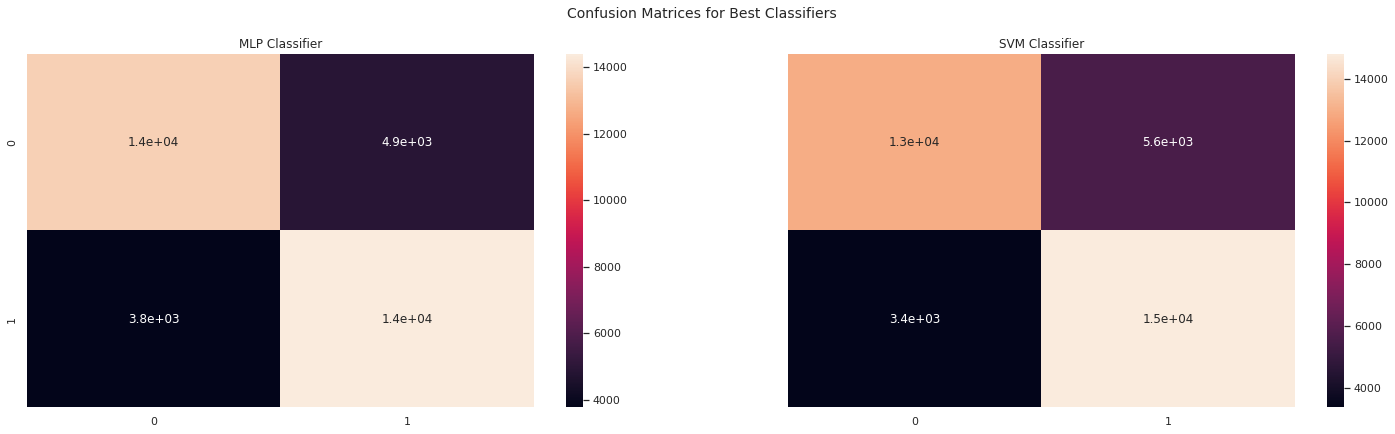

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (25, 6.5), sharey = True)
fig.suptitle('Confusion Matrices for Best Classifiers', fontsize = 14)

sns.set_theme(style = "whitegrid")

axes[0].set_title('MLP Classifier')
sns.heatmap(cf_matrix_mlp, ax = axes[0], annot = True)

axes[1].set_title('SVM Classifier')
sns.heatmap(cf_matrix_svm, ax = axes[1], annot = True)

plt.show()

<b> Συμπέρασμα:</b>

Για την τελική μας επιλογή, θα βασιστούμε στα scores που επιτυγχάνει καθένας από τους δύο βελτιστοποιημένους ταξινομητές κατά τη διαδικασία του 5-fold validation, η οποία βασίζεται αποκλειστικά και μόνο στο train dataset. Παρατηρούμε λοιπόν ότι τα accuracy που επιτυγχάνουν οι δύο ταξινομητές είναι αρκετά κοντά, με τον SVM να υπερτερεί ελαφρώς (κατά 0.002%), ενώ αντίθετα ο MLP ταξινομητής επιτυγχάνει ένα αρκετά καλό f1 score κατά 0.01% μεγαλύτερο του SVM. Οπότε, και αποφασίζουμε να επιλέξουμε για το συγκεκριμέο task το βελτιστοποιημένο MLP ταξινομητή, ο οποίος αντιστοιχεί συνδυαστικά στα καλύτερα scores για τις μετρικές που έχουμε επιλέξει (accuracy, f1 score). Στην απόφαση αυτή συμβάλλει αρκετά και ο σημαντικά μικρότερος χρόνος που απαιτείτα τόσο κατά την εκπαίδευση όσο και κατά την πρόβλεψη για τον ταξινομητή αυτό συγκριτκά με τον SVM. Η επιλογή αυτή όπως παρατηρούμε μας δικαιώνει καθώς αντιστοιχεί και στα καλύτερα scores για το test dataset με το test accuracy να είναι 0.7633 και το test f1 score 0.7682. 

Η επιλογή αυτή μπορεί να ήταν διαφορετική εάν άλλαζαν οι απαιτήσεις του task. Για παράδειγμα, σε ένα task που θα απαιτούσε όσο το δυνατόν λιγότερα false negatives, δηλαδή δείγματα που στην πραγματικότητα ανήκουν στην κλάση 1 να ταξινομηθούν στην κλάση 0, ή διαφορετικά θεωρήθηκαν terrorists ενώ στην πραγματικότητα ήταν counter-terrorists, θα επιλέγαμε τον ταξινομητή SVM, ενώ σε αντίθετη περίπτωση, δηλαδή σε ένα task που απαιτούσε ελαχιστοποίηση των false positives (όσο το δυνατόν λιγότεροι counter-terrorists να θεωρηθούν λανθασμένα terrorists) θα επιλέγαμε και πάλι τον MLP. Στα συμπεράσματα αυτά καταλήγουμε παρατηρώντας τα αντίστοιχα confusion matrices. Μάλιστα, ένας συνδυασμός των δύο αυτών ταξινομητών (π.χ. με κάποια τεχνική Soft/Hard Voting) ίσως να είχε ακόμα καλύτερα αποτελέσματα λόγω αυτής της αντίθεσης που παρουσιάζουν οι ταξινομητές και μόλις περιγράψαμε. 